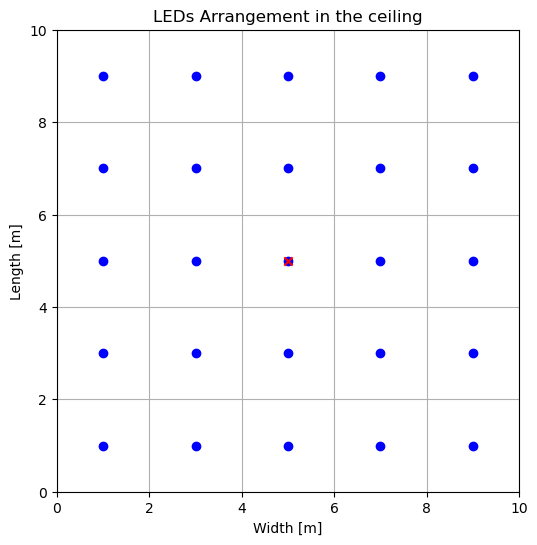

In [1]:
import numpy as np
from libow8 import sensor_net
import matplotlib.pyplot as plt
import owutils as ut
from design_handle import designs
from pyswarms.single.global_best import GlobalBestPSO


In this scenario a room of 10x10x3 m is considered.

ZigBee nodes equiped with solar panels gather data from 3 sensors (each) and transfer them to the central node (star topology).

1 window (2x2m)

25 LEDs on the ceiling (6W each) ~ 550 lumens avg

sensors: 
GAS SENSORS MQ-2 Voltage: (5V) Power Consumption: (0.8W)  I = (0.16 A) data = 3 bytes


DHT11: Voltage: (5V) Current: (0.2mA) data = 2 bytes

TSL2561 light sensor (broadband & IR): Voltage: (5V), Current: (0.5mA), data = 2 bytes

data = 7 bytes

6 Bytes PHY Header + 5 bytes MAC Header + 7 PAYLOAD + 2 MAC FOOTER (FCS) = 20 BYTES -> 40 SYMBOLS -> 2 TIMESLOTS



In [2]:
KEY = 'e_solar'
params_d = designs[KEY] 

In [3]:
h_ww = None
r_sens = None
n_particles = 20
def sensor_ar(x,params_d = None): 
    global h_ww
    global r_sens
    global n_particles
    r_sensor = np.tile(r_sens,(n_particles,1)) 
    nR =ut.spher_to_cart_ar(1, x[:,0], x[:,1]).T
    params_d['r_sensor'] = r_sensor
    params_d['nR_sensor'] = nR
    #params_d['nS_sensor'] = nR
    l = sensor_net( **params_d ) 
    l.calch(h_ww = h_ww)
    l.light_sim()
    h_ww = l.h_ww
    fitness = np.sum(np.sum(l.Pin_sm_diff,axis = 0),axis = 1) + np.sum(l.Pin_sm,axis = 0) + l.Pin_sa #LOS + Diffuse + Ambient
    return fitness 

In [4]:
def fit_function(x):
    f = sensor_ar(x,params_d=params_d)
    g = 1/f
    g = np.array(g)
    g = g.reshape(x.shape[0])
    print(g)
    return g

In [5]:
r_sen = designs[KEY]['r_sensor'] 
N = r_sen.shape[0]
pos_l = [0]*N #SN Position
pow_l = [0]*N #SN Optical Power
op_l = [0]*N #SN Orientation
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
lb = np.array([0, 0])
ub = np.array([np.pi/2,2*np.pi])
for i in range(0,N):
    r_sens = r_sen[i]
    optimizer = GlobalBestPSO(n_particles=n_particles, dimensions=2, options=options, bounds=(lb, ub))
    best_cost, best_pos = optimizer.optimize(fit_function, iters=20) 
    pos_l[i] = r_sens
    pow_l[i] = 1/best_cost
    op_l[i] = best_pos


2024-12-27 17:25:07,821 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}
pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=77.6

[  79.81581034  110.08093402  138.21305158  569.21140319   94.8438238
  177.71313303  620.83712712  665.60101814  698.65460248 1306.7910637
  659.6125103   176.34711765  896.44257636  120.80303181   77.55111919
  113.65544684 1313.28783598   99.93720845  137.20249112  119.86374976]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=77.6

[  84.70403756  105.15401793   99.28330207  101.63358495   83.57677648
  181.48598455  469.01305889  786.71808161 1925.87018128  201.31763167
  274.89741981  255.02056362  431.87336582  182.35326072   77.60329456
   77.89991226  471.08797911   80.30501409  101.33558906   82.40923072]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=77.6

[ 192.82545747   98.10108769  117.69399911   77.64331479   81.8479156
  196.78149685 1046.29812454 1005.93216386  310.20891032  172.04189694
  604.3556655   170.21172391  788.11698595   89.50735515   79.1266774
   82.38995081 1159.37675452  160.31666678  114.24564214  123.60719152]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=77.6

[  88.91919467   85.85361871   78.14053177   82.54922767   84.62505929
  135.23265376  180.10343408 1223.30399162  158.64300157  100.91849333
  228.33652921  115.76773264  147.59431781  117.89974944   79.48425274
  176.1332703   182.88979977   89.46690124  141.30842486   79.5430166 ]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=76.7

[ 80.4471552   80.06152219  85.30682219  86.15088405  87.75728416
  92.3731911   79.97751832 233.25366602  79.08237197  82.69752797
 136.40551304  85.4481111   77.7134271   76.70642479  77.10422388
  95.06845522 104.95305422  79.83893088 129.69341125  79.49569998]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=76.7

[106.64543009  79.16401991 118.55378774  80.90226356  82.56029175
  77.99413237 100.20965327  79.05370016 110.98414478 104.96169394
 144.10569446 184.38030498  95.1318961  107.48090144  76.89458408
  77.39042357  78.17469696  99.58948227 100.58545566 115.18270226]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=76.7

[ 79.97783711  81.57240962  81.78997282  77.07055504  78.77972069
  80.00716205 150.92548064 107.58125813 206.99289623 159.53222892
  81.05187847  81.39285039 110.34448257  79.62515056  77.41934666
 166.33504078  79.45578012  79.89756439  88.12094298  77.03122099]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=76.6

[108.07195106  85.60635298  81.85382066  77.19451297  76.64527969
  82.34631348 116.75566766 160.47963158 112.8387284  163.03141346
  78.47152664  85.48552931 118.25159662 111.26421821  77.69988477
  79.81580782 178.75986248  88.12235284  80.08699096 107.5483821 ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=76.6

[ 82.14476443  82.01428243 112.83193207  77.97620454  76.86207502
  78.21738579  82.35542874  96.66464179  82.37848496 116.63676608
 144.21372306 110.0552351   82.55981788  81.1187677   77.03860792
  82.06211762 104.92681305  77.43777638  77.30290729  81.86019521]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=76.6

[113.70474488  77.57229451  76.88303488  78.12316452  76.97586993
  77.62982025  80.09324037  77.35166441  76.60799902  84.15822863
  81.8388214   78.40230977  77.72933756  84.04852574  76.65518382
 113.51520541  85.30756058 123.86144064  76.669058    87.00262153]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=76.6

[ 79.26598981  77.32675543 188.96655542  76.80635921  76.57609875
  80.52044525  98.47471257  86.47391689  82.44326201  78.88783525
  94.70907772  83.18328506  92.81519001 163.66693579  76.75988728
  77.27145061  79.26140283  78.66068043  77.30058151  80.50172638]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=76.4

[ 84.16742129  79.42695658  83.57881915  76.42014517  76.49299657
  81.6116961  109.65067551 103.41412706  91.33972824  83.75392676
  79.61013458 126.15129135 115.78398964  77.35377348  76.73553632
 149.06664204 182.90191061 187.40109051  77.35087307  98.30369873]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=76.4

[122.25300747  81.66359278  79.10794079  76.57022626  76.61508267
  79.09248911  96.41597543  97.55593206  85.83880655  85.30018431
  97.06686078  90.12462197 116.93543417  95.28681297  76.42442148
  77.83544188  94.24958509  78.80192099  76.79495827  79.04047642]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=76.4

[ 80.19638543  79.89495689 119.37458818  76.81285342  76.64785273
  76.66366579  83.31514682  85.05126443  78.99182205  79.30496994
  81.32215434  78.00372185  94.08118475 185.33235674  76.41944782
 125.34942162  82.36327384  78.53204162  76.45760448  92.77215923]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=76.4

[ 79.81755278  77.62424576  78.68520878  76.48440991  76.47313469
  77.30919455  87.39552801  76.70468314  76.83496796  77.37864975
  87.03123735  77.42575051  77.01177415  76.97435814  76.50662173
  77.01498088  84.63938459 127.89890057  76.46978998  79.49771223]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=76.4

[153.11633254  76.75492622  79.71817515  76.4007002   76.4133058
  78.74573079  94.06556605  81.34512968  77.64145607  78.8369146
  82.57149745  81.15998633  81.24051063 116.09948025  76.63041798
 137.74553495 139.13054594 188.99554403  76.51823059 101.66057264]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=76.4

[ 80.75907621  77.25902129 158.84835564  76.45282182  76.40504868
  77.59588685  88.57540845  84.31899054  78.69864283  78.79892956
  96.93746764  82.28766578  83.05155899  78.51101975  76.58326396
  76.94414478  91.4267472  163.34237471  76.4812467   77.33103909]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=76.4

[ 85.50102305  77.69544293 102.83703643  76.49602199  76.42282242
  76.64065203  77.99818795  82.16869449  78.0727977   77.70318561
  80.65239416  80.43949101  79.74355662  91.11470957  76.48493206
  95.07078193  77.78246374 188.82743655  76.42053706 110.44271059]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=76.4

[103.99318465  77.27501393  77.51463385  76.50074749  76.42637979
  76.49072355  76.81669456  76.6836226   77.23872412  76.76926642
  95.25781709  77.55131037  76.82494296  81.86004513  76.41536017
  78.95893427  78.00094956 182.68628103  76.40399105  76.50943599]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=76.4
2024-12-27 17:25:40,765 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 76.40070020018457, best pos: [1.13242248 1.57006141]
2024-12-27 17:25:40,773 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 78.4584908   76.56243757  79.16441985  76.45172215  76.4138822
  77.08054075  80.20938753  77.34504393  77.57251114  76.89850327
  78.73727822  76.44426201  76.48548258  92.91774091  76.40819082
  97.92558674  82.33412701 140.43804435  76.41274816 124.03890631]


pyswarms.single.global_best:   5%|█▎                         |1/20, best_cost=17

[1613.66990618   37.83407227   23.90062634   35.0668942    30.61358467
   97.82269703   17.0176662  1321.64798265  636.47829735 1219.22574931
 1035.36950016 1316.67895659  111.55441989   69.79968631  393.26365363
   78.14181615   77.3099082    27.74098423  317.25167618 1403.93531323]


pyswarms.single.global_best:  10%|██▋                        |2/20, best_cost=17

[1103.11194      41.16900794   47.11002098   19.98898295   25.94568611
  376.50683325   18.85214522  159.71085115   44.11716822 1426.05489772
   80.27965428  114.52130255  470.87886363  192.73012081   58.46980774
   73.77124927   45.62905975   19.57239023  627.72553424  256.36971775]


pyswarms.single.global_best:  15%|████                       |3/20, best_cost=17

[1176.58585275   31.90592173   34.01751013   34.30696144   22.6896574
  776.46824889   22.91997581  592.09392078   20.38624945 1499.8014128
  632.7432431   313.81534396  700.68006799  527.44035912   54.96080452
   26.57079934   19.53243715   17.04048915  996.05737396  866.8326009 ]


pyswarms.single.global_best:  20%|█████▍                     |4/20, best_cost=17

[1218.98830181   26.04370599   21.14360599   17.42604718   19.97537171
 1009.08087913   23.11962779  129.6548017    17.21953286 1350.12199584
  770.21447327  425.17573469  818.49059431  433.14573931   26.25169098
   37.11034059   17.32861406   17.3972403  1179.21982781   63.9081593 ]


pyswarms.single.global_best:  25%|██████▊                    |5/20, best_cost=17

[1127.55121148   19.35263736   17.60894522   33.97683518   17.5950638
   27.18783537   18.64221455   26.1322323    21.62832659 1078.81022204
  612.54707983  154.97096931  717.41611332   37.67712855   19.98876201
   18.90747953   31.23798762   18.88410324   54.50935892   35.6865099 ]


pyswarms.single.global_best:  30%|████████                   |6/20, best_cost=17

[1093.37509328   17.40673311   17.1152188    19.94434103   17.04430598
   17.963866     16.97510416   51.78757628   53.01484821   38.57332783
  187.34456225   49.65112122  599.46555956   17.63988345   21.45262733
   20.92415991   22.93633647   18.47041032   17.32191565   20.13396215]


pyswarms.single.global_best:  35%|█████████▍                 |7/20, best_cost=17

[1033.18793728   16.95802718   17.75384226   30.59996557   17.4288438
   36.49782597   17.9389774    20.18085862   26.43184791   18.65843371
   87.80031992   22.89204583  220.76400709   18.60223167   25.09418542
   42.19446691   20.96012053   17.59040626   20.61087761   62.77553896]


pyswarms.single.global_best:  40%|██████████▊                |8/20, best_cost=17

[523.47383848  17.23408168  18.1021353   18.7771804   18.05196156
  46.3277344   18.81158105  17.3096194   20.54632436  17.22114617
  62.44398874  17.52940179  93.78877873  29.21616746  28.62213217
  19.15898758  24.07511713  17.08998524  27.99957123  20.25468404]


pyswarms.single.global_best:  45%|████████████▏              |9/20, best_cost=17

[80.04791215 17.27384216 17.28608461 60.57064834 17.88518975 23.86266196
 17.56268651 33.00908173 36.2576625  20.01082113 54.79700565 21.65676519
 69.85441777 47.90224968 19.20387274 17.33358077 17.88062837 17.22314031
 22.35376831 17.60663728]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=16.9

[41.34491949 17.05881718 16.94459027 19.42313876 17.1817808  17.51012863
 17.16608024 19.03387529 19.00284278 23.41573484 41.93124447 23.63149687
 72.26914179 57.89601205 17.50745917 28.02896971 44.55344113 17.68757758
 17.55530402 22.6357142 ]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=16.9

[29.3285642  16.93054577 17.03323436 17.34147208 17.34167176 17.11783629
 17.67726296 25.66557609 17.8818621  19.79864203 27.59807597 18.55733261
 57.54774536 19.10398011 19.20163575 18.84815434 18.03831198 17.88669743
 17.0723683  17.5873269 ]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=16.9

[24.14343236 16.97396447 17.13892852 24.78476154 17.61573927 19.07805116
 18.20911591 56.2472905  32.13248067 17.15671165 21.27428528 16.92073593
 29.62042105 17.06109434 21.30689654 54.02066155 19.48879485 17.44661756
 18.84799474 21.13183615]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=16.9

[18.76570743 17.02713865 17.07497888 17.66032654 17.6542719  21.93270348
 17.61892456 17.0897213  17.23250336 17.15302248 22.44374516 17.9530673
 18.92295317 19.7793527  19.27470614 17.12093506 47.51892865 16.94222955
 19.35871958 36.37981143]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=16.9

[17.1038102  17.03890323 16.97319546 21.11183127 17.03915081 19.13686835
 17.07578625 18.05509631 22.14281893 18.18015811 22.80639021 18.59453448
 18.69620317 20.42401163 17.11871036 21.55680273 63.78434141 17.01107311
 17.9617374  17.02999492]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=16.9

[17.0635894  16.9494037  16.94054325 54.88197648 16.9507195  17.07867768
 17.01328804 25.37787331 17.3662685  18.32909453 22.70597843 18.19016128
 24.70827143 18.06774217 17.16436065 17.28845467 47.78812774 17.07418443
 16.98521724 25.99586113]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=16.9

[17.81134965 16.91294975 17.01499555 55.94501335 17.14984574 17.19072304
 17.29795343 17.52960828 23.0280134  17.65553797 19.25536638 17.28979976
 58.27979141 17.01062733 17.34914651 22.75661379 21.31801369 17.11909079
 17.10639971 17.11879991]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=16.9

[18.07933533 16.97479199 17.02167295 26.50303472 17.22928124 18.18388353
 17.38060292 19.33997696 61.81230865 17.0477064  17.78919462 16.916725
 20.63525665 17.22917151 17.091674   17.20666508 18.078397   16.9667078
 17.60862859 22.7431507 ]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=16.9

[17.46344804 17.01014359 17.01465667 18.94225358 17.16758921 18.11604978
 17.09393332 33.02761156 18.14590041 16.92672645 17.57814749 17.1634186
 17.89544455 17.44121819 16.93924005 23.8038036  17.60007961 16.90537274
 17.35500721 17.21473953]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=16.9

[17.08173491 16.96152648 16.96537095 17.14705545 16.94959669 17.05237412
 16.91618624 17.08423847 30.46862932 17.14138221 17.66066214 17.49294886
 23.7057895  17.43945537 17.02176043 17.23337533 17.58928209 16.98515859
 16.90375449 23.03492188]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=16.9
2024-12-27 17:26:13,344 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 16.903754488042964, best pos: [1.24452909 1.9667618 ]
2024-12-27 17:26:13,350 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[16.92186168 16.90774214 16.92473264 17.22963093 16.91403138 16.97620932
 16.96559682 30.74676149 17.21129914 17.37427472 17.65935824 17.13243525
 17.20624424 17.10734874 17.07445603 32.81595094 19.28811123 17.01004858
 17.28437779 17.01556503]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=14.4

[  43.14343203  348.63121418  626.23499922  448.32188215   19.78096119
 1094.71974597   72.50691872  459.68170703   17.00459881   30.96139773
   64.30525815  116.0524077    50.31371801   34.99123015  576.79318069
   14.38080752   17.37115566   17.08814921  960.74009968   56.70130832]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=14.4

[  58.11549871  543.94408606 1173.08454056  599.23335822   16.9607044
  315.19073469  134.61046336  839.85004369   28.8769839    21.06194156
  671.15423939  395.79391769   17.70514106   17.29350368 1681.5459111
   23.27136127   52.81252724   14.45249118   86.69389929   38.38568999]


pyswarms.single.global_best:  15%|████                       |3/20, best_cost=14

[  24.84063902  653.88080043 1564.32962512 1057.30762394   37.63025825
  468.14549055   68.15301885 1215.0876997    53.37721905   17.05065379
  598.30538471  111.54032555   29.87653145   40.42745659  105.39354381
   14.41199024   60.78004787   13.99543526  530.58644095   24.31927011]


pyswarms.single.global_best:  20%|█████▍                     |4/20, best_cost=14

[  15.6872041   133.2766846    56.96436635 1130.10639507   15.50664383
  632.11367748   21.61830378   37.32014596   20.84663004   15.54488556
   45.03094816   23.91156807   14.70622087   15.16174011   80.55483732
   30.39858283   22.8207451    14.38558196  861.29503853   16.23598245]


pyswarms.single.global_best:  25%|██████▊                    |5/20, best_cost=14

[  14.06374853   28.58057681   16.49363794  194.45616032   60.74437097
 1287.03136917   15.09502036   15.17723039   14.62136719   54.55707166
   19.89533102   14.37078155   14.58882784   14.49080575   37.09805666
   14.23254461   51.3855944    14.84986741 1208.38753552   14.01194386]


pyswarms.single.global_best:  30%|████████                   |6/20, best_cost=14

[ 14.98317474  17.68603032  14.41508339  21.46561098  14.5965036
 829.26718951  48.32638233  14.3308813   52.6204164   19.23237405
  15.3801792   15.5124362   21.95913875  21.07782247  16.92084338
  24.28094084  14.35375328  14.60373619 937.509054    15.18844023]


pyswarms.single.global_best:  35%|█████████▍                 |7/20, best_cost=14

[16.15538962 14.57877074 17.11677788 14.51667847 29.64375707 21.41211928
 17.74210924 18.24979036 14.24818524 14.3552413  14.22564344 47.98823327
 14.67865436 14.5999989  14.02310411 14.01721542 15.37355667 14.07253436
 68.26132178 44.50728962]


pyswarms.single.global_best:  40%|██████████▊                |8/20, best_cost=14

[14.95713936 14.05777134 23.65343162 15.94075667 14.7551392  15.61188613
 15.32012298 20.58496818 17.96264956 20.13945528 14.32977266 16.6571025
 16.32873562 20.47115207 16.04082966 22.4773391  21.04802086 14.09714825
 24.95869257 16.65377433]


pyswarms.single.global_best:  45%|████████████▏              |9/20, best_cost=14

[14.03458414 14.49677138 26.64464536 16.75009594 26.88442737 17.43216207
 26.53712227 17.13430706 57.88794581 14.03863937 14.99536849 42.01622949
 53.01079491 14.14596415 56.24850552 14.08683213 31.20038199 14.2970002
 17.12163166 14.26577835]


pyswarms.single.global_best:  50%|█████████████             |10/20, best_cost=14

[14.46304611 15.12563835 17.48743116 15.22850413 14.31632149 24.77206795
 14.33358479 14.98283005 14.62929194 21.92433961 15.09587301 16.75331498
 14.1527719  34.28167959 18.01424807 18.89481994 43.43362318 14.34967094
 14.82729449 25.94736406]


pyswarms.single.global_best:  55%|██████████████▎           |11/20, best_cost=14

[14.88171387 14.29263417 14.64285586 14.2172201  15.93502692 35.24198274
 17.59580322 14.0480945  15.41848546 14.06808642 14.35874267 33.67991443
 14.55058374 14.90832106 63.0134144  51.96314454 19.69055418 14.29876365
 14.97494531 14.46927189]


pyswarms.single.global_best:  60%|███████████████▌          |12/20, best_cost=14

[14.27930123 14.0010158  14.19504713 14.02155597 46.5074146  20.80511113
 38.34488211 14.16016483 30.12959092 18.61234562 14.00316895 16.85871868
 21.70455637 49.63292187 14.94371432 14.04088011 15.40393012 14.23885048
 15.95368587 27.28233855]


pyswarms.single.global_best:  65%|████████████████▉         |13/20, best_cost=14

[14.00231279 14.30906246 14.95407883 14.31651781 14.2110347  15.34692881
 15.40812696 14.3168494  14.02473126 14.00396563 14.37951248 15.77609358
 14.30044836 14.34673002 17.8512449  15.84574771 14.19122475 14.18447219
 14.75727748 14.0870831 ]


pyswarms.single.global_best:  70%|██████████████████▏       |14/20, best_cost=14

[14.14496075 14.76065651 15.57052244 14.57472714 21.90129476 14.08293773
 15.64105036 14.2717281  18.51658929 31.57410416 14.60425604 31.71464597
 16.37544852 24.04348194 40.39806122 26.1524517  14.44247396 14.11044973
 14.1581388  20.39259547]


pyswarms.single.global_best:  75%|███████████████████▌      |15/20, best_cost=14

[14.2635254  14.55220615 14.85151821 14.41904772 14.11885235 14.48370421
 29.27707219 14.13783739 44.74857847 14.00350616 14.21536335 14.81645092
 14.47676579 14.15058306 14.29744598 14.23703302 17.42153268 14.01966855
 13.99705785 14.11170481]


pyswarms.single.global_best:  80%|████████████████████▊     |16/20, best_cost=14

[14.17693741 14.24538794 14.23192323 14.20714863 17.94979733 15.44455409
 33.41952982 14.01597858 14.50026588 19.87817532 14.00771957 17.08614567
 17.98771904 19.46987067 17.79194966 16.29620906 38.94748212 14.01633309
 14.12069138 20.24381711]


pyswarms.single.global_best:  85%|██████████████████████    |17/20, best_cost=14

[14.06319939 14.03439396 14.00200044 14.03854623 41.482024   14.58298689
 16.75194157 13.9975339  14.4741151  14.00483121 14.0390623  15.12795619
 14.08612168 14.27070789 42.70045945 37.20588411 14.0029555  14.07411293
 14.2578198  14.07586195]


pyswarms.single.global_best:  90%|███████████████████████▍  |18/20, best_cost=14

[14.00023918 14.02176836 14.06771601 14.03345722 13.99580297 14.01902978
 14.70608936 14.05105962 22.9371336  28.63385163 14.13237194 22.05610642
 21.4372985  21.16318068 15.15424758 14.17170534 17.53520962 14.09838009
 14.19071692 21.396413  ]


pyswarms.single.global_best:  95%|████████████████████████▋ |19/20, best_cost=14

[14.0187406  14.11495324 14.18242696 14.06971276 17.67295067 14.74144219
 14.5804273  14.12223918 14.11066111 14.10301483 14.15982606 14.11910802
 13.9957736  14.10689781 21.18588814 22.94624181 41.07962118 14.05482523
 14.03137518 14.20971308]


pyswarms.single.global_best: 100%|██████████████████████████|20/20, best_cost=14
2024-12-27 17:26:44,120 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 13.995435256194124, best pos: [1.312577   2.21555395]
2024-12-27 17:26:44,126 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[14.03231972 14.06155977 14.12750499 14.01641362 37.04092115 15.546123
 16.01139261 14.0931621  17.85388897 24.97523506 14.0374029  18.31898971
 22.09070171 31.54638555 35.29175545 14.1660175  14.04843401 13.998259
 14.00872944 17.60219108]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=17.3

[ 737.85242546   55.48155458 1284.45629392  128.81337483   25.84263376
   48.53988415  532.60607638   30.74795684  147.82367621  145.85051471
   46.89260567   50.45616068   24.8524638    29.0271759    17.28633614
  597.19927217  738.4019523    20.81963756  123.58330072  740.62420625]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=15.9

[1343.45088449   80.68768902  442.62863433  540.20145318   38.5496079
   20.21142892  474.1421513    78.0286777   105.69051942   37.99878656
   15.87714323   18.33126148   29.29630501   31.99861057   47.84469617
  137.65675414   64.32603286   22.2401258    28.79555758  425.14034266]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=15.7

[1746.0125146   475.40663473  739.91913378  980.15139431   38.47656893
   46.90067693   24.00338264  178.75924231  277.14255192   17.53527431
   51.54499913   16.13410343   28.40848979   15.70344093  583.46625919
  642.77487957   23.98519281   18.24970746   15.76481565  873.63885964]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=15.6

[1668.82256288  496.43474193   99.24240005   73.96660952   25.62700249
   20.05837856   15.60703858   63.8810239   233.54502356   17.62021076
   52.206713     58.69947507   25.78028798   32.21887462 1157.97517933
 1688.3385709    15.6978494    27.73564601   36.18937183   83.69402107]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=15.6

[  34.28787241   52.82908226   17.67050693   52.63957402   79.17948313
   26.80935976   17.22040257   34.39967512   39.75385231   19.44420402
   35.20461782   23.5755379    17.9807414    16.41287104 1174.37744324
 1592.92065561   17.56200781   72.06146989   21.18641352   28.6966516 ]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=15.6

[ 15.6909635   22.71155109  47.18897635  20.88477645  18.60993318
  16.28126757  19.9595842   21.97431056  18.26607433  15.93833114
  15.6288417   19.57058102  15.57723409  22.75633736  28.3585336
 345.46585372  77.60566252  23.00653081  17.00130009  19.22604912]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=15.5

[18.34094805 18.77253924 19.54396266 19.74363807 66.27720559 23.29342076
 16.34259914 15.63173733 15.55800579 15.84888731 33.05614252 25.55096737
 15.968829   15.64270794 15.54985805 89.99360295 20.13538087 20.61591817
 26.70483362 71.53494899]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=15.5

[ 23.59760532  20.65690408  32.14393803  26.15020367  16.09074281
  15.5204337   15.50757479  28.3581329   17.73948816  16.8080388
  81.80858296  16.62393137  17.66823792  21.16276534  20.61563714
  75.43386307  15.8939499   26.62914478  17.07491202 595.1290042 ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=15.5

[16.58611916 21.15651363 17.99372668 43.3993136  29.25218064 29.45090885
 15.86698602 16.83150457 20.19238041 17.57255092 74.98330382 15.76939993
 17.53297354 15.91282957 26.67631411 71.82065635 24.35547946 16.03982826
 45.33753357 49.41782959]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=15.5

[15.72733896 17.01006953 33.24549431 29.3575594  15.49160947 15.66430589
 16.27075406 21.2989048  20.13854909 16.5561205  62.55859277 33.46164055
 16.02112836 22.36756135 18.22149458 27.41101203 18.60126109 17.27228394
 17.35894017 18.20266392]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=15.5

[17.80834865 15.61289175 77.80905082 17.98448431 21.84744614 29.42947113
 16.04625589 15.79640917 16.65171004 15.836444   16.0973208  18.42407394
 15.49514679 15.51022448 15.50885918 19.92612488 57.19308743 48.05888959
 40.22921832 16.61500804]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=15.5

[19.2158625  15.66359006 54.7791643  16.52788782 15.50313525 60.64949616
 15.56754031 21.59799138 15.56104552 15.61061738 16.3657147  15.81092528
 15.87227076 28.98591359 16.79741171 21.82494742 16.56395915 15.68786229
 15.92007389 20.36317642]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=15.5

[17.66592081 16.20779787 30.26201263 17.45612435 28.9662373  15.8556419
 15.56650057 16.35276037 16.37486225 15.64670098 27.30709077 42.46218411
 16.52584607 15.69212147 19.00524388 58.55025025 39.36103818 16.44462463
 36.35874098 24.15291026]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=15.5

[16.04623282 16.68557946 18.56587025 17.97506337 15.74151465 16.03743431
 15.91777964 37.31067923 16.63551258 15.77667845 45.98635063 18.17830231
 16.14005599 19.79259293 16.59515566 21.6680807  16.44308202 27.16172124
 16.13703131 20.44849049]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=15.5

[15.61419446 16.76712252 17.0471813  17.01023074 36.1890039  25.88068044
 16.14361109 18.88071273 16.677741   15.65281893 15.99821536 15.51377655
 15.64881609 42.74946431 15.49500417 17.66639769 24.45315238 15.55933648
 22.97420678 17.1359133 ]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=15.5

[15.79659469 16.17283865 18.74561998 16.09010076 15.52801322 15.54622723
 15.63806988 16.21856238 16.36861462 15.49879377 20.53192912 34.79728331
 15.50217848 31.16261081 16.28563999 35.29232128 82.24218605 21.58229409
 39.47871922 15.76442401]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=15.5

[15.99088677 15.70106279 22.41888853 15.71970547 22.31545463 23.10751859
 15.50321686 27.29839104 15.65891107 15.54522573 55.71737026 15.70097751
 15.67420828 23.83110991 16.93281    18.91254195 16.20924827 46.46358866
 15.85661959 15.62937891]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=15.5

[15.90324719 15.64869751 28.71238944 15.84566389 15.56689014 15.52041705
 15.71822404 15.82220341 15.67339602 15.63954164 15.82607014 27.09519719
 15.76702051 18.88353714 16.89178808 15.50955587 17.27806095 15.5855316
 17.24906718 16.04411287]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=15.5

[15.60073117 15.92700427 66.22086009 15.85621233 22.41443579 31.13485488
 15.79672865 31.67294705 16.14757543 15.5537814  22.6606396  15.57406674
 15.77146002 17.03862846 15.82600888 45.56589518 30.42322235 22.59942887
 24.41999646 16.26286708]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=15.5
2024-12-27 17:27:15,286 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 15.49160946683544, best pos: [1.33386576 2.39847818]
2024-12-27 17:27:15,292 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[15.49174543 16.16002611 15.60967407 15.69999001 15.6725847  15.58032947
 15.77427552 15.56372131 16.33992135 15.50405045 49.49024967 19.59445273
 15.54575781 17.89834092 15.49242197 16.48956095 15.88491142 15.83332049
 62.82118312 15.76615333]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=24.4

[  31.84157631  181.96014813   24.38542834  578.42230119   31.33099673
 1707.81584137  114.88314787 1452.63317509  113.30811515   31.55625981
  139.56242451  650.51403017   39.62909733  914.24089236   36.20221355
 1292.5497495    92.62712783  209.0199076    50.38076826   94.43414348]


pyswarms.single.global_best:  10%|██▋                        |2/20, best_cost=19

[  18.98995477  214.04206559   26.16786212  134.07384673   56.83125484
 1356.33637372  530.1729142   154.27947979   35.92515879   25.15894385
   83.38344158  419.31587898   20.95254214  315.84427684  214.6926423
  229.88017193   44.38715332 1056.54086761  188.21914087  470.94738239]


pyswarms.single.global_best:  15%|████                       |3/20, best_cost=19

[  21.92755469   50.25636512   24.35366678   29.87518672   55.8289164
   43.31989128 1069.61590357  366.40414791   20.72441336   24.82900977
   34.80191629   22.04951517  111.35794321  516.86634447  113.34319493
  587.75498241  103.69762917   71.85397671 1279.43790374  753.7518822 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=18.9

[ 90.53720202  22.84752528  20.92100444  18.88323119  29.1931709
  22.82561828 113.498945   299.04085892 112.9947322   27.94373294
  23.02586466  20.38834981  21.53667028 557.26970569  80.55122368
 284.08779023  37.86283211  28.41101924 472.81231649  51.94890549]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=18.9

[ 22.85608259  19.22389975  19.21855566  78.52102739  20.35021275
  19.25309195  31.89069607  69.74129497  57.05104538  30.50581057
  53.35135198  40.85875327  29.39518158 109.92776087  35.76124053
  69.24827807  41.69617871  20.07509406 386.25262524  22.85644341]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=18.8

[36.95533685 22.92680022 18.84313851 55.68945616 18.88013408 21.02156821
 23.80143099 31.08864187 39.33061926 27.33008924 22.56663943 53.34363937
 19.50067386 48.78511301 39.84899434 30.66140495 19.47826039 22.25891651
 45.01939204 19.9317629 ]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=18.8

[ 19.44217013 110.85069835  19.18374249  36.93011527  19.50670864
  24.98072912  31.27560762  74.14899467  38.21768327  24.37078624
  19.05233717  41.63435967  26.46336532  25.6634306   19.0173234
  85.97350544  20.97902872  23.19451575  19.79914866  22.69491258]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=18.8

[30.73331196 34.12711794 19.41154509 19.38869954 19.89307424 22.01812066
 33.33192477 20.32520081 22.169681   20.78106185 55.72104728 22.9246826
 72.31818272 20.28469612 39.90010563 27.11944522 34.6838352  20.57410505
 59.14916472 29.41403274]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=18.8

[ 26.22140057  19.23740648  19.38975185  59.28445482  19.08263354
  19.98759019  28.58593992  63.78535394  18.88813601  19.60703812
  26.7374101   19.08175451  18.96680632 100.71844276  23.95898335
  22.80459117  50.25520537  19.25749049  27.96399881  29.65963445]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=18.8

[31.30507258 48.41218291 19.19802587 30.59810525 18.84533708 18.9383733
 20.39171513 19.06389109 44.89149522 19.24420085 19.11781107 19.45807058
 24.13885408 50.85954069 47.5222546  24.91319336 20.16452458 19.42984866
 20.92849396 24.33471733]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=18.8

[19.60567099 20.6046655  18.94439764 23.31349522 19.07554319 19.0325706
 18.94500973 24.11752097 21.02748478 19.39511314 38.68486754 19.99612224
 38.3794152  19.88254032 19.49160471 29.6639553  19.86667525 19.72401008
 47.54607734 19.52384187]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=18.8

[32.04418588 22.57766544 18.88496633 44.2621567  19.38165125 19.19039391
 19.68090101 46.01100374 44.70341654 19.47767572 18.97434925 19.57019804
 42.65638171 60.43318495 31.83850039 27.70224009 30.55842206 19.34698901
 19.41842794 18.84788345]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=18.8

[20.50314256 44.10072172 18.91202216 19.69570685 19.67404792 19.07984319
 21.23869153 95.19741646 19.0077615  19.37662781 32.42646359 18.83539696
 44.05993127 20.64288541 20.19334028 23.75485887 50.82130004 18.88356912
 42.70420198 19.56694111]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=18.8

[ 31.90674222  19.21029129  18.94741661  49.84085683  19.23161374
  18.93119416  21.77894065 105.94276333  30.70022947  18.92005428
  18.94670234  19.35035378  35.17209895 104.35291317  36.90545165
  20.81754427  60.63774586  18.92647117  20.97574099  19.78474168]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=18.8

[ 19.89114221  22.41730597  18.89012082  21.98638038  18.88453126
  18.84740833  19.56631233  26.85821901  57.74670172  18.86524327
  26.87991917  20.25773087  27.49546799  23.85262318  20.7099245
  21.25383984  72.04150946  19.16792067 113.01361504  19.16383225]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=18.8

[29.73886711 38.71383001 18.87901569 29.39392308 18.89464011 18.83612357
 18.85436474 22.0894439  19.02187361 19.07203953 18.93563237 20.0418607
 25.31231669 18.93548324 35.57077664 21.16236912 32.62153512 19.12729062
 24.38711049 18.83467262]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=18.8

[19.42153525 19.36291942 18.91375779 46.62776052 19.07431113 18.86408377
 19.62365118 22.16419692 21.96037921 19.27385317 29.49645471 19.42723814
 23.27445295 43.44516965 18.84661206 19.67025654 28.67708238 18.92556626
 18.84531735 19.04359616]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=18.8

[26.97446373 33.49192036 18.96251457 19.21673647 19.0216554  18.88139094
 20.36238919 23.37836078 38.69038073 19.21512345 97.44298838 18.83474933
 26.42685826 20.61390258 26.5986803  18.97995159 21.58391178 18.85157605
 35.15544265 19.17264921]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=18.8

[ 20.61697135  87.3699533   18.92718254  23.09877606  18.89707239
  18.87103661  19.73120451  25.02840495  63.18660455  18.96422729
  82.50001726  19.1943825   33.48088837 104.54415619  19.57138385
  18.8492085   19.26051176  19.02577312  19.24402866  18.93080185]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=18.8
2024-12-27 17:27:48,169 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 18.83467261643788, best pos: [1.35927338 2.52062493]
2024-12-27 17:27:48,174 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[26.41244415 18.87619322 18.87517498 61.29703688 18.84816891 18.84540233
 19.02699923 23.49408919 19.42916413 18.83626271 30.65411163 19.37187531
 26.74629238 19.00822269 32.15456943 19.07676124 19.5449989  19.16333207
 35.21295548 18.83487567]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=23.9

[ 192.72240369   61.94516322 1099.46776666  148.20121247  441.31123538
  334.38300214 1423.74927118  834.84557356   82.17871228   25.35706124
  215.24212876   78.51907015  416.66068469   59.06592757  319.80428516
   23.92412342  589.54738746   25.98437887   32.18142374  210.38234903]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=23.9

[ 222.76057107   87.37118276 1354.71421904  385.77376322  709.74925816
  512.11786676 1705.99308728  402.41841175   35.32345167   81.22476482
   91.87611731   61.26007412  887.70162337   43.09713161  584.872751
   93.8463976   954.71185743   88.33188437  114.23817896  713.40216401]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=23.9

[  46.38162199   30.6676818  1476.10656587  183.61143133  302.77925337
   74.94114185  184.57777381  739.6874679    24.05407814   32.11620785
   33.94180898  100.06690877  277.00153099   29.6361472   779.90353975
   36.84633431 1437.03568504   51.58638069   32.80172214  327.54304964]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=23.8

[  26.98620241   64.39179003 1529.9911748    45.35905992  135.56701503
   65.5997584   181.18491255 1198.29745086   24.72618576   72.22175721
   53.13047485   52.24681576  595.67039131   23.84312779 1006.34201726
   87.05487568 1414.37588839   42.63985548   26.39602072   46.64382057]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=23.6

[  23.61285536   24.45371019   78.75530917   27.88084755   41.93889966
   31.71846346   51.64698706 1495.6278377   136.2758191    25.63251511
   29.03309075   41.00620711  983.7425112    23.97767462   38.73991892
   34.38525918  904.46736111  153.36643872   46.44774087   27.19108242]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=23.5

[ 104.13416277   69.08391912   25.1805845    23.78102089   25.48869805
   27.40414442   29.35860216 1051.93445422   51.73482522   26.61980767
   24.40150065   24.65041127   47.17280477   25.24329474   24.48250617
   30.16102634  641.50069289  100.85049248   25.5297208    23.52170865]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=23.5

[ 35.49815468  25.95478992  24.95416077  24.62501766  24.91294311
  32.84377273  27.32841261  76.97902464  25.5926496   43.60000796
  24.94689847  57.57602844  24.14523005 138.2706315   26.7064827
 119.48910889 557.27109371  84.12076802  35.23890564  24.82628549]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=23.5

[ 23.92032664  39.94817336  40.7306813   25.24807589 121.04231871
  36.07289557  33.03032936  39.53509697  24.47625476  24.00521475
  97.59968748  23.81606752  97.90750463  36.32871766  31.13916619
  24.6224421  508.33378241  48.87702978  94.72061841  27.29613075]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=23.5

[ 43.9079657   23.77151274  40.57046716  24.21050457  35.36461319
 113.1160453   33.54061744  34.10062485  62.65757483  27.92745839
  33.09054125  37.0080012   59.45483982  25.83996414  28.31064771
  34.19524896 529.73102857  26.09868922  24.73326382  25.27952118]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=23.5

[ 25.142891    61.37753324  26.26139404  23.48974575  25.2939757
  47.32932964  26.20832088  34.12307818  31.94953544  55.70066259
  24.08515646  23.98133053  35.54664583  46.77876223  23.75732663
 103.85106996 476.10045802  25.55763986  43.19138532  23.52576115]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=23.5

[ 82.73972177  24.54093501  23.51491727  23.83247604  41.7645473
  25.4010925   23.84668122  36.66453137  24.47022541 129.84509878
  89.08209104  33.95247327  25.1103132   23.47191631  24.03851548
  23.61956489  73.69779618  30.59404471  23.54134197  24.19407709]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=23.5

[ 29.66002401  45.26385419  24.87947124  24.31520016  26.66551361
 128.63272949  23.59130293  26.9557885   49.65174611  55.37327594
  24.45232015  23.6281413   49.74632543  34.95085376  26.07175896
  31.80222716  28.31513202  35.19634149  30.24089638  25.02680209]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=23.5

[139.85395097  23.89630552  26.61074035  24.22279872  24.83426045
  27.9539763   24.53861153  23.59587081  24.18954686  47.11672692
  46.55164107  37.84711381  24.17688858  25.79087461  25.55264278
  98.68110391  23.92435481  35.54745106 138.58653548  25.4923807 ]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=23.5

[118.87144272  48.8500636   26.11063918  23.8217592   42.58833879
 103.3542198   25.94321298  24.19434229  53.0601481   32.97829488
  23.5802218   85.55288619  38.70875144  45.27609961  24.17061094
  24.54583442  86.04508451  44.93858462  25.62499765  24.28241336]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=23.5

[32.974004   23.90511605 23.59197824 23.48377944 25.5488156  23.95517148
 25.30218212 24.96834649 24.20198141 25.25702798 28.23395157 23.47567228
 80.18642987 25.53673941 23.56337445 45.32619415 35.86628283 97.45521914
 52.56576709 23.56081372]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=23.5

[24.12836895 43.32506252 24.262607   23.68282262 98.19445577 37.62061784
 24.46554854 24.80720786 46.32348201 24.58118218 23.71649391 27.51606503
 56.82929206 23.76922929 24.72927312 24.27208039 26.12998942 24.00552972
 23.5119932  23.61123886]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=23.5

[ 23.55147119  23.94937824  27.42077345  23.82341827  23.57594998
 120.30926654  23.59454833  23.55945109  23.99690881  25.23365684
  39.10142868  83.55642061  43.26950627  48.60166229  25.79545567
  53.43867261  40.09271802  27.16796349  28.54974324  23.88850217]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=23.5

[23.51789401 36.45656396 28.82354915 23.62938314 29.45270374 23.80972067
 23.56795349 23.74716748 35.52491697 26.76465327 23.51799556 23.59761689
 35.87365665 24.06283085 25.32603557 24.47900827 23.8980444  51.08817153
 70.97387129 23.82905729]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=23.5

[ 25.96115736  23.59062806  25.27505095  23.4936431   68.48753273
  33.32281315  23.95949096  24.03434556 130.95146858  28.68743302
  39.75983856  25.96387815  34.20107126  41.6782316   24.250164
  59.00522876  34.56661511  64.01049768  23.86994631  23.51081336]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=23.5
2024-12-27 17:28:22,664 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 23.471916314744597, best pos: [1.36793471 2.59072954]
2024-12-27 17:28:22,670 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 38.94370259  35.99335668  23.50486605  23.47683325  23.90418413
 125.87691679  24.02957582  23.85337146  26.96560237  29.45270424
  23.8817275   55.49890146  42.67912913  23.55004274  23.58579972
  23.5848356   26.82983713  32.77807172  24.90427171  23.55348569]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=30.7

[  33.3546864   539.7720328   716.81492113  711.7250946  1475.12377961
  258.1549646  1169.5927231   330.2369536    31.51479075   99.71712863
  694.01064522  503.16353073  635.18532834  949.9876254    36.29072816
   38.15441328  751.5545778    30.69858027  137.21563195  843.67969829]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=29.8

[  31.17399862  262.54322674  207.13284687 1295.99302577  518.36549906
  941.16918764 1536.95337966  187.60679532  116.19674253   35.8256012
 1251.3493512    49.64022898   76.66285771 1555.2775937   130.41967825
   29.77983263 1896.0657433    49.93053639   38.67189083 1171.99913909]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=29.8

[  30.41641152  165.85080749   37.65847132  460.90025168  819.48016751
  248.57425797  394.57402804   44.70440409   51.94575241  191.02736852
  403.39572171  113.92096862   30.16870024  477.35341865   34.44812491
   46.19065289   44.17739316   64.38233717   29.82183359 1364.7323456 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=29.8

[ 196.56566208   36.89405315   31.60187756  675.0318206  1164.43390263
  103.12525264  552.13529041   30.13422731   40.9356399    33.96087511
  688.12475075   32.03852021  184.30001844  169.73442005   30.37463869
   61.24482875 1106.99675526   45.06557737   53.14531648   47.35218675]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=29.5

[  38.5654158    31.06945131   86.32764441 1070.39884205  280.69356647
  173.88799119  724.02342622   31.00709024   55.89377224  106.70916725
  477.5462746    97.55986755  911.56012419   55.01556467   57.88788031
  200.2363052  1641.66248166   32.58170189   30.06648753   29.49090562]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=29.3

[  29.31965171   66.26466378   84.72306576  145.14571105   42.78590583
   47.93064039   91.16687925   36.29424318   31.0463301    31.51215722
  275.32436316   29.43113052  307.53517344  101.66823872   33.42032994
   50.82997829 1539.26596924   29.48775555   47.66328232   32.68519332]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=29.3

[ 79.82932137  49.26775506 148.79888582  83.92822892  30.3459899
  35.78639284  32.05869706  34.65211869 136.9941993   83.59425275
  61.18012301  40.5362849   64.22239638  34.07636768  59.75400725
  30.02703577  39.70249524  30.13205137  30.21281475  33.82282819]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=29.3

[ 33.17514362  70.05264515  32.13764493  39.55649282  34.91084701
  65.11046326  87.95795537  29.72835811  62.04800601  30.01451378
 135.56329841  29.83106156  56.09004067  29.45495022 145.48346813
  52.33736367  35.52496088  30.83466411  44.62648808  30.78718048]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=29.3

[ 29.64177683  40.05224981  36.58376235  33.42618882  38.50193902
  30.09206781  41.69196263  30.41137924  76.65261413  60.76800403
  40.1398623   48.90477883  29.50598041  52.91411193  64.13585605
  35.6216491  293.07326743  30.62601102  31.33246578  29.27657908]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=29.3

[ 53.68014695  80.12655904 179.53894901  43.60953233  32.60629961
  67.90445442  83.61510156  33.18256026 202.98399092  30.10778005
  31.49898742  29.47125703  56.79738696  30.19864965  33.05883563
  47.56246558 612.07943885  30.0047618   50.85605486  29.68083068]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=29.3

[ 31.58757121  30.19052238  30.51654796 160.39965622  29.27869006
  30.99767641 147.30188777  32.50136494  29.46370479  85.35453917
 190.7922371   49.97259583 170.42742908  49.32090374  29.39244179
  29.89414281  74.29096398  29.55209329  31.89866302  30.14742703]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=29.2

[ 29.44422377  69.03987952  31.38362831  89.43622045  31.01692558
 115.25029932  30.26299262  30.51126983  39.04763445  31.36799968
  38.4009298   29.23744396 158.85586743 108.39652118  29.43849807
 104.68042638  32.94774749  29.2348332   60.42051911  29.97383394]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=29.2

[ 73.25839514  30.55757882  55.10769046  53.50106216  32.66212101
  35.61700127  35.86952816  29.45413252  75.73506881 108.56793993
  58.02449407  47.77405328 100.64814854  29.7531771   31.82620771
  34.78264015  31.40195446  29.47523812  30.16992042  29.4745815 ]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=29.2

[ 40.32611527  39.72512594  67.23473251  58.72556071  32.34311975
 186.96342109  53.81079979  29.2654984  112.7863273   29.69297633
  29.90349427  29.56757283  76.5131329   31.85946456  45.84768866
  79.68064988  44.90680844  29.55524693  68.59595174  29.21886842]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=29.2

[ 29.6527358  144.5139377   44.14850885  29.33167997  29.75418846
  29.69586599  58.15513984  29.71616784  60.61672594  47.42042974
  51.78512314  36.85572286  45.31077761  45.54584926 100.04064093
  31.47570748  59.04834277  29.43760069  29.28769906  29.38475431]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=29.2

[114.8171244   30.10097484  44.27511338  55.45405289  29.44846384
  34.79364684  39.15663399  29.75519268  56.99352863  29.28771438
  30.11388623 181.54921482  35.95703799  67.45173293  56.70056538
  57.17258716  49.65627147  29.22863974  40.04222293  29.48937926]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=29.2

[ 29.81464718  47.79586842  37.81880239  35.25678425  30.58819776
  50.01585983  40.98255334  29.48420658  43.78725005  50.55559699
  39.76133999  29.23786474  34.40355199  59.25891474  35.4872994
  29.6188178   31.92916379  29.25838581 144.07094488  29.37678757]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=29.2

[ 49.75483139  30.80460014  35.40079629  72.55242482  30.53908053
 162.71727048  34.14788047  29.27876502  32.92209186  29.39515093
 201.10395525  31.67655266  37.56823891  41.99821839  31.53916336
  59.73691979  29.39132677  29.35267652  29.9840129   29.20994479]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=29.2

[111.56647936  60.11229129  31.56263114  29.60166817  29.45893134
  29.51155638  33.05236584  29.30526767  32.61159372  54.81326921
 199.46354302  50.75003115  55.35053529  36.02050383  31.05645429
  31.33068478  31.51749931  29.39479887  43.164981    29.22333215]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=29.2
2024-12-27 17:28:54,351 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 29.209944790100757, best pos: [1.37584947 2.65862965]
2024-12-27 17:28:54,357 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 68.24532257  29.3652682   30.86865102  43.72717647  29.37931724
  30.54442801  39.23628026  29.29813522  40.02609339  30.07613426
 119.55037521  29.66101851  64.16768334  32.9924115   32.63088501
  96.63833522  33.29198053  29.34917217 115.8104831   29.23188629]


pyswarms.single.global_best:   5%|█▎                         |1/20, best_cost=29

[  33.94952341  173.0811429    49.68848937  838.95858034   79.23187043
  791.20943691   58.3805848    32.88360866   83.49381506  209.8871735
   33.65009483  291.5172402    32.53737804   62.09915705   61.12997663
  912.2635069    28.95971751  419.15395281   88.41921774 1258.00314401]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=27.9

[  27.90473789  177.30110645   53.09468925  189.43760643   30.90435303
  113.40846251  136.1047235    32.33409849  282.40798123  784.81963777
   28.83123274  244.82593711   59.47928426   49.87503843   31.60916057
 1289.81263723   28.72135823   71.09234718   62.58938279   78.98001445]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=27.9

[  28.08273887   50.89467404   51.20513711  672.24174613   60.50650061
  675.46925107  452.2984806    29.26082526  196.37300986  135.93002608
   50.06637039   59.13595453   28.27627583   36.39251701   38.40714636
 1406.09836703   28.56233518   45.36847898   66.45947295   42.30992916]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=27.8

[  29.81966651   33.44352055   36.84908731  703.82411322   33.41499929
 1148.13314468   85.85417197   27.75730082  141.14357792  238.44076564
   27.76865135   31.66845635   29.90427603   29.39183614   58.25238535
  128.53266981   28.17097826   32.742494     62.50030489   30.91609932]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=27.5

[ 30.58129689  27.95370971  30.69196     53.33590675  29.76453817
 143.11906662  32.36191667  28.57123774 128.20955895  54.32579154
  44.31221902  27.54604628  48.54418543  28.60689463  30.73272851
  43.49688707  27.92059076  37.4586628   39.77848493  47.8367715 ]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=27.5

[ 27.60850373  27.82311422  29.10746098  31.96245319  38.88253845
 133.57852402  27.646128    29.87737762 114.52979339  29.32587837
  28.79722619  30.35435281  33.54719098  31.06790976  30.00815224
  29.50285084  27.82622746  32.10002451  31.33814091  29.86934075]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=27.5

[ 28.15883957  29.89480823  30.01211768  28.41795088  27.51398318
 126.0867386   32.66705399  29.32096749 261.18290232  33.63170829
  37.03088304  33.23124625  27.83451849  60.88782317  39.00721983
  27.57664136  27.67068527  36.65331869  61.46463593  55.91904096]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=27.5

[  28.76350304   31.75239764   32.31167508   30.39187661   57.82234323
 1474.04410154   46.65911902   27.65740788  232.1061775    46.95052908
   28.12055099   29.64767381   28.05046339   29.13814712   27.95509732
   29.2697434    27.56166629   39.69370445   36.86980415   33.37556735]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=27.5

[ 27.8094132   30.96544584  35.24581207  32.54500207  27.76316481
 400.18464749  54.37256851  27.62336852 123.82497837  34.96621405
  30.95509176  27.60182534  29.0194259   30.49095912  31.08684421
  31.60945633  27.55593307  43.90024707  33.133671    58.23038001]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=27.5

[  27.49771878   27.79277811   32.46958692   34.60989826   41.80259576
 1251.29601536   32.21375552   28.31079473   84.77927961   28.66335985
   41.59395309   28.03381261   28.86814942   35.83668471   57.04667796
   29.60417096   27.5559025    35.60513026   34.87781298   32.31838249]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=27.5

[ 27.65149865  27.6751903   28.83413302  28.34455472  28.81833136
  73.58972229  27.62311067  28.52947863 126.27110327  27.50749202
  28.65117385  28.61532818  27.63103707  27.92288108  33.84966981
  27.69378021  27.56717809  41.50700794  31.52390276  33.01581264]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=27.5

[ 27.91306858  28.69183555  27.89941561  27.56404098  30.40116785
  45.96206273  32.71236919  28.08673581 230.86425322  28.04494476
  28.17973914  28.30778487  27.60485702  53.63618534  27.87132804
  27.94774534  27.56026556  27.82916548  29.55228322  62.94988096]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=27.5

[ 28.03794485  29.27259231  28.29210335  28.93145727  29.77380721
  28.39147407  41.09641656  27.53908522 404.05232561  28.6100657
  30.48923531  27.79746768  28.15272793  28.34294     29.34776433
  28.76849765  27.54286407  53.75894705  28.41956482  28.31089925]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=27.5

[27.6480995  28.93918874 28.51904837 31.03928984 35.99013992 33.49735973
 31.26507027 27.60280813 95.7984093  28.48052608 30.28708548 27.53669622
 28.57381509 61.5521555  48.03210101 28.37620867 27.5182389  27.66073478
 43.56891809 31.95280798]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=27.5

[27.50749854 28.11683394 27.91457776 28.98888346 27.50454853 38.19351583
 27.53051807 27.8723831  56.66236173 28.09536279 28.15324811 27.7447921
 28.17308495 27.90026437 34.08115468 27.51376843 27.49905441 41.97888024
 29.11344388 28.70480988]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=27.5

[27.66565122 27.55902121 27.55883414 27.64988978 63.08731224 35.37890841
 30.95324959 28.0714584  40.23597614 27.73143912 27.89864329 27.77718788
 27.75609897 49.79873067 27.76534355 27.71862011 27.48881665 27.91140948
 29.55466936 36.89902352]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=27.5

[27.76615329 27.54042467 27.58900699 27.64420271 27.78282798 29.71834452
 33.07172839 27.94993959 31.16965415 27.59001746 28.5595704  27.65716625
 27.54227476 28.1584553  28.47959264 28.03991865 27.48578827 49.64538192
 37.66756466 28.12893888]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=27.5

[27.6762286  27.7307343  27.61170974 28.02358613 46.05988287 27.5661369
 30.23190171 27.7684046  27.8023246  27.72467028 28.6022617  27.53196292
 27.48572647 29.76921562 56.07677639 27.98541813 27.48756904 27.80230563
 27.55640331 36.98437746]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=27.5

[27.50392576 27.75422867 27.51957541 28.15230266 27.90543245 30.08133373
 27.77599669 27.53308471 27.85594018 27.76664952 27.95262208 27.49489651
 27.55296493 38.38517407 29.73854449 27.71919564 27.48864419 47.85109827
 42.84008264 28.93716169]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=27.5
2024-12-27 17:29:26,621 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 27.48406497446936, best pos: [1.07168034 1.65917845]
2024-12-27 17:29:26,627 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[27.50691912 27.63691919 27.48406497 27.74369835 32.96998855 30.89571978
 27.56980323 27.5915135  29.40111364 27.60181002 27.61104789 27.5593182
 27.58475245 28.29238776 27.98623094 27.49075641 27.48852018 28.44486383
 28.05711828 29.93649232]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=7.22

[ 14.83104262  28.93495538   9.01131222  16.96226945 444.82877843
 292.22129044 526.64348376  19.8833776   17.12158568   7.21681307
  16.89454891 588.33612863   7.86814026   7.65466312 953.1196779
  10.68274045  18.65517742  13.16156789 542.57735793   8.10923837]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=7.13

[ 29.83509874 130.33640387  13.85437069  14.05726959  23.21389653
 589.71985338  27.03068992  13.9242409   14.41854311   7.40036386
  23.27140602  22.16079252   9.46195325   7.12599158 118.43984033
  16.57601074   9.16231969  12.23883806 950.84432322  12.95864813]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=7.13

[  32.84790451   93.41188158    8.15483931   77.195847     13.40495408
 1258.08534434  487.04678495    9.68831945   11.30003716    8.12987116
   79.24132347  247.83028776    7.37402925   18.50283967  414.01375091
    7.13832111    7.55259694   12.60225524   20.5877271     7.58330186]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=7.13

[  19.86479588   24.66389627    7.47574464   59.57841962   20.23059043
   82.97459635 1083.2962842     7.89735512    8.51988708    7.53031034
   18.35390439  369.31804349   16.22357799    8.63316524   41.52663454
    9.68055211    7.56156087   11.36487568    9.56758628    7.28733076]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=7.13

[ 12.72317768  11.73529109  11.92023988  16.39450647   7.33583077
   7.89608681 177.1538175    7.32469738   7.35148492   7.15350847
  10.9071587   34.85082688   7.57358724   7.28286197  13.25617812
   7.53854285   7.79149075   9.42350059   9.12851505  11.70037078]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=7.13

[ 8.28368136  7.54661149  7.17087966  9.30115511 11.21764207  7.9751641
 20.45531008  7.51171323  7.2103163   7.17623526  7.46668396 17.35843452
  7.55784735 10.50285827  8.76908996  9.00286586  7.78490043  8.13228424
 52.78917764  7.15067937]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=7.13

[ 7.61104931  7.29151185 14.95236595  8.94587816  7.55950743 10.50577516
 15.76181952  7.8043642   7.7131712   7.3136562   7.34315511 13.2537753
  8.97017466  7.20494544 12.28337957  7.26407824  7.49151276  7.49434063
 74.13576756  9.99777284]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=7.13

[11.59496961  8.95849288  7.21932733  9.66078195  8.34822872  7.9277262
 10.54948752  7.61747293 19.50501511  7.42529676 14.90051473 10.76843514
  7.48409099 16.73125132 17.90582455  9.51735775  7.30086907  7.37651581
 28.5466248   7.31094762]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=7.13

[ 7.45743835  9.42658385 10.35636176  9.21955976  7.56385235  7.29193415
  7.70562761  7.27983469  8.11041794  7.18281869  8.30354866  8.46452897
  9.6937454   7.19448127  9.25402067  7.50383798  7.18440994  7.43546132
 10.41137912  8.57064057]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=7.12

[19.01944993  8.02452757  7.15075625  8.38593282  8.49820411 10.03632426
  7.12514734  7.30691652  7.77956229  7.13785273  7.70565506  7.22931083
  7.36011828 11.08798209  7.16014561  9.20184916  7.11815926  7.37540279
  7.3872516   7.37720405]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=7.11

[ 7.6338136   7.28802288 10.07995124  7.74357997  7.45355134 12.72511785
  7.75763933  7.34283194  9.40837539  7.2425876  10.51129864  7.20025836
 16.89456582 20.28572368  7.54172632  7.23698937  7.11319448  7.28065147
  7.27548766  9.39679703]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=7.11

[12.02029377  7.11230918  7.14037877  7.33709967  8.32651793  8.49121126
 18.81886395  7.27101387  7.24336549  7.33805196  7.17623828  7.79570503
  7.61348493  7.21297961  8.77009067 10.97488462  7.13847103  7.23512847
  8.19982664  7.23413682]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=7.11

[ 7.18647152  7.23699282 10.67489629  7.11764021 13.41628817  7.11483614
  8.15901385  7.15928897 20.74708174  7.21535201  9.5900681   8.10399693
 20.67187208  7.47482725 10.20868047  7.22865083  7.14100302  7.20068997
  8.60466568  9.60712498]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=7.11

[11.44811538  7.4483199   7.23694401  7.15482096  9.20187     7.75393859
 14.6140555   7.11566463  7.43782457  7.12080134  7.21873122  7.76831551
  7.275657   10.70224883  9.34053068  7.629199    7.12401791  7.15240096
  8.64616019  7.50450159]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=7.11

[ 7.12808074  7.50151407 17.61720073  7.25452182  7.17412364  8.83378438
  7.25954871  7.14181348 14.29333961  7.12722514 12.42373703  7.33205692
 13.83276917  7.28861938  7.43794244 11.93665894  7.10796881  7.12418989
  7.70784524  8.66247105]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=7.11

[13.88471829  7.24191244  7.22885262  7.17024422  7.42655748 10.13059395
  7.74668507  7.16989388  7.22848208  7.15869559  7.19793963  7.20857851
  7.38253237  8.05626035  7.1272812   7.64881915  7.11427261  7.12864216
  7.13895182  7.14953696]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=7.11

[ 7.14071844  7.11713833 11.67989739  7.10879964 13.25253714  7.43223488
 13.48820473  7.15112504 15.78154029  7.17242925  9.05243582  7.20134684
  7.64311337 13.47809307  7.48354553  7.31031347  7.12202507  7.13905237
  7.20076975 13.4577273 ]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=7.11

[10.73075109  7.26181082  7.22777347  7.15230725  7.55455749  7.18405756
  7.58974966  7.11431855  7.2097212   7.12192405  7.32970446  7.2353353
 14.78005594  7.65429961  7.91029704 13.01695547  7.11779075  7.12219207
  7.3255078   7.79337295]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=7.11

[ 7.15505     7.38584     8.68296519  7.15780738  7.4452424   7.83500838
  7.92131345  7.10848081 10.88247307  7.11022956  9.47230835  7.12343795
  8.86080133  7.30672964  7.63118019  7.48911724  7.10866299  7.11239125
  7.21696128  7.27696777]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=7.11
2024-12-27 17:30:03,055 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.107968806545499, best pos: [1.17364252 2.13433981]
2024-12-27 17:30:03,063 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[10.31200294  7.22649549  7.21169448  7.13244582 11.23383718  8.25688825
 14.71923573  7.11905597  7.59399898  7.13270144  7.347644    7.11777191
  7.31777139 12.7905528   7.17449761  7.32914505  7.10921003  7.10809741
  7.11782399 11.46480725]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=8.45

[ 11.43000602 304.40019012   8.45335874 116.89559193 393.36438622
 270.94992868 608.22968927  13.42479842 282.80342144 164.11101032
  85.84113514  25.74393716 565.16658215  28.98750138  19.65296037
  13.25307875  15.16583601 445.15468566  19.42709024 461.44538041]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=8.05

[ 18.46145693 344.99190344   8.0545877   55.65464032  23.01201449
 391.86889283  79.26789849  27.31141698 565.43185098 453.55723682
  72.54952272  19.99855634  41.10195639  10.98261607   8.35989973
  26.92259114   8.87026673  31.03456028  10.5767879   18.70253473]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=7.72

[ 11.80299183 406.34658968   8.14308155  14.89443722   8.10635734
 435.43608331 404.90581286  49.39497957 714.48422221  15.11761058
   9.72250351  15.66778613 427.92329349   7.9241895    8.43067203
  27.01288547   7.7200216  196.45168      7.9902683    7.99656003]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=7.72

[ 18.59619545 468.82594444   8.24495184   9.07696148  26.97253719
 510.04396909 437.52254719  45.73670897 752.90651174  22.73212622
   8.14746473  12.28621915 744.40733616  13.97098202  21.47848529
  27.70059903  18.97467655 258.54918632   8.54770281  28.68133815]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=7.72

[  9.12195395  47.89524884   8.05083778   7.71516685  11.49739452
 436.16067029 580.27948036  15.10495092  16.0193118    7.81682444
  21.35404026  22.84535304 127.60074426  10.99068095   9.36185201
  17.51492009   8.52080476  31.23180737   9.41511733  11.91627701]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=7.72

[10.97806841 13.28290231  7.87967808  8.30758084 16.63803586 63.85979832
 17.99034037  8.11992366  8.07397007 14.45148427 12.24130914  8.98891435
 11.1265327  26.62228983  7.76668254 10.62455893 21.73295673 26.46939126
  8.4017071  13.13240858]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=7.71

[ 8.06904883  8.92874601  7.73110661  9.01653275  9.07138568 11.99443409
  8.73508409  8.17688631  8.33838557  9.21711078 18.00913232  7.71498163
  8.38621786  8.57998332 16.07815223  8.14183349  8.15601015 20.41016069
  7.77413914 23.82081247]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=7.7

[ 8.94512434  7.82624391  7.70440416  8.49362477 27.62990458  8.26614308
  7.93261824 23.87843308 10.60543955  9.2850935   7.70660492 16.61214058
  9.99347721 13.3941759   9.52510641  7.71914188  9.56349651 15.28320995
  8.20207579 18.54657606]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=7.7

[20.18577605  8.31191302  7.7626473   7.71558596  8.39354991  7.9823817
  9.5335692  11.36650652 13.09023623 17.05454106 10.13432622  8.3907197
 11.59678887 15.97072231 19.11500226  7.90609106 13.22069604 11.55731414
  8.69288084 18.30821461]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=7.7

[ 7.81228731  9.51669427  7.80300572  7.9322084  21.01848807  9.64264915
 10.11246009  7.81522086  9.35500828  8.00581241 24.04223865 14.13938709
 10.31072133 22.36533226  7.93017064  8.178456   13.19074353  9.5176837
  8.23679508 18.03542685]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=7.7

[13.02034962  9.346081    7.81699049  8.2223162   9.69679663 10.89980124
  9.74890083 25.341407    7.69775546  8.63137952  8.52064545  7.87345138
  8.37564494  8.60716516  8.5203028   7.91200094 13.74019554  8.82787966
  7.91700829 12.49015634]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=7.7

[ 7.79905569  7.87307279  7.73512819  7.99025061 17.85629861  9.25080608
  9.27051526  8.9325386   8.32053063 21.77444537  8.46785038  9.27444927
  7.72833904  8.0250672  22.98813396  7.73546558 10.58402195  9.11729151
  7.74292557  9.52911102]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=7.69

[15.95634282  7.80878418  7.69453588  7.7915048   7.97205265  8.1284652
  8.0325365   7.94736698  9.56135098  8.15645255 18.57414965 25.62924952
  7.78615276 13.85646989  8.19708869  7.71015751  8.88737001  8.80450457
  7.76273553  8.24803038]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=7.69

[ 7.78454997  8.49177064  7.70764293  7.8005201  19.06159363  7.74986777
  7.7534266  11.05412522  8.11485427 11.73483392  8.17895786  8.1476854
  7.96039809 20.36214278 11.7249708   7.82096356  8.0740236   8.34963398
  7.80944245  9.09088309]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=7.69

[14.0815508   8.88930448  7.73974188  7.79890891  8.20313806  7.74487254
  7.86067944  8.22010642  7.72511751  7.8627056  10.58757892 14.32068044
  7.79205581 17.93371063  7.76201216  7.88623987  8.00161468  7.98876886
  7.76375059 11.29102973]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=7.69

[ 7.76991451  8.3664893   7.72523355  7.75230052 17.07697451  7.91569944
  8.06002995 27.6866424   8.45413573 10.60773454  7.99621641  7.69872741
  7.69890401 12.3179014  10.3873339   7.82451079  8.43733699  7.79423736
  7.71316824 17.2298225 ]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=7.69

[15.75875374  7.88189119  7.69816672  7.71937876  7.92023761  7.93987111
  7.89368935  8.46510421  9.0672144   7.8823915  10.15057721 10.98461678
  7.70363691  9.70542124 27.12609135  7.70559103 10.90350648  7.72835302
  7.69361108 24.88311906]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=7.69

[ 8.147678    7.6995267   7.69575878  7.69338519 10.94319776  7.82461249
  7.72864496 17.67571985  8.37584515 21.07975777  7.80670201  7.77120672
  7.74002993 10.13463375 19.93907211  7.69660702 26.06138969  7.76050939
  7.70052166 14.0414268 ]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=7.69

[ 7.97923035  7.73165873  7.70959327  7.71229666  7.74946106  7.71136003
  7.69862983  7.7204713   7.78364954  7.92291555 18.33119321 14.21137463
  7.71176557  8.98553306 14.97911065  7.73851678  7.93883601  7.80574115
  7.70439904 11.98969768]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=7.69
2024-12-27 17:30:36,519 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.693385191368633, best pos: [1.22272109 2.43454637]
2024-12-27 17:30:36,524 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[14.44167835  7.77969144  7.71350301  7.74745922 10.62558851  7.70379015
  7.7307257   9.26201468  7.73396096 16.74990251  7.94930424  7.88111843
  7.6962827   8.20414875 10.12526544  7.77752334  7.83182069  7.78540224
  7.69918768 10.10045661]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=10.7

[499.92942723 602.64948001  10.66018526  12.02090975 601.61738908
  17.52809685  11.87773395  21.19661471 140.51568942  14.78236934
  27.40457727  16.32011991  14.66186695  33.90116976  44.62331905
 541.28606143  16.40929069 401.2639347   43.19442654 529.29640773]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=10.5

[849.32059401 256.22252215  31.03985581  33.16209297 706.08622931
  10.45634565  19.14677994  11.12066907 448.60597959  10.74756968
  22.84625546  12.69157476  13.50204389  52.36754099  22.75046431
 839.04099057  14.25185599 563.80120123  13.15026437  49.61996724]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=10.3

[1061.40801558  117.33138068   26.74176458   34.95321446  902.51702163
   19.15429018   10.61619088   17.48338216  707.3727066    10.95815009
   16.67284285   11.46226131   13.59085153   33.07996905   21.43193269
   48.00551906   10.34489486  692.67871375   11.40488129   14.79442134]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=10.3

[ 964.28839186   42.02759943   42.9815706    26.91262167 1069.86799254
   10.4400527    28.94074668   11.87245063  842.68271681   11.94433475
   13.59610637   12.35162435   13.37037249   40.93442557   11.37935355
   18.70845323   17.95719931  567.33072427   35.5994137    10.70125403]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=10.3

[780.49439512  14.4789619   15.79229602  12.67102274 314.99928357
  15.98403247  10.60848439  18.36542227 846.18179309  11.8993279
  12.55228678  12.34462941  13.46716367  13.68773428  24.60688589
  10.6111192   11.71668356  19.87552209  16.0084542   35.66919678]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=10.3

[18.05285797 10.7217111  19.67694561 21.65816453 13.48159638 10.37693553
 15.72863548 10.79610359 32.04532346 10.71948233 34.11828151 11.94135553
 12.23422912 10.34209277 11.56653251 42.23541307 15.46162208 11.49756783
 11.79116208 26.42277732]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=10.3

[11.14819788 34.72179671 26.5382692  10.76005789 10.57628022 14.63106594
 28.72810634 13.30488336 12.078298   10.36377519 14.60890122 10.79698088
 11.2055821  18.91960949 33.51224259 15.03004574 47.6261298  10.45920909
 18.18930014 40.63268435]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=10.3

[11.08448889 15.36586421 19.69905171 22.84879023 14.13481801 47.22569359
 10.56396057 39.08759117 10.60848899 10.52918505 10.76633478 10.42990588
 10.68873937 11.72428995 11.64974175 21.31950824 10.83961814 10.97414015
 10.36595131 13.45941311]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=10.3

[13.25846664 18.75647878 12.23256414 11.28764594 22.33122687 10.63264038
 11.82031068 10.91505962 13.13847755 10.67537132 32.06457136 10.42017335
 10.60457635 23.43135885 12.13598413 10.31276566 10.81946907 11.40185865
 16.66050356 11.00130111]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=10.3

[15.68817339 11.07262175 10.79690613 12.45248584 33.99030052 15.85545114
 27.23373272 19.41579119 13.25686896 10.55921286 10.97919792 10.61294039
 10.61880964 10.63871717 21.01968438 15.34155715 15.8216883  10.89580136
 10.83704644 19.52466842]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=10.3

[11.87766716 11.50846635 11.50349764 10.77313942 22.59705951 32.02057389
 10.34622143 10.60193217 11.1394672  10.43426025 21.183309   10.55837642
 10.62482665 12.46817445 11.33989772 13.93967474 33.02142326 10.37172215
 15.59439522 11.67717176]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=10.3

[10.44157409 26.08817605 13.56385566 14.63304929 10.44860279 36.3168643
 11.7485711  15.42168248 10.32723021 10.31528679 29.1514256  10.38946154
 10.45144335 24.92467686 12.43374461 17.37900113 10.39738791 10.33010452
 10.55301241 13.1729624 ]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=10.3

[10.89444887 10.53517873 20.36231162 10.51142984 12.24483821 21.20843948
 24.18478582 10.95138263 10.52372796 10.35808481 14.88425017 10.31998821
 10.33936184 28.51360535 24.51123146 10.95392483 12.02516317 10.52815147
 33.16272328 10.65240335]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=10.3

[11.91949059 18.97401587 11.73216685 40.61851109 19.81630949 13.9945775
 27.96349122 12.93430003 10.95860962 10.43236325 11.14516004 10.34533397
 10.30925804 13.05896448 11.18509941 33.12495273 32.7845081  10.61458824
 11.42794782 21.86876678]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=10.3

[12.33821711 10.52912963 12.05412112 11.77713024 17.9594668  11.82742908
 20.47504063 31.12718188 10.74364692 10.38258705 10.76217024 10.40244449
 10.33333601 10.83132281 15.09201375 11.04091792 34.12618776 10.55611991
 10.66967102 12.96423656]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=10.3

[10.91706369 11.40400728 27.97819354 10.56292522 10.52408688 10.77539117
 13.57709305 10.39129672 10.45703521 10.32040924 11.54098169 10.45351305
 10.34557924 10.44116846 10.38967095 17.53051301 42.98284158 10.42051052
 16.11229601 11.47020026]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=10.3

[10.34050185 17.00641667 10.31310263 19.31401413 11.56653974 10.5174232
 12.84091828 12.63420869 10.3108719  10.32918963 15.62019067 10.34761688
 10.33878412 10.5619565  16.00793375 44.19696118 25.0399064  10.32890979
 10.33539453 16.21939016]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=10.3

[10.53361508 16.39394566 13.52195036 10.34113321 16.32425997 10.73349023
 13.27867985 10.551286   10.34353386 10.35423602 24.11434135 10.31111087
 10.31371599 11.34688887 10.60970911 10.41815555 21.48010652 10.30949051
 15.63409874 10.38280917]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=10.3

[10.85154875 15.86205768 31.22969745 17.56785341 21.45195385 12.60571103
 19.04592258 15.47580079 10.35061791 10.35124083 10.57714684 10.36449878
 10.30936341 12.92201786 11.82364177 11.25872527 11.97629574 10.33164655
 10.5958254  13.44465264]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=10.3
2024-12-27 17:31:11,701 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10.309258038028739, best pos: [1.3179352  2.60860673]
2024-12-27 17:31:11,709 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[10.75507647 12.22603641 32.95521485 10.34129502 21.38797058 17.20503797
 23.11191057 10.37027134 10.3167773  10.3194416  10.93583353 10.3758612
 10.31860451 13.41719293 25.67027625 14.79513755 10.78324063 10.34685192
 13.31657147 10.65239521]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=14.5

[ 50.30878142 666.54027922 363.85498841  49.67010782 157.78162599
  14.5464644  176.74749652 107.18824564 482.8172506  181.1144346
  39.09202463  25.38852193  98.16517144  54.66764024  14.82296964
 719.47758191 354.68765461 985.70868488  77.83151405 389.36531493]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=14.5

[ 68.2422171  298.2671884   49.52147265  22.56328008 372.46280373
  35.48111713  18.00301613  36.33045063 572.74761238  31.60661137
  19.98715731  46.15305228 335.05683035 403.39152556  21.49091113
 152.2607899  668.22294453 343.89823261 460.85789989 389.03774622]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=14.4

[  19.11924697   68.25402826   24.38242994   31.23227032  488.17557127
   20.35385115   56.85409409   15.08532906  691.2831682    14.36001409
   38.8368452    79.19105722  426.70866709  560.27512645   14.75876305
   16.41680984 1132.41037948  518.32354619 1034.87806117   16.26163489]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=14.4

[ 14.4528524   14.77905093  25.06688258  32.64467839 470.55906961
  30.90503927 171.66599479  23.50928871 689.78699109  32.33222121
  17.35618225  20.53325888 551.31580555  37.07755513  17.15244535
  14.73284909  84.13913217  78.99252643  56.63391269  48.68827652]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=14.4

[ 20.69046026  29.28793661  14.41075034  15.96860737 381.63799734
  15.41121489  46.22935547  17.5696029   83.43912356  19.26807567
  24.32039628  44.84672915 703.74486612  17.87177608  14.44506548
  21.44484467  35.56844758  44.57254486  26.57913375  40.12601161]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=14.3

[ 15.3764548   35.37222044  22.73964236  14.38990921  46.06688049
  19.86188985  14.36155627  37.88172971  33.3829545   30.1157097
  14.3262312   18.2742347  259.11576937  14.4596895   21.50471378
  27.88875392  15.17835531  21.93821536  16.93226074  67.17547929]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=14.3

[18.49893319 33.62965114 14.28390003 18.23479114 19.16800768 15.45299506
 22.26974006 14.69922901 23.41359385 14.76446285 25.98217599 17.92732636
 27.29115135 14.34350113 14.53384246 21.19407238 17.03669748 21.34757213
 17.16051392 22.83402528]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=14.2

[31.91323541 62.31731788 24.22178939 21.60663563 15.71908673 20.32188175
 49.09196856 18.16445591 16.67604956 17.88179987 14.2405019  41.83777585
 16.74654934 15.18579161 45.88057473 14.50965053 57.61819896 27.89013036
 18.92734293 17.25231074]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=14.2

[52.70899438 25.12599675 14.73502709 19.97482984 19.09115901 14.60898812
 17.18153232 26.85450108 14.44222618 38.22410068 21.12107703 16.7510159
 15.5953462  16.40757352 14.98178729 14.71947701 31.0778345  26.97862003
 17.2244369  37.69992701]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=14.2

[24.89858045 17.33466124 27.69997092 15.08725813 23.78117572 28.9916019
 15.98786416 47.47938386 14.39783848 45.87433745 14.46811275 23.49022378
 17.95885811 16.30381907 32.10277193 15.73774207 19.2286956  18.97427841
 14.45274763 29.5624516 ]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=14.2

[16.69883839 20.45631285 14.52832249 14.23447294 22.30538612 14.63772679
 24.41382222 16.08909283 15.37245542 40.25300845 20.84914305 14.5661091
 21.65423758 15.16096333 14.29085246 15.22380637 24.32944115 14.87390213
 14.34253785 42.49571648]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=14.2

[14.8992899  24.85560915 16.42979786 15.85091641 16.59083794 24.13841273
 28.66611473 15.54300327 16.29630328 23.11998957 14.29409145 22.46239433
 20.30957841 14.22667216 19.6255202  14.3725409  18.04545783 14.31527141
 15.29241109 37.27919131]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=14.2

[14.50822864 22.43385955 37.22055378 18.10574    14.84139468 55.91834305
 34.70850248 30.55727552 15.50941482 20.87217562 20.0204337  69.94489373
 15.88762648 14.275661   14.40535643 14.16110173 55.09845828 15.47516771
 15.34900163 76.62529976]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=14.2

[14.61884338 21.22325265 14.47046681 16.43237165 15.20954185 16.47569258
 31.93371597 14.37510866 14.64558615 21.60769334 14.40869436 14.20765389
 14.48560844 14.40648277 19.21125198 14.31510031 18.01007273 16.84767421
 14.92096593 30.91233096]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=14.2

[16.68951182 21.68919916 15.16777908 14.43261983 15.4006221  15.88614987
 22.7183473  16.26755977 14.26956167 18.1210674  18.69039547 16.11439814
 14.95247695 14.34875569 14.22785567 14.52559656 26.14188737 15.68441382
 14.37416667 18.19616975]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=14.2

[22.34420689 19.65106152 25.83273976 14.21744474 14.57383625 25.49709667
 15.3290497  43.94140015 14.24923101 18.20726036 14.21404312 25.35967197
 15.29430416 14.16489078 25.44372774 14.51183388 14.35465028 14.36091541
 14.18641616 14.51439558]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=14.2

[24.60742147 18.59903835 14.58901874 14.85750311 14.24767938 44.38460918
 14.45881397 14.28869744 14.38929199 21.36243122 33.6208513  14.2509034
 14.51143805 14.23375193 14.22877221 14.34680266 22.1816983  14.30211793
 14.31402779 14.23183044]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=14.2

[37.31480113 19.45508284 16.14045224 14.8298348  14.27063691 14.35891911
 14.76766512 16.285444   14.49482177 20.43086053 14.74257484 17.77631498
 14.21867958 14.33611068 23.87307443 14.1675497  57.02695075 14.97388307
 14.35301766 15.70512656]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=14.2

[23.98887757 24.34497243 65.00505382 14.53686732 14.37554811 15.13170696
 16.2372979  32.56195513 14.40454501 22.18787867 36.31617268 48.33977466
 14.53259992 14.36162953 14.18004416 14.21805566 14.6137521  15.70962306
 14.23485609 22.65324471]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=14.2
2024-12-27 17:31:44,956 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 14.16110173490079, best pos: [1.34136327 2.70286636]
2024-12-27 17:31:44,963 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[16.51063449 19.49095373 14.26703192 14.25106455 14.39124714 23.27422921
 21.83371859 49.18222992 14.21954304 18.17037371 14.21717765 14.19718306
 14.7448457  14.19053134 23.45694753 14.2682612  18.75995486 15.15829035
 14.17557287 14.76991186]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=24.1

[200.16174221 613.1243104  765.18318743  28.82614096  24.1196754
 116.61742297 488.60313602 210.64730411 412.75967437  27.67458855
  27.44761441 817.92549524 483.68528711  62.36552413 374.43341835
 101.78693516 876.0876246   32.88026935  50.43494539  56.62896305]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=19.9

[ 82.29877423 189.93158402 916.25642706  20.14691425  38.87534077
  28.77509786 749.17115029 510.71130472 691.24403523  40.85383496
  19.85600266 370.57038687  20.39695889  29.42707136 606.04767558
 430.5776693  357.32553813  28.60827419  30.35960666 156.93421312]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=19.9

[ 42.51045955 386.20328679 986.67872266  35.53055946 113.50055293
  19.94578048 932.59209467 828.52141222 118.24383471  28.82546509
  22.55713354 623.92159976  67.09999722  21.94529003 771.75881555
 147.60231351 538.54981205  47.46825178  23.32254808 392.26749826]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=19.3

[ 60.81262022 346.35308613 120.46230053 107.97114298  49.06289751
  26.4205718   96.64038718 809.86308242  31.03177436  38.31862787
  25.60112522 973.54599679  64.00542326  19.3352533  894.58406067
  50.91288104 361.9427944   23.54519701  22.01614092  76.56778503]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=19.3

[ 150.82335213   55.65119286   21.28958687   59.94038267   21.27389637
   56.8473391    47.14757317  582.12506966   21.33423767   19.34396339
   22.84947259 1063.60574104   97.22960427   19.55672164  655.12982852
   24.21808182   30.34878924   98.40838894   23.93611068   31.82932112]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=19.2

[ 74.3401189   22.97892288  20.50830091  24.37137483  20.18263417
  36.81283965  26.32316075  44.49644501  31.67056277  26.63769141
  20.01173703 234.22033147  78.7245591   20.19602407 414.12132534
  19.93937024  19.20152431  20.71313711  22.88904856  20.937601  ]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=19.2

[ 36.01542584  19.46702791  33.0707531   20.29267472  68.44979929
  20.33628599  20.08966966  61.98504554 110.14610809  20.20549075
  19.44256675  28.76999059  36.20655916  20.64923464 169.34681528
  21.59858231  21.61834852  56.9318504   21.49977422  20.51002914]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=19.2

[23.36134088 69.61808661 41.58019952 23.41510553 34.83094735 19.71421406
 19.17138794 65.87086454 32.87022778 32.4873017  20.40818947 20.08179845
 26.16639164 19.42833769 62.82405067 25.21808663 29.41139356 20.29328966
 20.42022268 24.28283062]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=19.1

[19.54419507 21.57821283 41.78400026 50.9298678  21.99990093 24.93143615
 64.68738113 27.60312983 74.8696308  19.091165   21.00718129 19.87611202
 36.3043668  19.38267021 36.21986813 24.11319623 27.41897421 65.05502924
 19.58592744 24.13570171]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=19.1

[20.5668282  27.37689208 30.44249652 24.02671777 30.0711599  27.01337268
 22.72244476 20.85594634 20.39598659 28.52583616 20.14220792 22.93273237
 45.38111075 20.79531211 24.24734222 20.32110534 21.94692347 19.22963303
 19.16150684 20.39770179]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=19.1

[23.09052519 40.6552738  20.54657189 19.30423006 99.98925111 24.61984258
 50.40598486 53.63700996 57.43738693 19.52435736 19.43779627 27.05999293
 33.87114408 20.65523497 19.34442419 19.17753339 19.40926896 24.29978113
 19.31659114 19.18525139]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=19.1

[ 21.30819676  63.08183258  19.08457721  52.41536304  19.0952074
  20.93972121  85.53922162  21.07229904  20.34054648  26.97723077
  19.37449452  23.71743372  30.82111726  20.3652653   19.62184281
  19.66937546  19.34185932 111.46490733  19.45309663  19.2069904 ]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=19.1

[19.39926089 55.59475902 20.12989192 20.72780032 21.17972935 19.24126117
 33.3372798  62.11309373 33.66428418 19.13221804 19.73926002 19.46167119
 28.32444967 19.33869359 21.41729233 20.30028628 20.73966411 76.83289383
 19.3498575  19.79084452]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=19.1

[19.13473704 43.69259026 21.79922139 40.60144722 51.1380406  19.26392578
 24.77912668 21.06774656 20.59633519 35.59642657 19.91085274 19.3093998
 23.84510531 19.2765467  20.53157748 19.43119694 21.9540485  67.64872896
 19.10045401 19.81933746]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=19.1

[19.7302941  32.89838632 20.72472972 19.12796619 19.40542649 19.7514873
 20.03361344 53.97236647 27.46538957 19.42375882 19.94712866 20.79987625
 21.42245003 19.72003899 19.08080489 19.08556491 21.63490251 40.17013784
 19.10476462 19.59954934]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=19.1

[20.01534774 20.92882766 19.54090926 23.19180505 20.43204583 19.44630449
 19.32469032 20.99759489 19.4023564  34.44824376 19.57885236 22.14136257
 21.28872944 19.82053467 19.60217133 19.24142199 20.21473259 36.55315547
 19.19821935 19.08333359]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=19.1

[19.88269256 19.56519522 19.07784301 46.39341535 30.10145903 19.08288725
 19.52002625 24.50062412 30.39998317 19.40564537 19.27435916 20.38816995
 20.71433735 19.2936938  20.56167419 19.43997305 19.30433109 24.74616341
 19.26607056 19.22719318]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=19.1

[19.46464946 19.75238438 19.36326555 54.26262045 35.39772363 19.37219345
 20.61037026 48.97128366 19.10139051 25.92894875 19.1063112  19.26915051
 23.19642913 19.06693246 20.21281117 19.43453854 19.09579774 20.07848056
 19.24112297 19.32244434]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=19.1

[19.13654138 22.37708906 19.4799084  30.85689994 42.65204739 19.53791937
 25.35778969 68.87862314 27.02487653 19.17929889 19.1211059  19.125426
 24.12500184 19.23821644 19.65350642 19.23121609 19.39536242 19.33212954
 19.07281361 19.23314173]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=19.1
2024-12-27 17:32:17,049 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 19.06693246204514, best pos: [1.35319058 2.7667909 ]
2024-12-27 17:32:17,056 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[19.07145057 25.4945653  19.25154495 20.39819231 19.19401118 19.48543218
 27.87169394 37.68872142 19.09212207 29.41452443 19.21683416 19.51574252
 24.85173831 19.4462228  19.14731303 19.06837599 19.65125376 19.82017808
 19.12434794 19.0912372 ]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=26.4

[ 558.94943556  133.22078031 1684.52249372  846.91623319  178.60556892
  573.35047183   35.80571279   49.25730242  582.50098172   72.47087938
   26.42870225   59.36946567  455.71681493   49.06128605  177.19884327
  574.26272341   43.14590449  226.79196953   35.26593188  411.06970164]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=25.3

[ 872.4627909    44.5725085   116.73230506  452.559337     60.34699951
  193.00532583   25.29374608   98.62447112  941.48517044   85.74674899
   25.45878703   38.75657131  859.92499972   39.25521321  118.45815882
 1195.93962983   27.02180827  783.00903945  118.8618087   957.93842197]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=25.3

[ 113.18174844   26.44369809   26.87657897 1024.49993297   29.58161497
   70.81380846   31.69478203  130.99598414   34.18817563  129.64427534
  118.45167634   29.72166004  219.1372189    33.98992664  134.62881916
  263.87976097   34.44175888   45.87894841   38.20086843  287.49518106]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=25.3

[  30.53347654   62.59965589  138.69861195 1405.37483848   27.49174916
   33.33995536   53.84259707   36.52394402   70.89950012   49.17482343
   25.59006986   26.18167241  144.93802935  110.61626388   27.49374807
  132.23232489   90.00249881   54.37267018  115.99668903   55.21065163]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=25.3

[ 25.68500011  27.46161046 184.1918372  168.90981806  39.34912452
  35.46846317  35.42340989  96.45088339  67.63646304  28.32396756
  35.38957983 170.52564792  39.76571348  34.90866456  72.51116338
  31.42470534  34.79918746  29.42319451 159.92036661  25.98004731]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=25.3

[ 55.37355464  89.62852236 119.88100688  71.4213274   76.80048195
  40.94388724  25.98996916  25.57093992 150.1508138   54.93739749
 173.3587705   30.11215568  27.38270936  25.67542568  36.81638203
 138.44551796  62.11672397  28.94377193  26.04226729  50.09456427]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=25.1

[36.18519688 25.05200452 30.5570988  43.52847935 33.15050436 31.74426506
 26.14909005 49.75639227 40.31617854 27.00734664 25.72876373 61.43012251
 56.60950938 44.73502161 35.36139999 40.54709033 25.1748997  60.83624942
 25.38002912 33.61121057]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=24.9

[ 56.871922    31.04602483  34.04062316  45.88617364  24.96024191
  25.91873126  32.0029058   26.03522094  40.06564058 138.6080439
  38.16604643  25.37987652  27.91476388  24.94741239  25.4019729
  34.68051004  38.59442535  31.09186579  32.59316988  29.28658311]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=24.9

[ 26.09553948  51.67300608  33.03552148  66.2368914   67.04962299
  25.41600169  31.84214138  43.36919356 124.27130709  27.49678617
 129.79985865  42.59578117 172.29997983  35.8968125   35.01474256
  45.20495283 119.25212439  27.90311595  52.59908854  55.46221029]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=24.9

[ 49.40844693  94.02982866  65.42650082  56.24874897  27.21017252
 154.77715906  25.91485951  24.97770503 296.38954536  47.65979143
  56.01143551 166.89981284  28.09802107  25.21098916 170.14759073
  27.75979337  27.7089503   49.56894772  24.94268513  25.02430306]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=24.9

[ 26.51376123  93.35433651  43.35825703  35.3648141   36.88130139
  32.80924374  25.01238029  40.87109842 273.42287635  25.56514285
  30.13409438  25.88970899  84.61559247  35.47799318  26.42112368
  40.52739825  27.25629427  25.34486869  31.78559542  31.89113264]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=24.9

[ 48.06562821  77.29599456  30.92470245  29.59327097 156.45684013
 117.66250469  26.1405351   25.77821472  58.71072758  33.56104064
  25.97625577  30.68120027  27.08002407  24.98743515  27.9211509
  56.09122855  44.86512238  38.11489272  25.23758931 123.34824133]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=24.9

[ 24.96471232  56.64141944  87.65954534  27.89474905  25.47312244
  28.11659356  26.40519903  93.38575162  26.74335656  24.98007717
  25.21769639  81.78622035  43.58573261  39.46249102  50.32711122
  53.16570533  25.51703711 134.0165296   36.9601379   26.56114406]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=24.9

[37.45556423 40.92146602 32.60246797 29.47063417 27.45209228 25.70141207
 25.8715718  26.99046614 59.18471366 44.7397784  26.246598   25.095236
 26.08603701 24.95566799 46.30598391 61.21714961 36.70541677 25.21213829
 24.93111951 29.36233856]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=24.9

[ 25.30358737  30.09547672  29.11175821  34.25649259  42.79215695
  41.55251937  25.08961212  97.95673721  31.45204683  26.19082382
  31.6795735   27.48289852  32.31629392  38.71908863  70.09243373
  38.19230867 110.18777705  25.71743377  40.03984214  45.77119654]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=24.9

[ 46.40234012  26.1166663   65.29697265  29.64900877  25.84575542
  25.36924786  25.00289639  25.52082042  27.64219077  71.21671575
  51.40276113  42.5452224  156.97596265  25.01374975 103.37773387
  26.65419559  24.95351172  35.39877475  25.15201961  85.65816145]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=24.9

[ 25.65408024  26.17971535  27.6218713   26.54673182  29.96266279
  63.67508194  25.36147912  35.59799402  54.35544213  25.88897739
 109.67540622  25.6034859   25.3776145   36.60118275  25.21112624
  25.61772182  30.25717988 120.75045656  54.26578391  44.8677601 ]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=24.9

[61.25333777 28.59843535 89.90009061 25.53280208 68.34098984 25.02819634
 25.70812962 69.34579313 28.82539634 57.8132668  25.3974297  29.27146262
 25.55403349 25.01448495 26.23797166 27.23353534 44.42191349 25.34326176
 25.22708768 26.76990902]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=24.9

[25.36272818 34.48897843 30.67006233 25.43285588 25.40894929 30.53109248
 25.49303579 85.72620044 25.57229319 25.07650323 25.58195651 87.86720366
 33.19354527 36.54369329 34.74453287 36.41107874 93.45675093 25.7102106
 42.21122494 25.18835495]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=24.9
2024-12-27 17:32:49,421 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 24.931119506193788, best pos: [1.39836749 2.81626676]
2024-12-27 17:32:49,427 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 30.97914386  39.60034814 134.91563307  25.92735715  35.82015357
 116.40110796  25.15519949  65.22539279  81.51110411  29.28925955
  36.65907852  24.97723076  63.38092537  25.05252048  95.11588516
  67.70769449 120.7635244   35.37701253  25.22181686  25.25778499]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=6.13

[  8.03441539   9.88999799 544.1648762   23.36117754 160.37777994
   6.94480696   6.90655928   6.12539916 502.0529686    7.46451074
   7.03622709   6.56537505   8.41878863  12.74902015   6.48992102
   9.8733019   10.96898179 583.00844934   6.57367631  14.95016347]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=5.39

[  7.2858132  213.49841427  12.18891259   8.10352317  28.34061213
   5.39397208   7.29481887   5.6451048  709.32970681  10.90979334
   7.55280701   7.93065824  27.12938786 386.53894592   6.69515483
 131.38137518   7.15081294 807.54368124   6.28982312 180.21660242]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=5.39

[   6.00022868    8.69956379   29.42340339    8.20507637   11.19261142
    6.72912488    5.38588028    5.75295016 1020.10350222   29.25302015
    6.66468264    5.74359738   16.67421714    8.10178543    6.16486926
  195.86943297    6.17228308    9.47113035    6.06000928  576.58465639]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=5.39

[  5.40125608  39.52462883   9.90134937   7.88566026   6.26806919
   7.9200258    6.49055207   5.93627433 368.46493733   8.19112505
   7.45855765   7.33006231   8.2181763   21.61474653   5.8139775
  31.21183723   6.39574172  11.89477834   5.77555194  65.37588732]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=5.39

[ 5.50989205 20.12349059  6.23884372  6.60488509  5.57758382  6.25163086
  7.74567518  5.79968832  8.24047859  5.41626578  6.04068364  7.65264487
  6.528376   57.95526627  5.54127604  8.8132147   6.22453695  9.82726034
  5.50624818 10.56204025]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=5.38

[ 5.96297145  9.2131541   7.7432154   5.6121008   5.76218741  5.38379329
  6.06180283  5.50399855  5.38588381  5.73349235  6.38794696  7.59223592
  5.78764267 36.05907965  5.4299386   5.97553721  5.85925768  8.65617709
  5.39510065  6.02625115]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=5.37

[ 5.63517468 11.33844997 11.18184858  5.45445657  6.01735013  5.74456076
  5.38704893  5.37447173  6.19664937  6.32420546  5.84227942  5.49863866
  5.74092096 16.78318509  5.40838983  5.38011116  5.61639826  6.61842397
  5.39180172  5.4534131 ]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=5.37

[5.37070117 8.93610354 7.37232747 5.81538828 5.61018441 6.23017363
 5.78561931 5.39902845 8.19397613 6.10853445 6.65748837 6.27537291
 5.88578073 7.90118334 5.45335997 5.51278965 5.51995188 5.65034947
 5.44355655 5.7919192 ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=5.37

[5.52845537 8.23897243 5.5100121  6.11856613 5.41984946 6.06898127
 6.43968672 5.49212102 9.00087446 5.49352122 6.09621679 7.42134205
 5.95653121 7.45829082 5.45944245 5.67763333 5.50270247 5.47964234
 5.44173303 6.19294831]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=5.37

[  5.81348955 813.48874263   5.45292461   5.77378068   5.37193328
   5.63023536   6.8867491    5.43164211   6.24296488   5.53294277
   5.58472735   5.39932484   5.7022438    7.39991548   5.42453084
   5.65855073   5.50637489   5.68611894   5.40974388   5.84414748]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=5.37

[ 5.94152911 11.93573734  5.86675045  5.43543433  5.42845534  5.39815675
  6.0069016   5.37176466  5.43029514  6.48672677  5.77632168  6.0756953
  5.48238352  7.04040775  5.38574916  5.46122789  5.49529665  5.79790532
  5.37482245  5.40980891]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=5.37

[5.5507472  8.07783199 6.00638818 5.37543725 5.50653361 5.65317415
 5.42855124 5.38574958 6.26034274 7.03273878 6.7859296  6.26013281
 5.38790814 6.68759338 5.37522312 5.37737503 5.46506722 5.60320904
 5.37335367 5.46944057]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=5.37

[5.37041594 6.90826767 5.86237658 5.46562004 5.43957185 5.81617989
 5.49213645 5.42629439 7.27524307 6.04790532 5.58022757 5.73258156
 5.38011591 6.59418998 5.3780742  5.47549467 5.43136479 5.4053549
 5.39182755 5.76526154]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=5.37

[5.50722533 5.64214096 5.56873781 5.50744844 5.37452613 5.56122395
 5.87256705 5.47186618 6.16448544 5.47386655 5.37494879 5.37147982
 5.41543573 6.42553876 5.380594   5.57186374 5.41360433 5.38473801
 5.41115759 5.84767614]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=5.37

[5.64245067 6.63135256 5.42589349 5.43940686 5.38303984 5.42535713
 6.15060454 5.4158764  5.37689607 5.43493938 5.5796454  5.60434078
 5.42976982 6.34540666 5.37590264 5.52206664 5.39967628 5.45740407
 5.41417029 5.57215912]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=5.37

[5.57684325 7.40779306 5.47591938 5.38485741 5.41149894 5.41842316
 5.87523484 5.37632096 5.60328156 5.46025803 5.69223949 6.12744291
 5.39754156 6.20432165 5.37079946 5.4082088  5.38639458 5.48077066
 5.37896229 5.37091885]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=5.37

[5.41659943 6.77027697 5.50803888 5.37356219 5.40846155 5.47343349
 5.53068439 5.37611801 6.02117143 5.41008292 5.52673208 6.03160769
 5.38021368 6.00730768 5.37033257 5.37265985 5.38185933 5.4859412
 5.37069573 5.52557281]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=5.37

[5.38248715 5.6724516  5.46545259 5.39524468 5.37266152 5.44685101
 5.37257314 5.40602812 6.20646915 5.41504423 5.39134817 5.55615559
 5.37307685 5.72246167 5.37229438 5.38998176 5.38030588 5.4097212
 5.38230104 5.65377166]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=5.37

[5.47496458 5.74098073 5.3875129  5.40061806 5.38031218 5.38798735
 5.50537927 5.41313619 5.81926675 5.42056793 5.37543376 5.37825545
 5.37233848 5.5315014  5.37302009 5.40738608 5.37978182 5.37745637
 5.38876505 5.60006945]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=5.37
2024-12-27 17:33:24,117 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.370332569963531, best pos: [0.81398291 1.82895491]
2024-12-27 17:33:24,123 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[5.50651574 6.58305526 5.37838799 5.39064432 5.40007355 5.40003769
 5.66614178 5.38050097 5.40254977 5.40639533 5.41658058 5.45150126
 5.37559108 5.44098574 5.37186186 5.39873494 5.38061871 5.38212716
 5.39093422 5.43872609]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=2.99

[ 15.57093671 740.45412238   3.23313107   3.24382484   6.78208913
  40.73615737   6.24743572 362.6524465    3.64400858  10.86376506
 119.74101003  29.09322337   2.98811085   5.18049507   8.56509668
   3.26292594  26.05572599   5.79325187   8.75131828  30.12901055]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=2.9

[257.202622     6.30625089   3.04837556   5.30324197   4.36516951
 179.63414945 130.61881579 433.47077175   3.33742088  20.22168093
   5.83088849 283.27714637   2.90191518   4.55564823   8.84354721
   4.52309747 752.41078076   4.9148889    5.9258241  225.70439476]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=2.86

[  6.09446127   8.93477194   2.90783325   2.96041041   3.15214091
 189.02886016 426.62530623   6.25405498   4.08019726  13.78846884
   4.00999254 173.12035746   2.92127593  10.06984225   4.98741585
   2.86355017 898.03315339   3.92847602   4.74906275   9.76052308]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=2.81

[  4.18990908   9.33695795   2.83649427   2.89733481   4.06659797
  36.50356005   5.92776046   3.1674552    2.81489396   4.24467563
   3.04685442  13.31858621   2.93698109   5.65949415   3.39957921
   3.16309844  96.69083378   3.20268568   3.06329247 611.15340023]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=2.81

[ 3.0054296   7.91152914  2.86028162  4.70502479  7.84537144  5.29511379
  3.1375504   3.36401464  4.49928827  2.85743298  3.12236236  4.21211849
  2.91969651  4.08760502  2.87917399  4.87009411 10.4191856   2.8319961
  3.43543625  6.1294744 ]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=2.81

[ 3.02257926  6.07652422  2.90268995  2.83208838  5.40677639  3.11781531
  4.36875068  3.4852272   2.83463096  3.11510243  3.59490406  2.90136508
  2.87572968  3.03747987  2.9211308   2.93657199  3.53626038  2.88313818
  6.13255323 13.36247699]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=2.81

[ 6.17827907  3.8319783   2.87589043  5.61284982  3.81114814  3.05436076
  7.27434838  3.29149755  5.0512858   4.39207903  3.186764    3.28120806
  2.86015031  2.95105831  3.18217281  2.92485889  2.80812011  3.16862577
  4.14514891 15.1526889 ]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=2.81

[3.13601268 3.02068411 2.82158926 2.80828496 3.42807891 3.92023725
 5.75707323 2.86127413 2.82862399 4.28289068 2.8586792  3.97733818
 2.84218518 5.64135554 3.15709971 4.52250661 3.16814991 3.19394902
 2.84444619 7.926519  ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=2.81

[2.89996135 2.81472287 2.82734286 3.91429205 3.63470755 4.207428
 3.86407752 2.82939441 3.53717063 2.8403259  3.04195603 3.47125707
 2.83392642 3.15867915 2.96421917 2.91984577 3.64987667 3.0199485
 2.94567857 3.40177884]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=2.81

[4.24814194 2.89828975 2.85384697 2.86151821 4.06917252 3.63372368
 2.86032501 2.97126095 3.14077103 3.00877766 3.114595   2.91630615
 2.83329694 4.63273693 2.83084682 2.99027716 3.49408134 2.82177084
 3.15325545 3.12380361]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=2.81

[2.80898536 2.98863934 2.83841189 3.71070463 5.78109487 3.14493901
 3.03922527 3.07298156 3.11969855 3.3195451  2.91315125 2.82133337
 2.82960822 3.2806996  2.81051455 5.04704644 2.94442528 2.88546387
 3.11922919 4.56625352]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=2.81

[4.80224527 2.86098335 2.81429266 2.94313611 2.96663388 2.85424313
 3.34139761 2.98002289 3.22811615 3.09542057 2.82930173 2.95791525
 2.82607502 2.82341162 2.84289736 3.58595615 2.81181362 3.00608614
 2.86567483 8.37153146]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=2.81

[2.82699872 2.80925353 2.82083667 3.4745127  3.18785677 2.82517957
 3.40283082 2.83991809 3.10109925 2.8478963  2.85597405 3.05296926
 2.81994819 4.5953144  2.86465305 2.88853615 2.88683876 3.03627555
 2.81982268 8.95520244]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=2.81

[3.72819232 2.82544286 2.82717475 2.808127   3.30565096 2.93016273
 2.92318733 2.8137436  2.87788325 2.86263018 2.92657451 3.03893335
 2.81715409 3.13242802 2.83664176 2.87187495 3.03102721 3.02245202
 2.95596544 5.09499545]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=2.81

[3.00969848 2.84676343 2.8193914  3.20447478 3.08832449 3.04702642
 2.82485652 2.87017445 4.44224408 3.16137512 2.89407504 2.89386403
 2.81697756 3.18006599 2.80890914 3.15939599 2.92930777 2.89057457
 3.11117087 3.20851497]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=2.81

[3.0414438  2.83052414 2.81357718 4.87331586 2.98228383 2.91890229
 3.07033262 2.92414943 2.8206506  3.41515084 2.85283554 2.81405168
 2.81561189 2.97123635 2.81768176 3.13847275 2.82180237 2.80953123
 3.04579751 2.94978627]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=2.81

[3.09043231 2.80839078 2.81223124 3.32625551 4.14908516 2.81277435
 3.11480692 2.89498794 5.70181718 3.38623177 2.82631302 2.83652097
 2.81503873 4.07339204 2.83006742 2.95790087 2.84840971 2.86584351
 2.87406152 3.12865844]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=2.81

[3.83086935 2.81705307 2.81164915 2.82072877 3.08861472 2.82828999
 2.94120591 2.81602846 2.82183656 3.1042778  2.81993211 2.90618865
 2.81354689 2.85049993 2.82901306 2.81775808 2.87127856 2.91967386
 2.81314498 3.30169724]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=2.81

[2.82297872 2.82319337 2.81269571 2.98282465 3.60454639 2.89637842
 2.84202869 2.8144059  3.46657414 2.88688866 2.82167777 2.9047723
 2.81178167 5.0317586  2.81763474 2.93076101 2.84462142 2.87694202
 2.8484158  3.22587061]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=2.81
2024-12-27 17:33:56,999 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.808120105844735, best pos: [1.05876232 2.52732125]
2024-12-27 17:33:57,005 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[3.06115501 2.81233834 2.81194333 4.80435189 3.90255362 2.93672205
 2.80905389 2.83433719 2.87075545 2.80877789 2.82357585 2.81637377
 2.81111806 2.86082305 2.80887538 2.97778546 2.82080192 2.82666051
 2.86125944 3.09681689]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=4.86

[ 23.89635679  20.62549876   4.86245883  16.16272707 384.53298412
  11.25692354   8.799907    23.88197821  15.95730509  17.37081436
   8.1452781   32.21450486   6.39672918 138.82611338  12.91399905
   5.53496593  27.42873615   9.87096017   7.25738214 532.05573468]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=4.86

[ 81.92285267   8.16689318   5.54342942  13.79922368 406.92119876
  12.10047273   7.75316881 251.12833191   6.60058532  13.40842142
  12.6201424   31.94474297   5.54742985 332.76940027  13.15660756
   8.07762007 612.42721716  21.30520485  12.35572646 691.28227708]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=4.75

[ 51.44603896  11.27392711  10.11677229   5.46185753 413.54547621
   8.56757228  10.56543221 380.0920334    4.74907345   4.91212501
   5.68881107  14.51658092   5.20410714 108.21435757  14.45346694
   6.58108631 535.12447199  31.88431788   7.40895983 731.79472001]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=4.65

[  9.32175324   5.47916492   5.55330586   5.74358868 473.99438391
   7.86664961   5.35254768 471.81187627   4.64813766   5.36010823
   8.12549129   5.34279132   5.01889149  19.83158848   8.50461773
   8.03529921  91.05116429  26.01392386  11.00949021 732.40168272]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=4.65

[  5.25380429   9.57280248   5.03162979  12.26464451   8.09387495
   4.91723791  14.07924368 535.74603512   5.15131917  11.34627863
   4.64658105   4.87874003   5.11290849   7.0589957    5.95910076
   5.16864638  14.83702626  10.36526029   5.45896261  71.83469396]


pyswarms.single.global_best:  30%|███████▊                  |6/20, best_cost=4.6

[  4.60233051  13.91575781   8.11368182   7.0193491    4.64096599
   7.17329456   4.73683426 472.66581255   5.29185152   8.22347836
  10.4199371    7.86405997   5.1763066    4.9815357    7.83873329
  10.16735071   5.82844033   5.86955281   5.68773463   9.16306781]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=4.6

[  4.9957739    9.39350649   4.83613242   5.13702465   5.48508665
   4.82183634   6.16303947 187.82956624   4.91991082   4.9978501
   4.77100574   6.5050688    5.01557943   4.62414761   4.68540845
   4.73957192   4.6053975    5.14025851  13.06485633   4.85229596]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=4.6

[ 5.57451318  7.58019178  5.12783516  4.6262029   7.78651577  4.89094257
  4.80461143 12.71568846  4.6338317  14.67090745 10.57470923  5.89029342
  4.79975868  4.86990536  6.90242328 11.44718818  5.19196207  5.25583884
 11.50117653  4.71901013]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=4.6

[ 5.20405765  7.60013503  9.83862144  4.95856201  7.09667759 14.54673688
  5.51570332  6.33157209  4.6148926   6.6226672   4.62666058 11.90517684
  4.67355618  5.39728271  4.92509986  5.10704365  6.52719467  5.30424244
 11.06214773  5.88936115]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=4.6

[ 4.7175944   4.70686501  5.74608657 10.27037593  4.88324934  5.55114174
  4.7951911   5.07542437  4.71703029  9.03865674  7.49149591 11.54376145
  4.63138683  5.31708915  5.12915743  4.70639218  6.53202131  5.21619965
  9.2588417   6.65893504]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=4.6

[ 4.62848648 11.60705175  4.67748253  6.85724755  4.71564251  4.63045314
  5.79712625  5.47395849  4.81978002  9.37644958  4.62883307  7.5356982
  4.64236474  4.72372843  4.82922362  6.8387307   4.90993015  4.71477807
  7.03615015  5.87216775]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=4.6

[4.8956521  4.86203645 4.69037889 4.6442532  5.66643544 8.17995654
 4.63930855 6.03584748 4.70425834 5.37891853 6.2084674  5.91165328
 4.65733201 4.6319046  6.81288854 4.63021322 4.67739948 4.60761582
 6.92559727 5.00393134]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=4.6

[ 4.91126895  8.17746162 11.60724983  9.06492568  5.94879224  4.76476951
  9.68179356  4.97092512  4.60392955  8.58785583  4.61726992  5.82394295
  4.63720215  4.9204875   4.74745593 10.44890243  5.42534113  4.67741299
  7.02842769  4.61644789]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=4.6

[4.85312389 4.60655531 5.58704756 4.74878152 5.04968939 8.56327885
 4.6666262  4.7173098  4.6332998  4.62605558 7.11578181 6.89212086
 4.61365277 5.02869843 7.1389537  4.62273072 5.79097553 4.73419365
 6.75044899 4.68375094]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=4.6

[4.65659752 7.37489417 4.61646517 8.87168611 4.63946401 4.72467369
 5.59754937 4.73257876 4.65494049 6.17397791 4.61823201 5.6624333
 4.61578109 5.01030728 4.76945936 6.41900113 5.60675681 4.67323983
 6.57456178 4.92533139]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=4.6

[ 4.60704057  5.27060464  4.84282881  4.73186498  4.67607912  9.74466193
 11.4351218   4.83257902  4.61619824  5.10594515  8.38823507  5.05201945
  4.61771511  4.8091864  10.09896864  4.68593683  5.0245813   4.61621625
  6.63492469  4.76081538]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=4.6

[ 4.67733264  5.1377412  11.01467559  7.48681559  4.83854094  4.69227806
  4.66728233  4.70526719  4.60287876  5.75739451  4.81094418  4.86344467
  4.60575639  4.63432795  4.7821562   6.10821218  4.70455865  4.60478704
  7.10314606  4.61676655]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=4.6

[ 4.7162887  14.16481549  6.40259683  4.83812182  4.90461861  6.36464504
  5.07650951  4.62122303  4.62026898  4.74808438 14.17178561  5.03797743
  4.60276631  4.61952131  9.53109018  4.60992981  4.60524218  4.63791952
  9.87289964  4.63926629]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=4.6

[ 4.63797645  4.76933855  4.74195723  5.00617139  4.62954891 10.77365954
 12.06786071  4.60593556  4.62798348  7.00305618  4.65427912  6.49204214
  4.60680252  4.69999475  4.72614445 11.16616069  4.70545497  4.66227886
  8.26666217  4.76989314]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=4.6
2024-12-27 17:34:31,617 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.602221521716812, best pos: [1.2149737  2.74778526]
2024-12-27 17:34:31,622 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 4.60222152  8.30100116  4.68198074  9.87914811  4.64317355 10.42788306
  4.63480795  4.62523689  4.63052313  4.63546847  5.00842474 10.45067431
  4.60808079  4.74192517  5.06144699  4.60568679  4.81498927  4.6509041
  7.76093921  4.7862399 ]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=8.05

[482.23534301   9.69354253  11.76775561  13.07515115   9.16114732
 649.8247499    8.05210855  11.60037472  37.8626992  523.50684895
  38.03741743  16.11659506 713.64964918  10.49085098  34.22226172
  68.34508981  17.95921542  33.76142931 580.20316261  22.7063551 ]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=7.95

[ 43.30017581  19.69991234  10.73900874   7.94781213   8.0690584
 166.17613944  19.55131458   9.24747282 358.57813324  43.12691965
 317.32352101  11.88728971 129.69597499  26.30108155  10.21508905
  33.97417651   8.34530008  38.34001024 180.95467773   8.26936165]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=7.7

[  8.11692366  11.41323229   8.6694391   13.13442963  15.17304327
 539.56827586   7.70042873   8.50381218 680.42594283  18.15699473
 524.25133994  11.7106121   37.66932682   8.5681155   26.42818737
  25.13035227  13.74695994  12.92036381  13.94116135  27.21969246]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=7.7

[  8.56453156   9.67817024   7.81602571   7.88889463  13.60926747
  34.03552685  11.6080893    9.30296136  32.42179885   8.53339382
 736.24781358  15.55815847  10.24813874  21.50045635   9.36399408
   9.71584907  11.02945804  19.51690228  16.35802474   8.3093239 ]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=7.57

[ 14.2029911   12.72835268   7.56649087   9.62725394  21.72248837
  24.24817244   7.80359101   9.75592862  22.23845692   7.76208721
 710.0479793    8.9668199   12.32408602   8.1874668    8.40365253
   7.56786557  12.74748631   9.84695959   8.42435857  15.43726766]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=7.57

[ 18.25710129   7.64193023   7.65584756  18.78957424  12.43379218
  14.31213632  10.71978473   9.57921249  11.48227689  24.80364713
 147.33676271  20.54302941   7.97920355  31.79479808  26.75797883
  22.09042683   7.69021742   7.833896    18.12437793   8.39996758]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=7.57

[14.21565001 16.09947679  7.8019843  16.10987747 30.03622546  8.75527166
  7.58260455  8.15467118  7.89412066 12.00536932 23.8031032   8.08840487
 21.25841959  7.80384747  9.63423343  9.60922513 12.02886918  8.34444547
 14.74180349 29.20930804]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=7.57

[ 8.00376112  7.73626336  7.81589343 10.59423347  8.06425717  7.83580572
 12.52456659  7.74289746  7.76643394 15.79914362 15.95401247 19.15973888
 10.29251095 11.90565299 16.03304795 21.37076909  7.75996766 21.18430392
 12.07537663  8.16266144]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=7.57

[ 7.71324245  9.98565158  7.6363282   8.51746554 10.68319377 21.67166425
  7.64500592  7.67999773 16.83407742 22.47811165 11.64984641  7.56508638
  8.39675996  7.76443074  8.1143385   8.17995952  9.95178607 11.71953176
 29.24783811 21.28119542]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=7.57

[ 9.19491869 31.43724222  7.58518699  8.57675912  7.81232993  8.64816354
 15.31882708  7.81980447  8.72022821 17.54212878 10.63103187 10.01654538
 17.26831492  8.80206838  7.8652218  14.98070222  7.74523284  7.85906908
  7.8611229   7.84109498]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=7.57

[11.25656099  7.57523669  7.60660776 10.27998164  8.97014214 14.86674834
  7.56554935  7.88313236 17.9344545  13.61154147 10.72173021  7.5789902
  9.61537007 28.24739368 11.62036593  8.32134108 12.16723095  7.76983143
 14.02650449 16.83209994]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=7.57

[ 8.87652882  8.46918082  7.64429773  9.76338255 18.43866055 16.39550089
 10.42874234  7.81194191  7.64984875 11.57507161  9.58642529 13.84150317
  7.80891144  7.72656949  8.32992489  8.41173365  7.98143725 14.93690521
 31.25199295  7.58638614]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=7.57

[ 7.62957902 18.65408332  7.64154568 10.59466738  7.72332474 21.67481896
  7.73546797  7.67186415 13.83774309  8.85465577  8.49747299  7.77748667
  7.67277724 13.14970606  7.58041279 14.5564572  10.98819888  8.61543476
  9.04241327 11.86790889]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=7.56

[ 7.72432575  7.61409985  7.59610602 13.78841241 13.91875183 18.18836516
  9.51905559  7.57424802  8.05966801  7.98768889  7.89032109 19.56192178
 20.85853085  7.6303414   7.77706102  7.58619226  8.20524751 21.42739138
  9.11835099  7.56381621]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=7.56

[ 8.30911832  8.77750138  7.57682488 10.02422434  7.56479614 10.893303
  7.63989478  7.56908821 15.91123595  8.16058573 29.18700207  7.62104632
 10.00683917  9.24135319 19.09460318 11.70006972 11.17524022 24.95083666
 15.85224602 12.28664452]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=7.56

[ 7.95357132 13.571428    7.56956834  8.59513901 10.53642972  8.7943956
 11.6730865   7.60039981  7.64229024  8.88999958  8.60477953  8.40750848
  7.67479778 19.44109091  9.32107312  7.76084381  7.63749833  9.65934312
  7.86486944  7.66002844]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=7.56

[ 7.56538123  7.66062286  7.5645939   8.11855532  7.78273617  8.17390076
  7.68335947  7.61122394  9.49837639 10.9718488  28.77588537 15.51129077
 11.3918375  22.31873565  7.62875219 11.58181687 19.5268081   7.75911635
  9.46981607  9.78038085]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=7.56

[ 7.90660583  9.23166285  7.57099463  8.34348048  8.8476109   8.49944878
 20.66928619  7.5881377  16.92441226 18.01188708  7.69462885  7.77092856
  7.6336211   7.71067922 11.67325982  7.66200537  7.68176678  7.73895383
  7.67398184  7.56400698]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=7.56

[ 8.57614527 23.89754933  7.57300923  9.0627466   7.58713981  9.076591
  8.01815454  7.56532229 24.72870282  7.8254487  11.77586316  7.92968303
  9.99011405  7.88689098  7.78057324 12.52102619  9.9618373   8.45581851
 11.32606114 15.85381924]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=7.56
2024-12-27 17:35:07,280 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.563816205876412, best pos: [1.27998646 2.831288  ]
2024-12-27 17:35:07,285 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 8.25397094  7.58627785  7.57127239 10.81355155 14.97020303  9.7257719
 18.54018587  7.56616577 20.50659232  8.14640581  8.11611897 15.89851889
 32.19492954 11.5869913  28.59646216  7.60846374 30.02751435 12.67695514
  7.59975713  8.05167245]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=12.4

[ 12.40397807  18.35480467 159.46898473  14.7971805   20.80361801
  95.67507958  12.49274744  67.26845316  28.23844692 433.31402025
  29.38461325 131.8099524   22.58008528 119.59563572 319.51757276
 113.31159461 281.91764593  94.15722723  22.22875088  25.38634956]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=11.8

[ 42.99646572  23.45389185 370.99540125  19.35194334  15.62837894
  43.04281488  26.73348456  26.18074451  32.14703645 619.4343525
  16.72241376  65.7999209   16.23015717 493.57461194 468.46064029
  41.12106061 281.89269393 305.05918472  11.77818499  34.49130334]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=11.7

[ 13.92026667  43.39451111 491.44570593  44.8822909   18.20722086
  18.18646402  11.70444066  13.22351748  21.77172123 905.38341756
  16.20770425 321.3117472   33.53587702 564.54293009  34.95221666
  22.21745434  14.20824609 390.02822754  21.14586195  22.21056026]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=11.7

[ 34.10539666  23.74163626  25.0709897   18.91500863  19.81281116
  59.49625483  21.59408612  16.96889448  15.62241069 106.3036519
  23.9805092  451.5549619   14.54631359  23.98656313  35.31358177
  18.91202232  51.89941685 118.45482873  16.74596766  42.14323482]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=11.6

[ 11.62593501  14.68218581  12.69574078  12.78066853  16.54462558
  12.29478983  12.10623334  33.18895333  13.03423053  13.19594921
  58.48417149 329.93292402  31.23458059  11.99683335  13.2037233
  23.2357408   18.98419786  45.82211437  20.35067455  14.64885337]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=11.6

[13.19543593 12.25407613 11.91804777 39.11680408 12.82489275 20.33147381
 44.44872372 39.75274392 11.94005262 12.06501259 50.67556818 34.16089931
 12.00683427 12.97347156 53.90577715 23.17498832 32.08334297 24.32406697
 11.86700281 36.44842186]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=11.6

[25.35231774 31.98147284 14.55472154 13.46626503 11.97413767 11.70603294
 11.65970206 16.77916927 11.71941045 19.10464894 15.69823052 15.77270637
 19.88152787 60.19667464 14.3797959  15.43802296 12.09704185 20.83533495
 16.84045224 11.66558144]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=11.6

[11.81162469 18.32747127 17.14735176 11.77276996 12.47923111 14.82696355
 14.89717    12.65295407 11.90662463 28.28209938 11.87644157 12.79225914
 11.70797648 24.59726001 11.95044303 12.66264674 19.91277445 16.531821
 12.02101933 13.64990598]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=11.6

[12.42346989 12.74492091 16.5266525  16.77770676 12.85168757 30.47518154
 31.75610128 11.76477067 11.8774471  27.0744539  11.74199794 13.69748063
 24.350965   12.09723395 21.76075423 11.81709904 30.81233524 14.1830621
 15.94777614 34.72546952]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=11.6

[21.92563155 11.87408663 13.89799981 11.6164645  12.31302343 11.84932012
 11.79538732 12.10684136 11.65260891 14.51147653 12.73808902 13.68971811
 11.98158588 32.57196105 12.12390267 11.8108427  15.25972046 12.93649659
 50.88939581 12.09663342]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=11.6

[48.7813412  20.76763801 11.76097007 25.4622338  11.98822808 12.97271027
 20.72977971 12.4766437  11.63386319 11.72880557 12.8175838  12.12287908
 32.19764812 14.927734   20.30049802 12.12084094 14.18987925 13.17561776
 11.74733308 22.78883082]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=11.6

[11.74640753 12.4125978  11.83062068 11.60374618 11.77332002 33.31067667
 11.6072884  12.56735989 11.66741317 11.91614754 12.52942338 11.64256714
 12.37422908 20.090332   11.77031478 12.50382008 36.12563366 13.52703508
 12.15982319 50.47980967]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=11.6

[12.03491074 39.01262147 12.39395532 16.16404245 11.75013093 11.66024005
 15.00574642 11.8649323  11.69400414 12.22020453 11.77652652 11.66816593
 32.87764319 29.38696248 18.23015384 11.9388595  11.93521403 12.53944534
 17.9413239  11.85848257]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=11.6

[16.40859099 11.63108269 12.46315645 11.68100493 11.789041   17.50013904
 11.79455292 11.71566848 11.68726493 11.64262205 11.58470393 11.69187854
 12.62263378 25.99119372 11.86290186 11.6258047  12.71715366 11.98451171
 24.56553392 15.87371266]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=11.6

[22.34948101 13.08180446 12.06119744 17.68258747 11.79835996 11.62406119
 15.63697694 12.02797879 11.62365124 11.6149788  11.77119393 11.62948871
 31.41013507 24.75677903 40.43411484 11.5935658  16.48199837 11.68348177
 15.91487102 35.55629739]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=11.6

[22.99664819 19.87838677 11.59394678 11.74650538 11.75292119 18.5096926
 40.48567433 12.44678896 11.59713777 11.84654787 11.84718937 11.59593121
 11.86927068 13.39349695 13.25342702 11.72156175 44.70181926 11.74696041
 14.55770085 37.16831596]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=11.6

[15.93999883 30.72105616 11.71691141 34.47152313 11.63869943 11.69420104
 56.85215843 12.34512458 11.59255029 12.05845993 11.78116304 11.58229744
 12.03388289 12.34508418 36.12258405 11.838264   11.65513616 11.8169658
 12.84040313 22.45336426]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=11.6

[12.83424539 24.34961967 11.84130774 13.16282249 11.58836663 25.58305562
 33.66317949 11.74484649 11.59959075 11.93849604 11.612579   11.58769522
 23.02063648 12.91420403 11.6898213  11.77662442 15.07860098 11.80959594
 12.428728   20.55128248]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=11.6

[12.45816633 16.35331487 11.74283224 11.66589725 11.59082053 11.58493686
 17.38566017 11.66251367 11.60237576 11.68580732 11.59542449 11.59353272
 11.63348033 16.44075307 13.05377861 11.62922381 34.62671088 11.59742954
 12.91574802 16.24745871]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=11.6
2024-12-27 17:35:41,301 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 11.581694000131254, best pos: [1.31957917 2.89514215]
2024-12-27 17:35:41,308 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[13.25653639 13.54031703 11.6040968  20.37033685 11.60673346 16.20895985
 13.37197754 11.84438052 11.59397998 11.58308567 11.64790712 11.59044652
 20.12263554 27.21955285 26.36037138 11.581694   11.60586085 11.61108476
 14.40244782 15.47214144]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=22.1

[ 22.14702195  23.22946693  22.20678492 717.99022435 337.4245972
  41.79198366 196.64655357  77.63493407  29.3257479  375.20635636
 339.81805763  51.37521939  80.34604261 368.62943677  38.73588209
 256.19266839 348.93238852  53.73599098 345.83867298  98.30848686]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=16.7

[ 32.04248819  26.85099732  16.76839816 209.80064434 400.85078263
 155.4417946   91.05717011  35.10816953  34.90475203 862.45431984
 495.26391792  83.79128874  25.64895903 447.39695148  16.65195597
 849.80197601  24.25145478  51.62447957 834.60350242 427.99703904]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=16.6

[ 95.55849543  36.06307055  18.03379932 120.74028036 433.52333898
 221.46364045  29.49847098  23.09975687  82.64550433 250.58390923
 575.94712579  40.98338126  16.64896422 196.67148756  41.34241176
 110.29060715  18.25961476 148.67767716 153.35468623 637.3986921 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=16.6

[ 58.49800812  27.35083198  21.28666049  97.66000005 427.46329661
  40.9556478   17.81352489  18.39624455  27.19691391 341.09002662
 498.1374822   26.00825644  66.15620137  48.924954    31.70349198
  74.11893577  65.30440449 463.20836681 198.83498233  38.00211437]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=16.6

[ 27.66041355  22.62389387  22.82335002  24.60903099 247.01436946
  23.87130481  17.39350289  16.85871241  17.5627919   57.88369298
  96.5460623   16.87671752  28.98830709  72.65128076  82.43417652
  26.80236493  78.88263181  50.45162097  67.01271495  18.53719256]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=16.6

[17.90424609 19.17219851 18.4376542  21.06145926 28.25291864 38.1125247
 81.47640923 16.75170963 45.67766558 20.73721895 41.60585627 25.42387519
 17.15798286 19.75466512 18.29065271 17.68737209 33.86833707 20.56071639
 28.03627804 17.71135814]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=16.6

[79.06185589 17.2677286  16.67064624 28.32265018 17.39863434 17.41776934
 29.7907823  98.50973196 21.05158655 16.60166134 24.40132673 19.71630495
 28.63101448 44.66601523 28.43712339 17.04493666 20.22715298 16.86468852
 18.74184642 22.12360847]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=16.6

[17.05357215 16.83492597 16.90196305 85.06001063 17.78301271 55.53241264
 18.41454127 19.28103832 17.5124636  20.22608592 18.59565567 27.28439909
 17.78931867 17.21316709 60.70275526 19.36722815 17.1808705  17.57289051
 16.64941132 24.55808304]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=16.6

[29.70145101 17.21455501 17.59829576 26.84479617 18.60030919 16.96005058
 87.16182782 60.39314973 36.49759587 71.48067804 17.01827204 95.10416457
 47.00373321 42.07848433 97.2900178  76.57725621 18.5137061  17.82390512
 17.45463181 21.78437699]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=16.6

[17.19858043 17.32459171 18.28082057 55.55643735 17.73082884 21.70204969
 19.02531385 19.41286015 17.61186276 37.48932852 17.43354414 16.65134109
 18.40323775 17.15745833 43.08430607 26.54744778 19.30426872 16.88319156
 72.43050876 18.0466342 ]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=16.6

[44.202341   17.14977457 17.88022886 18.18152416 16.67604636 78.06360384
 42.27862178 68.06968476 35.81862989 20.84104115 18.14716807 20.9920064
 41.89503506 26.56887994 21.77592376 16.77577601 17.25847541 16.73405702
 22.92698309 16.78478932]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=16.6

[17.33689898 16.97761266 16.77314274 71.6961827  17.16082239 18.75484368
 16.64972516 16.59962521 17.34083322 29.60662486 17.34114832 38.96611667
 16.61341488 16.88982379 18.29881626 27.83421776 16.71441669 17.50329217
 16.58768413 17.12024395]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=16.6

[40.95165403 16.84268394 16.70922051 17.36982366 17.64914646 55.90308448
 22.83748698 18.45195561 50.04436088 94.41714077 16.84212625 16.80367739
 23.39117401 19.58079044 18.72462305 17.20280074 17.66858419 17.81796
 29.52215955 17.47245453]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=16.6

[16.86999082 16.80061063 17.32675817 22.69078134 17.63125001 16.71926659
 16.97527449 30.38514918 16.62556839 43.83929432 17.06392519 22.2812355
 16.96170912 40.71320422 24.63483797 22.60104006 18.50074711 17.1679848
 17.11387907 17.34153906]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=16.6

[30.18135577 16.85839294 17.61568749 63.25270213 16.83723665 17.73397636
 25.00891026 68.25270772 20.20604657 24.09115728 17.16505844 16.84516252
 24.12097502 16.70528453 28.93206325 17.32653757 19.09229587 16.72300625
 27.36652343 16.98670309]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=16.6

[16.81917902 16.96046667 17.11575988 17.9831143  16.65657143 32.71021797
 16.94381456 94.98286997 32.06182031 19.86351974 17.01625155 23.97582409
 16.59855147 19.38461238 83.26760564 23.9936447  18.01421865 16.62522605
 16.7456774  16.63290942]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=16.6

[19.60516562 16.88476404 16.66597158 26.31288244 17.05341846 40.23559536
 28.45823986 29.87618319 32.44457305 17.35567879 16.80329422 16.84862497
 27.93711628 39.96243827 50.73727742 16.97571958 16.78597553 16.73470485
 21.66565847 16.89454892]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=16.6

[29.50045868 16.76459699 16.6264945  55.32952606 17.28197009 22.89863609
 16.82976698 18.30096611 22.02385697 18.01196219 16.66300542 23.31147454
 16.86514279 16.76767111 23.41414773 40.25519124 16.75792105 16.78918694
 16.91181815 17.12251644]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=16.6

[16.86510452 16.652648   16.79491928 16.843268   17.04497705 18.78112338
 23.11691715 17.0335027  22.6132143  21.49040869 16.63277397 16.59066176
 26.87137818 18.47782406 18.92233316 19.64823477 17.14003729 16.67136626
 23.80923426 17.00995499]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=16.6
2024-12-27 17:36:14,196 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 16.586399904330133, best pos: [1.34580018 2.93963519]
2024-12-27 17:36:14,202 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[19.07764073 16.59852484 16.94130173 17.31409629 16.69898836 17.57918297
 46.84684144 17.19522824 26.50447434 26.34391965 16.69763064 30.72413106
 17.00623057 39.19343425 18.27209576 17.2205528  17.07921474 16.5863999
 66.94696078 16.69146862]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=32.5

[ 477.6872164   754.63553891  365.8459445   312.79231392  841.88780737
  737.67579399  165.00604394   43.87438782  501.71429903  117.01946367
   34.56504365  310.02745584   36.06870315 1076.8162894  1068.8979616
  125.3558624  1353.22000434   32.5367661  1453.83848345  152.87460635]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=22.7

[ 575.34489648  172.35687501  397.55080388  325.38377386   85.28527612
  412.25754982  356.5224855    22.69388373  509.24477151   93.33320716
   22.95424534  294.99222      72.63497103  366.29651928 1649.76173131
   60.07286498  169.78067305   35.63308632  435.76429547  397.84112372]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=22.7

[625.38450527 120.28234791  42.8902173  154.0884232   32.00950745
 622.02030764  65.19411747  72.70807618  92.29571852  60.48097695
  25.42530715  90.21134504 663.89644587 657.54081527 173.28998239
  28.78554353 441.22748303  38.08448023 589.91534829 223.36656769]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=22.7

[ 120.25245798   50.33682052   68.08683464   44.79100092   26.65364738
  218.75822207   28.40306846   41.09752013  133.49968699   44.3536375
   26.11455797   50.93838248  696.31390815 1018.11656554  456.14271377
   22.82446495  553.72400713   27.71467271  122.67330721   49.3780804 ]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=22.7

[ 26.21282289  34.69041104  24.05884932  25.58368442  36.52840559
  72.40686591  22.77914961  61.76422821  25.68476647  97.20442373
  23.55674249  29.63685879  34.92376148 164.8254683  738.77010313
 111.25175958 639.63873199  23.25817583  67.55779984  24.56007067]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=22.6

[ 23.55667386  53.4876718   81.05655242  22.94180576 116.27789978
  29.0276187   23.49500852  22.73933901 117.07255664  25.22271108
  22.6377604   23.82627042  24.69159452  46.45670505 886.54139637
  24.45676723 556.54933931  22.67088174  29.40259467  88.41560354]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=22.6

[36.72116138 24.89234474 24.7244911  55.88906993 54.54494266 26.1042685
 24.51325887 31.26740242 28.344033   82.93538788 24.20704655 22.92565963
 27.78469722 24.77073322 45.97030876 40.89941093 41.42284307 24.14000675
 23.29109035 25.76808566]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=22.6

[ 39.37104461  23.31051199  40.55166535  26.55459619  25.37633536
 142.93280226  23.74819509  71.49953027  44.08423895  23.77128607
  26.29805167 127.44830883  33.82139177  25.2031589   23.22500609
  22.86515751  26.65004707  26.87807847  26.22468352  33.49379992]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=22.6

[ 37.15042279  43.02585826  23.21337174  77.85920144  23.15093523
  81.4236691   22.6609113   26.16559336  24.85430144  49.43227561
  24.28094796  27.18056679  34.93273843 111.3486226   24.21701058
  56.67122763  24.25035486  26.72236723  91.43905366 107.3646781 ]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=22.6

[ 26.97218532  25.92053265  52.93503198  25.45834951  51.84745364
 182.85061319  22.62034741  24.93060908  41.54762224  23.75214493
  22.92629492  39.84921424  29.73633744  39.78449714  30.25793019
  23.48320087  26.00599701  23.96149663  29.01825564  95.24241384]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=22.6

[ 22.70461249  34.36866787  23.16460662  23.29499104  33.29364203
  71.84750876  23.10520307  51.50275188  23.25958828  42.10586485
  22.63822698  60.27985286  23.58218813  24.10645469  33.33190078
  54.83975952  27.10165593  22.59450912 142.21592716  76.97009574]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=22.6

[23.72734469 23.07056841 56.30602439 40.50624164 25.24782306 24.77187362
 23.32281947 60.30954314 32.10727127 23.78086101 23.0265964  35.12062372
 22.76207506 23.5801694  25.66079744 22.64416337 26.95227683 22.99463423
 23.13171761 45.47145705]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=22.6

[ 25.40199458  32.34888394  25.03334903  25.63074021 142.20443479
  65.7409348   23.39614412  58.83538319  95.8733436   40.43694835
  22.81576591  25.79891914  23.79406861  79.82843924  22.57012603
  35.63926019  24.45155049  23.2476379   32.36165799  34.61616916]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=22.6

[ 24.47767379  22.91465002  22.86220485  29.65033495  25.07058718
  24.88717701  22.96544199  46.21841421 126.22152834  23.67166835
  22.58164355  23.05212612  25.24940627  27.66900602  24.36051145
 116.51745077  23.56119746  22.89045731  60.9731049   25.64207128]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=22.6

[ 23.09607182  32.87179304  39.06238175 141.28543654  69.0269509
  34.78888458  22.58288969  51.36177536  52.95541128  73.55526635
  22.71540964  22.80250297  24.36019985  38.47186332  27.50058802
  22.79650924  23.56736259  22.56998344  55.17953466  23.23512162]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=22.5

[ 22.81617919 132.10947545  22.59369495  22.66468619  85.8913236
 135.10033498  22.53811356  69.17224327  35.18993216  26.89485286
  22.8639662   24.33108606  23.01026772  96.89690765  25.18666996
  31.54420124  23.8274224   22.78134157  68.73314165  24.64240346]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=22.5

[ 23.5811542   22.91868225  29.73025457  24.60775248  39.21904752
  27.68957563  22.71652731 130.0418359   29.00288637  22.87061735
  22.72714227  36.63238561  22.6537985  111.03145235  23.20831659
  22.58816259  23.34667869  22.86038744  22.78174363  30.49413976]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=22.5

[ 24.22914405  23.64983791  22.69578629  36.42202999  23.39906989
  44.33398313  22.87083939 126.3696963   24.92777531  34.43779562
  22.6113527   56.64891991  23.0392668   67.17094365  22.54545192
  36.66993891  23.00941127  22.85963645  24.4065888   44.12039905]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=22.5

[ 23.59411923  33.21828818  32.97254371  99.26964759  22.72044487
  88.62083409  22.80286412  23.23352702  23.64866017  22.93198313
  22.54837509  45.74836075  23.56131472 125.60592769  23.17672371
  22.82925286  22.70376025  22.73467078  51.57000288 134.90579349]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=22.5
2024-12-27 17:36:47,637 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 22.52406041168671, best pos: [1.34183619 2.97118013]
2024-12-27 17:36:47,643 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 22.98050088  34.31597705  22.60066832 105.23721741  23.29417428
  25.00652093  22.59058713  23.88424099  24.16994692  27.87833744
  22.52406041  45.28002512  23.04421184  52.11496789  23.62804596
  29.70396937  22.54848674  22.53481258  23.42628732  94.16275673]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=1.78

[  2.18866106   2.08103645   1.99849723   1.77717086   4.05033631
   5.527396     7.5081645    2.19719363   2.6628019    3.15717579
   2.06511559   1.86490549   5.96729523   2.70587028   1.94619217
   2.27157687   3.47943359   2.99220559   1.989653   580.92366793]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=1.78

[ 2.31151438  5.54451862  1.80635377  2.60599972 67.68412259  1.88556081
  1.93375722  2.78482439  4.52170616 14.15619548  2.25123992  1.87733988
  1.82780683  9.49453741  3.28512324  1.88879298  1.86022198  6.03751884
  2.24403255  1.98014517]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=1.78

[  2.27301919   1.81869956   1.87323645   3.61525327 537.22203769
   2.00238544   2.1495048    2.87823173   3.82250782   1.93991141
   2.31738896   2.00412172   1.7856585    1.89222599   4.0255777
   1.84502704   1.87048705   1.80959094   2.31831322   2.1589784 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=1.76

[ 2.19544982  1.81738758  2.27444512  2.97279331 30.74108341  2.04618552
  2.00687518  3.15045264  2.35059332  1.99985494  2.1778622   1.89270682
  1.75790398  1.99845466  2.69074829  1.9770901   1.99679041  1.76567006
  2.06957693  2.05745458]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=1.76

[1.95604153 1.82603169 2.21040465 2.09044047 2.87960214 1.98031699
 1.89386018 2.11400978 1.83925515 1.99279339 1.98230381 1.77374325
 1.76485342 1.8941986  2.06083552 1.9984461  1.90982725 1.93159733
 1.88286101 1.94396064]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=1.76

[1.82861498 1.79627643 1.84716105 1.76024149 1.77479449 1.82596473
 1.77925701 1.83310063 1.76395751 1.86633938 1.84729401 1.7851597
 1.78599317 1.76686068 1.82083781 1.95754217 1.81929929 2.00184845
 1.79099034 1.8138758 ]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=1.76

[1.80371851 1.78752483 1.76968724 4.56254791 1.83436804 1.78061382
 1.76233693 1.80881167 1.84017341 1.8086308  1.77771064 1.82764898
 1.76848234 1.76326629 6.29807605 1.87711578 1.77230002 1.82761512
 1.77374084 1.7651467 ]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=1.76

[1.80315008 1.80586879 1.9081284  1.86290435 7.16109877 1.80600475
 1.7877235  5.47441792 5.21784949 1.78114926 1.77035389 1.81411213
 1.75775242 1.7944913  2.17460844 1.82880176 1.76261575 1.76058338
 1.78644926 1.77334018]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=1.76

[1.8016363  1.8111267  1.95665933 3.53730786 2.08041638 1.82277735
 1.80702524 1.8403448  1.83037408 1.77475089 1.79143956 1.76121488
 1.75616372 1.79864913 5.91955037 1.82168548 1.76297891 1.77055109
 1.79584118 1.78953999]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=1.76

[1.79884378 1.78805807 1.97395622 1.7682672  4.48775453 1.81125599
 1.78885592 2.72802466 3.9023582  1.77006344 1.81328457 1.7628935
 1.75878894 1.77308524 1.79143326 1.86080741 1.76544659 1.79015577
 1.77975071 1.76713672]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=1.76

[1.80069414 1.76434475 1.95035948 2.8638749  1.76077718 1.76379035
 1.7654349  1.76272627 1.75754868 1.76678916 1.80877165 1.78167665
 1.760551   1.75515094 1.87453418 1.85075462 1.75997037 1.7758451
 1.75560983 1.76096055]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=1.75

[1.79940605 1.75494302 1.82964351 1.77078681 2.15685352 1.76032562
 1.75680006 2.62691976 2.20555499 1.77238641 1.77636763 1.76152236
 1.75908599 1.75936238 3.36055151 1.81647629 1.75689084 1.75862383
 1.76302616 1.77836791]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=1.75

[1.77732223 1.75663801 1.7593532  2.31534849 1.82110028 1.79006575
 1.75810622 1.76160737 4.58182871 1.77662943 1.75638877 1.75440169
 1.75616051 1.76896781 4.72642839 1.78629309 1.75677464 1.75713753
 1.77119478 1.79098254]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=1.75

[1.75851219 1.75949226 1.76984206 1.78874148 2.55170853 1.79747795
 1.76382485 2.52569243 1.76069225 1.77511723 1.76842045 1.75916075
 1.75484081 1.77542576 1.79734836 1.76184527 1.75779052 1.76566729
 1.75833685 1.77399217]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=1.75

[1.75446209 1.76056086 1.7903155  2.44451457 1.75865503 1.77483674
 1.76462678 1.77742589 2.19854308 1.76878781 1.78847402 1.7630235
 1.75465808 1.76992808 1.86266037 1.75556686 1.75770638 1.76927263
 1.75466212 1.75847674]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=1.75

[1.75838925 1.75940864 1.77676997 1.76090759 4.11505607 1.75886047
 1.75723289 2.35984473 4.33551751 1.76359291 1.79071443 1.75890068
 1.75511343 1.76098699 2.74317957 1.760666   1.75547844 1.76164047
 1.75932259 1.75466662]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=1.75

[1.75932908 1.75558478 1.7550297  2.98190446 2.0591357  1.75466139
 1.75575746 1.75513698 1.78672669 1.75972249 1.76719858 1.75507896
 1.75499282 1.75476931 3.43451603 1.7662923  1.75455119 1.75587959
 1.76225761 1.7602568 ]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=1.75

[1.75645097 1.75464965 1.76070783 1.79213158 1.76924348 1.75747414
 1.76163604 3.24088505 1.92588592 1.75676234 1.75491852 1.75469489
 1.75457971 1.75895662 3.78571632 1.76582941 1.7549243  1.75442481
 1.76313318 1.76414157]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=1.75

[1.75481416 1.75749544 1.76453721 3.77127684 3.77827626 1.7587294
 1.76287509 1.75460982 2.82482788 1.75501263 1.76979589 1.75616023
 1.75443066 1.76090853 2.76142766 1.76032555 1.75523958 1.75529946
 1.75840911 1.76181717]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=1.75
2024-12-27 17:37:19,225 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.754401691916871, best pos: [0.34451157 3.14037855]
2024-12-27 17:37:19,231 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[1.75454056 1.76037204 1.75878857 1.79790285 1.9306882  1.75617043
 1.75990782 2.68778376 4.01667522 1.75495696 1.78442634 1.75683974
 1.75449523 1.75723312 1.98392284 1.75640565 1.75499991 1.75642646
 1.7548366  1.75501456]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=1.84

[451.73530037 286.38625888 390.41556445   8.16813716   3.09769449
 263.12288435   1.91018549 388.21691142   6.7541844   17.21862581
   2.9532732   68.32631457  21.68108782   3.56635987  10.24868243
   1.83989781   3.99031305   2.17105139   3.48071158   4.16502201]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=1.84

[ 68.7413925    4.23686639   3.88405468   2.88740811   1.92903456
   2.74476974   1.88847979  24.20793041   2.26367961  28.86943769
   3.02799754  62.44979239  53.97113512   2.94601192   7.57989949
   2.78473269 130.2497355    2.2509708    2.93748827   4.03495551]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=1.82

[  4.66490308  35.62396593  16.85264717   2.08689961   1.87088173
   1.85643201   2.6643625    3.44248349   1.89599516   4.82339234
   2.71867528  10.70839044  12.33491547   1.82211086   2.21004324
   2.61553983 523.12910719   2.38310884   2.87224401   2.5389264 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=1.81

[ 1.88590401 10.9036874   3.66960164  1.87494178  2.4060732   2.2378041
  3.65873586  1.95126294  2.80431547  3.08223157  2.83259003  3.49855563
  3.0708597   2.51659009  1.90492569  2.30552685  3.50838146  2.10448367
  1.87710601  1.81291009]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=1.81

[2.02377787 2.5690014  1.82441654 2.24996442 3.06026589 3.02578988
 2.46044425 2.00639188 3.53153822 2.27534952 2.13609235 2.03936789
 1.87459926 4.76230926 4.11987908 2.0227573  2.43518707 1.89375914
 1.91870939 2.07292175]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=1.81

[ 2.65981279  1.86462061  2.79342245  2.45574985  2.36474814  2.37212454
  1.90308023  2.34499172  3.27988896  2.91063081  2.46945483  1.81259565
  1.88864008  2.65847515 15.19037034  1.94876467  1.94163975  1.82453868
  2.17101172  2.51540037]


pyswarms.single.global_best:  35%|█████████                 |7/20, best_cost=1.8

[1.9213552  1.87613001 5.23847308 2.06599064 1.90574654 1.93198798
 1.80151702 2.28170955 2.43703918 4.26512281 1.85018418 1.95899644
 2.28905513 1.9459204  5.14461807 2.14171806 3.31751092 1.83820528
 1.99058213 2.30045254]


pyswarms.single.global_best:  40%|██████████▍               |8/20, best_cost=1.8

[1.83970434 2.12222737 4.77535495 1.82316585 1.80305716 1.9141584
 1.91645696 1.84267829 1.86320822 3.18616849 2.26829538 2.09602718
 1.9923771  1.85427555 2.04720266 2.01474332 3.75544411 1.85839245
 1.84958084 1.93793068]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=1.8

[2.27678605 2.21003712 3.44625403 1.83790794 1.86914252 3.45524261
 1.9378422  1.86958709 1.84627817 2.28310934 1.95208488 1.91805284
 1.83964619 2.08728588 1.86656423 1.88188759 2.75388902 1.87136039
 1.92173896 1.81017043]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=1.8

[2.84343156 2.06492732 2.01167656 1.90507124 1.93979143 2.37301076
 1.86179448 1.96766382 2.03188473 2.29315316 2.60621027 1.82335804
 1.80060646 2.32725785 2.56018033 1.81421584 1.86957029 1.87563674
 1.97300914 2.01124167]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=1.8

[2.03074659 1.96500811 1.81829291 1.85992632 1.8500526  2.1774271
 1.82158169 1.88819489 2.13181794 2.54097733 1.84357902 1.80567072
 1.83255554 2.47154449 3.88383591 1.82401764 1.94217875 1.83267531
 1.89373131 2.28102668]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=1.8

[1.80611753 1.80805604 2.1303595  1.80863224 1.80052669 2.35108481
 1.80255487 1.80817692 2.02899568 2.36198146 2.29158359 1.84718568
 1.85697339 2.1076697  3.38707391 1.85520263 2.04848983 1.80031891
 1.82345646 2.24374786]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=1.8

[2.05945598 1.84511283 2.71060084 1.82578267 1.82484083 2.13245077
 1.80152198 1.80545484 1.85584014 2.04389635 1.81953802 1.87256035
 1.84311145 1.87005929 2.24481952 1.85394217 1.94169028 1.8178398
 1.80548651 1.93424905]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=1.8

[2.41021977 1.93975462 2.23991849 1.85332631 1.87947514 1.85000457
 1.80860361 1.83883525 1.79979953 1.84312727 3.20044948 1.8476596
 1.81345433 1.80260174 1.82902412 1.8150441  1.82158822 1.82982541
 1.82361025 1.80537768]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=1.8

[2.21379425 1.88090049 1.86181342 1.84810916 1.85540833 1.81253701
 1.80234299 1.8612757  1.83276611 1.80468101 1.83869651 1.81292077
 1.80047187 1.85991141 1.84380257 1.80443949 1.80627006 1.81967089
 1.83356084 1.84011114]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=1.8

[1.82639265 1.80076155 1.81875286 1.82073738 1.80543345 1.87146839
 1.80166735 1.84678785 1.87693991 1.86216725 3.30078785 1.79979439
 1.81867674 1.94940144 1.87754225 1.84488505 1.86518823 1.80182002
 1.82580225 1.96839353]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=1.8

[1.85857073 1.84072395 2.00942804 1.80770401 1.81005494 1.94052306
 1.81076415 1.82319741 1.851985   1.87559846 1.80660785 1.80682908
 1.83661089 2.00421387 1.86546494 1.86246058 1.8706739  1.80210076
 1.80373771 1.91743361]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=1.8

[1.93162004 1.89769504 1.96610344 1.8223365  1.84377331 1.90331276
 1.81807179 1.80235249 1.81586301 1.82962082 3.1079999  1.8099177
 1.83066902 1.96213888 1.81026436 1.83114543 1.84469094 1.81238336
 1.7998748  1.83402018]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=1.8

[1.83539292 1.85549617 1.83765262 1.83152375 1.8772107  1.84013606
 1.81908025 1.80157164 1.79964639 1.80107117 1.80808825 1.81014867
 1.81708511 1.83429821 1.80104399 1.80197346 1.81505221 1.81040448
 1.805997   1.80550037]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=1.8
2024-12-27 17:37:50,481 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.799646392034002, best pos: [1.00207432 3.14002603]
2024-12-27 17:37:50,486 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[1.8001254  1.80977171 1.84189561 1.82252876 1.86980996 1.82404098
 1.8130188  1.81199825 1.81071546 1.80807257 2.42294796 1.80492342
 1.80173277 1.80400741 1.81936612 1.80337457 1.80604061 1.80285905
 1.81131824 1.85748081]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=3.99

[239.5059549    7.385639     5.66834922   7.92947707  19.27796338
  12.35652245 322.08732769   7.26291811   6.89675226  55.77645253
  19.31766043   3.99246128   4.01594066  15.71763429  19.12845069
   7.22313628   9.79329168 418.86318243  17.73660406  65.0190891 ]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=3.91

[448.64032076   4.77158975   4.56179369   8.48590017  10.62462046
   8.89101067 601.79926301   6.36762488  12.85304123 533.37568383
 450.83793991   4.15753658   3.90592902  14.45298753   5.22774146
   4.14057819   8.19223353 512.4025231   10.52666086  89.89034556]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=3.91

[ 10.85655692   4.87637973   4.070789     6.50277413   8.55401232
   4.50897204 726.75652327   4.90160836   9.78447249  20.71942409
 625.23100276   4.19616233   4.83478955   5.38353343   7.59808454
   4.53423861   4.10286832  11.64355898   6.02735358  11.05322973]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=3.83

[  4.32604614   4.05288708   3.93098444   5.38907599   5.37047158
   4.42002096 184.43199859   4.25023649   5.29862436 314.69557735
 245.12898999   4.04010486   3.83109928   4.52782747   3.9811988
   6.29176649   8.14299844  10.37089397   4.07680163   5.9222637 ]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=3.83

[  4.32104843   7.56253909  10.02579151   8.5081448    3.8840967
   6.86250847   6.13820507  10.97332958   9.22271704 411.06155368
  15.45393649   3.9173553    4.43738232   9.17490518   8.26582604
   4.09810962  10.88977913   6.62793299   3.91590541   5.82352477]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=3.77

[  6.89069284   5.55098924   4.43746476   4.29479202   9.06814542
   9.00077108   3.81072893   4.26470766   3.76922672 119.68725112
   7.42599128   3.84215114   3.80041885  63.67437238   4.72527996
   8.2373822    7.85475726   5.53172025   7.74175037  13.37380161]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=3.75

[39.00784752  5.58113125  4.19619461  3.74578802  4.14961167  5.24321911
  3.97408192  3.92123758  7.13860802  9.23472808  4.59620247  3.7569098
  5.32005972 11.36129145  7.9177049   3.75426036  6.52897477  5.67693185
  4.42374909 10.95979211]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=3.73

[13.58397932  4.00929159  4.84444338  4.16104685  8.68578371  3.80632527
  4.79416091  5.86192682  3.98086955  4.00393336  4.08349853  3.73588158
  3.73181907  5.97283723  3.87266684  4.61203812  7.29350375  5.52209329
 10.1995339   8.58164087]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=3.73

[ 9.87482656  4.17136304  3.90225788  7.14740939 11.01508833  3.89604714
  3.97847078  3.74029919  4.65532992  3.88251602  3.97866123  3.75843371
  5.51057636  5.37743286  4.04269764  9.00748094  3.95265859  5.43246315
  3.82313434  5.06518082]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=3.73

[ 5.74922997  8.25453381  4.62753277  4.45536995  3.87432184  4.10956734
  3.73714662  4.90598034  3.97812828  5.35228292  4.18117012  3.7812009
  3.83672888  3.94319086  7.5031378  11.11300797  3.84921526  4.89377313
  7.62445294  6.44306439]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=3.73

[ 3.97985904  3.73680148 10.88250106  3.73961156  3.8091561   3.80037045
  3.7662896   3.93376171  5.41552243  6.58663465  4.1340723   3.76065963
  4.26423291  5.05466064  4.1593692   3.81886924  6.53558484  4.598986
  3.95581442  3.74258438]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=3.72

[ 6.00624087  5.19391194  4.08034422  7.15170295  5.4520519   3.72263962
  3.89381401  4.41342484  3.816867    4.46648233  4.00199019  3.73417165
  9.27960391 10.57144205  3.76641632  3.8461978   3.84808414 10.48937105
  4.93908924  4.69404418]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=3.72

[3.91771214 3.74469433 3.95887588 3.75704979 4.2068151  3.76953765
 3.81451269 3.72201081 4.21250346 3.73985306 3.81249986 3.72205534
 3.72256087 4.73845783 7.45625782 5.81963568 4.75348832 4.23894721
 3.8954411  3.8884252 ]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=3.72

[4.95469705 5.26004011 5.34810257 5.6257234  5.04707146 3.79306976
 3.73011954 8.63073326 7.11275923 3.93866076 3.73518614 3.72430752
 4.79390643 8.31588562 4.14739924 9.90444074 8.51587322 3.81158512
 4.52420651 5.15353855]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=3.72

[3.97614386 3.74981606 6.79566252 3.83361265 3.73950343 3.73707874
 3.72928771 3.80138093 4.2055653  4.38823556 3.733773   3.72983349
 7.84841077 3.78702574 3.79257576 9.11512398 7.03139665 5.52588976
 3.81157657 3.73595567]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=3.72

[ 5.49941016  5.68104814  8.09619146  4.38317213  5.75140144  3.72254071
  3.76186798  8.00249199  3.83188321  3.99690171  3.76498917  3.72912462
  9.02453563  4.80794454  6.8825623  10.00930269  6.24209266  3.77287087
  5.37851512  5.53603922]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=3.72

[3.75953712 3.74930298 4.35651484 3.79968448 3.78260963 3.74519776
 3.79642694 3.80145471 5.92200911 3.72622258 3.77596081 3.7235135
 4.9797858  3.90546927 3.86594162 3.85740881 5.66644262 9.45318413
 3.84086162 3.83376144]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=3.72

[7.44761651 6.39038981 3.74399301 5.76577306 6.97011513 3.76545696
 3.76138149 7.99518222 3.91878404 3.87952799 3.75003568 3.72144602
 4.60712729 4.915513   3.99381849 3.86358145 4.80372648 3.78167593
 9.39854688 4.50303614]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=3.72

[3.80298533 3.80085559 3.80232677 3.91589276 3.74672713 3.78429834
 3.74070712 3.72419243 3.95110815 4.11147677 3.72842568 3.72311168
 4.8956306  3.74251938 6.0630943  5.85240285 4.46478121 5.78102198
 3.93425145 3.91227866]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=3.72
2024-12-27 17:38:22,352 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.721446018582887, best pos: [1.18061911 3.1407075 ]
2024-12-27 17:38:22,358 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[8.19559288 4.58875922 3.85816771 3.90810725 6.50084438 3.77742957
 3.72207029 5.27250234 8.17344069 3.87204199 3.72183212 3.7251615
 4.58243265 6.34116883 3.94741398 9.97075316 4.12802309 3.8029607
 7.76276572 4.46744148]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=7.08

[ 29.41750288  53.38745763 361.45944996  27.09098686  10.92718495
 383.82649795 332.27990818 232.83929402  13.31292251  37.96558544
   9.98285137   7.09192897   7.08208048  17.23888968  20.55994946
   8.38536109 497.70481827  10.17881617 367.08881151  21.77828378]


pyswarms.single.global_best:  10%|██▊                         |2/20, best_cost=7

[ 10.56944719  10.17811647  96.03792689  30.83610029  14.48195661
  38.7685194   18.89144268 329.51005894   7.12236169  32.63970281
  25.94685082  11.7799612    7.00499265  18.59112382  14.07684496
  19.92660793  42.91546503  49.64574603  65.61371958  14.61887425]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=6.82

[  6.91633938   6.88001271  22.62985654  38.54053668  17.83441174
  29.19030527   6.82145382 275.68448975  26.77208165  10.74066351
   9.67745823  21.28812547  27.28916754  33.22691032   9.43961303
  11.99348898  24.76911366  52.27132888 375.88268067  11.56761801]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=6.82

[10.41206551  7.25530626  9.09870235 12.93412213 10.55206115 12.90285538
  8.80792142 33.30034606  8.13210208 21.04899538  7.11198786 11.36886306
  6.902761   12.10963523  8.7808079  19.17262905  7.92688757 12.96157403
 21.54521151 11.68238492]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=6.74

[ 8.55277898  8.13247666 11.09596291  8.87707341 22.95335175  6.9018897
 25.90790616 11.5320798  26.01383705  7.28579787 14.5794948   7.38456654
 11.68554293  7.99757312  9.55228577  6.74322664  6.96676127  8.02239712
 11.88582915 13.44290647]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=6.72

[11.21322958  7.28099637 13.45344129  7.19996783  7.88727892 20.67637051
  8.9572248   7.24197302  7.30797997 12.48344129  6.72349453  6.83060538
  6.87833686  6.76596468  9.63950519  8.35946792 22.47599727  6.89608358
  9.54794373 10.5161411 ]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=6.72

[ 7.06667355  6.77476275 21.66750102  6.76055757  6.94877703 10.19396666
 17.20720827  6.72991672 24.61432464 12.75627784  9.62345728  7.25455923
  7.53311929  6.9541683   9.3583688  13.602798   15.9166444   6.77245965
 16.60782731  8.56296434]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=6.72

[ 9.46636179  6.81398711  8.03041251  6.87484097 10.75297902 26.19615769
  7.63134054  7.29031983  7.15746721 10.33508646  6.791373    7.666689
 22.53002049  7.43334035  8.23486618  8.28273675 14.5645905   7.01780697
 17.01935625  7.28795167]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=6.72

[ 7.17475132  7.00508156  6.76413187  7.11257644  6.74797632  8.04267074
 13.43497174  7.96493081 13.58039038  7.08477145  9.84727517  7.93528657
  6.82055027  6.83585619  7.30009556  7.32338767 19.28848381  7.21793195
 10.1388569  25.60474453]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=6.72

[14.15028915  6.82912176 13.45460217  7.15396985 10.29146001 10.55177823
 12.92846568  7.83718682  6.76738624  9.60840822  6.74524152  6.99669009
  6.97599746  6.80058549  7.11142127 16.62051629  6.97547211  6.96953014
  7.04736692 10.89808078]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=6.72

[ 7.08879603  6.72698319  7.23323434  6.86721344  6.87045085  7.34638979
 11.41196678  6.96348109  8.6914136   6.87796857 12.68197049  6.78167653
 10.79855918  7.2948986   7.1453873   7.34936791 10.1417749   6.75159912
  6.94834813  6.72494381]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=6.72

[ 7.49729505  6.80297844 10.54328713  6.73208978 10.20030717 10.74822956
  6.76009808  6.73144865 21.96212572 17.48223733  6.78821983  7.00532427
  6.72146279  7.6168871   7.0691031   9.47784379 21.96862663  6.72491699
  7.97909573 10.92400514]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=6.72

[14.54547921  6.85029007  6.91070247  6.76635093  6.88295124  8.10922326
 13.2403018   6.84991692  6.85978487  7.45156494 13.38622068  7.13763748
 10.26921029  7.17915756  6.94737436 17.11884583  6.82770751  6.77994042
  8.36245544  6.72586775]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=6.72

[ 6.82459047  6.7814523   9.0068615   6.88156769  8.42157746 13.37091467
  7.48296364  6.89179041  6.94871128 17.33981637  6.99979668  6.99972679
  6.74737658  6.77922359  6.84915669  6.73453749  7.29608662  6.81598202
  7.5940152   9.89390023]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=6.72

[ 8.97216979  6.72754521  6.94147517  6.78298088  6.7608914   7.36203674
 10.47668787  6.87159726 10.98463086  6.9268229  23.517641    6.77870624
  9.48047301  6.73698326  6.79158031  8.03409932 13.46352911  6.78583877
  6.8787747   6.93035937]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=6.72

[26.66555919  6.72255072  8.72953172  6.72444275 11.17847706  9.41806078
  7.11187225  6.78720341  6.92940316  7.87811749  6.76302233  6.7205026
  6.73514577  6.91889372  6.76461225 23.87174796  6.83644225  6.72388478
  6.73007389  8.09824277]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=6.72

[ 6.89127848  6.74353621  7.03221438  6.76786565  6.80745554 15.43980272
  9.25742075  6.72931558  7.88085913 23.55785032  9.1467713   6.78255508
 10.60349183  6.93146009  6.7772322   6.96297387  7.35919648  6.72982136
  6.89824574  6.78495996]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=6.72

[ 9.72528786  6.74820784  7.87421767  6.79633187 16.22830782  9.49456308
  6.83019857  6.75253933  6.99017803  6.76778424  6.82506886  6.87159527
 27.66162627  6.85014817  6.77285999  7.10916662 12.30379183  6.74234918
  6.98296801 11.46644897]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=6.72

[13.12104485  6.73760224 26.37439982  6.75845506  6.98530606  6.86896512
 18.88115258  6.7649569   9.31089702  9.88333007  8.68230936  6.88991631
  6.82185097  6.73804698  6.7568191  10.90119226  6.76306973  6.73353712
  6.89297719  7.01521361]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=6.72
2024-12-27 17:38:54,675 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.720502596249718, best pos: [1.27677082 3.12215049]
2024-12-27 17:38:54,682 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 6.84341242  6.72655676  6.80088243  6.72565533 15.19296364 26.58182676
  8.25824688  6.74968718  6.75037232  6.73014563  6.73836816  6.82213688
  6.93741125  6.72174157  6.73961507  6.87495918  8.62600388  6.72202263
  6.73469186  6.95912561]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=14.1

[ 14.07307587 451.80793169 750.837661    90.09040952 881.47490362
  31.87197123  19.23734153 522.17437402 106.91927753 782.91968018
  38.70227969 742.02105097  93.52227071 110.63182981  61.16364556
 376.54571537 346.38770812 227.92545408  55.14171405  20.31978217]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=11.2

[ 11.26278603  57.0834213  261.44430837  12.40220772 219.39646485
  11.1921295   11.78454427 113.24777861 365.61828873 240.89003159
  20.55269897 763.51675873 129.14347247 394.10109884  71.1978333
  55.86444793  27.63797251 398.0467227   15.86458245  11.97567476]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=10.9

[ 42.74457815  19.60797275  62.31152687  51.34744832 322.36995832
  20.58563872  18.63117632 324.90129807 376.52596556 436.54791866
  13.75817874 699.73222744 129.12360334  74.50827962  33.20637604
  56.60528111  12.71133023  73.70088758  10.94345122  11.09072119]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=10.9

[ 11.81970685  49.7498837   29.91582499  14.3520463  397.95773009
  15.60986934  29.76108777 409.4372709   15.00524924 524.7652541
  11.43916838  18.42880753  31.58515184  22.14234962  17.02190603
  36.70889629  12.98256454  47.87481003  18.31578471  12.72403956]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=10.8

[ 18.00501297  13.13948123  13.36914633  15.82001714 502.53654688
  33.13318221  12.54406213 540.16026787  10.77292213  92.71093683
  25.15746397  10.99354338  13.80531036  12.13249017  35.11213694
  12.16818265  15.31259031  15.42321865  12.49696103  31.50583594]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=10.8

[ 10.87126632  22.51744819  10.83881506  26.60774293 288.62252461
  11.57219075  10.97867212 517.53789244  14.36176348  35.22683883
  10.91175662  11.83338319  10.771997    17.76028593  10.90661353
  20.47187079  11.8183437   11.30580669  29.62590852  12.03073946]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=10.8

[ 16.51401146  25.90267647  37.97970189  44.30653145  17.85258198
  36.38079137  14.479927   486.25118747  18.53982248  17.93035233
  21.52179735  13.33321566  11.88225715  18.63030425  18.48138111
  11.14448651  10.86508569  11.94336204  12.54506117  17.40322707]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=10.8

[ 10.78433007  35.67708089  12.82628402  40.99107021  11.81214317
  14.97837426  15.58999087 355.17379685  21.9733213   13.18906852
  11.25082292  11.78872341  13.90340576  12.38462497  12.74532989
  14.25684836  10.89383129  30.07841705  11.01575384  10.84560254]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=10.8

[15.79999795 18.56218915 40.88065449 22.93417964 12.66630456 42.20354061
 16.23951928 46.96399172 12.79455538 11.27866145 33.14385849 10.85257641
 13.66276407 11.0488437  18.74527927 36.35345493 11.07295424 11.5156224
 25.44138667 13.98327289]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=10.8

[10.9344381  13.1537339  10.88543207 13.05833306 15.84484608 13.70364925
 16.03542173 22.57689754 10.76731801 10.77033545 10.86018748 10.84619523
 11.58206224 11.78810078 11.20093495 12.16671652 11.06921778 19.36739525
 11.45420794 11.17749656]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=10.8

[13.76941656 11.87080006 11.75279059 11.64667569 13.64648626 13.89426909
 11.9430026  14.33006852 11.54808579 11.04948792 15.95967319 11.26205243
 10.76420247 12.34654691 17.52580458 13.65331246 10.88359964 10.92174271
 33.91875619 20.05461663]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=10.8

[11.01453908 12.86436844 19.71473246 14.68253719 11.10665097 33.52543558
 10.76246051 13.11374154 12.41642587 11.39188444 10.81202266 11.55821833
 11.3920859  12.306678   11.06900972 40.59460393 10.77521039 19.90045518
 11.59627897 10.88409968]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=10.8

[13.49556718 18.64518823 22.50328842 18.70266535 10.9316648  11.25933025
 11.45408624 15.97638808 11.61378441 10.99224696 15.37184979 11.20973264
 11.62620358 11.07896439 22.48828544 41.6983888  10.87905316 11.32375345
 23.72956374 13.32472207]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=10.8

[11.03062871 53.43061368 25.41501342 34.82935095 11.88747135 11.40024552
 12.64363555 17.41131891 11.06313372 10.80002942 10.88880313 10.9665897
 11.37422072 10.87059975 11.44456282 18.65563638 10.98414746 29.81984785
 10.96518811 28.76781801]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=10.8

[14.16559334 11.32579087 21.18900474 32.372391   12.12933883 17.29107555
 11.44737252 16.2983587  10.76744841 10.79658945 14.90478808 10.80256724
 10.84001204 11.61086935 20.28919417 19.01802139 11.01793227 11.21966829
 11.43805208 20.97317723]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=10.8

[11.02806229 24.65091766 15.58953245 28.54760199 11.39294965 11.15746753
 10.8060276  11.73523695 10.88347027 10.94901634 10.78165474 10.79054318
 10.78558886 11.95795246 10.83616436 21.92467858 10.81880892 25.93561236
 17.65155488 19.25623755]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=10.8

[13.13705115 10.81238573 13.56559475 18.96409501 10.89735051 17.14351319
 10.86498305 10.78872546 11.07501741 10.94481838 17.63348478 10.8658668
 10.95839473 11.26891749 15.32968993 17.02981167 10.76493425 11.48875747
 11.01230833 17.10841931]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=10.8

[29.35624281 15.80194593 13.5844079  14.75057322 10.76307999 31.07233873
 11.1856249  10.99795907 10.98374719 10.85144585 10.77546734 10.91208591
 10.99577168 10.81742569 11.66566909 15.85959298 10.83337129 45.30662449
 12.70306526 18.51572042]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=10.8

[10.77763862 10.94750475 13.47956318 14.73584524 10.8872784  11.23462481
 11.34737137 11.41921434 10.78700372 10.76272341 15.14633505 10.8779944
 10.82949442 10.80663108 16.82054049 13.81782246 10.88949623 12.51994852
 23.9429823  22.01492348]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=10.8
2024-12-27 17:39:28,370 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10.762460513175569, best pos: [1.33547638 3.13899722]
2024-12-27 17:39:28,376 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[12.84887623 14.17728197 12.56692671 19.6866307  11.04148205 11.44246786
 10.96950815 11.01708506 10.77719078 10.82045225 10.91629669 10.7934484
 10.76701831 11.07083142 11.04426046 12.24791797 10.83182854 28.6077888
 10.90612504 19.07153591]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=15.9

[440.08203265 586.62013457  38.79394189  52.98244394  64.6212665
 363.08697819 160.41455187 652.76041381 673.97047739  15.89919645
 329.72630175  64.09175551 281.43080848 802.59925473  20.10746665
 384.552213   141.47964601 227.59531376  68.0215995   17.21986594]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=15.9

[818.2341173  115.91283005  20.42760132  40.68109107  21.50695575
 504.71229403 437.37661034 215.11446667  39.97314138  16.00736402
 539.75511779  17.37753169  64.20846609 127.39059253  15.96333677
 553.60686373 158.37499138 531.98394616 103.42081777  50.02894063]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=15.9

[ 89.58592786 105.36923362  82.82950316 104.85920648  18.4897398
 119.07956531  60.44108712 433.54263657  17.30463001  16.0991196
 255.58804585  68.87792079  78.50616658  37.45783102  30.95567449
 892.50745848 103.70780752 212.15944479  61.24504886  19.47796015]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=15.9

[ 43.44090431  20.46902467  35.46655664 665.66973781  42.47274186
  22.35900885  53.26024574  76.55592937  23.89863806  16.11238218
  38.42686536  30.6588374   20.28842839  17.68941494  17.44986162
 860.09279959  50.96628665 535.6496145   23.39624091  56.94217017]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=15.9

[ 21.4620988   28.01703118  68.04872753 348.55871525  18.5524326
  57.12660364  22.18965209  24.02326446  81.911772    15.95750239
  19.97846226  68.04309568  18.20968267  32.26103102  31.14442926
 689.00843622  21.38722826 152.05201225  39.50601409  19.86649721]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=15.9

[ 16.46107895  19.51709034  18.15063507 375.71393413  42.09696796
  33.85855621  25.22833186  15.87277086  27.07359075  15.87827261
  18.40312172  19.47193811  60.15942855  17.16632894  16.35238532
 530.56545852  15.89220392  80.37186333  16.26500942  16.01466231]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=15.9

[36.81361347 85.19916609 36.94032395 41.32457667 17.13848298 16.04098123
 87.69276125 36.34132116 16.85260067 15.87784467 21.13754789 16.35293375
 22.67530862 27.06086118 19.54434522 76.30066936 51.77426087 81.1539361
 37.99660631 25.82415931]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=15.9

[17.6963725  30.15379113 15.9300291  17.37507415 24.75386145 32.68077781
 26.50262081 18.83148494 18.90313468 15.93170121 78.66279748 31.326697
 40.80975379 64.88874027 40.13761367 25.74561707 18.58751998 15.91910153
 17.6319011  16.25416512]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=15.9

[47.11417686 20.78802613 19.80673796 19.6913146  15.9372348  16.04398855
 19.14097231 40.20648816 83.09218139 15.9584875  26.14589722 21.00079365
 16.57195876 19.95768546 16.15731145 20.53025603 32.44264564 20.45100831
 93.51812935 44.01499389]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=15.9

[17.54121079 75.20847018 75.27137087 57.22179935 27.75583653 18.72216322
 29.65590027 15.86788791 28.38448979 15.95479594 16.43822174 21.0337389
 25.88871535 32.85651993 17.33548261 19.47493069 16.58227405 46.76228407
 20.91391258 16.56522184]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=15.8

[16.86285579 17.66842227 17.40483282 22.47886277 16.0172692  57.65296107
 16.25614345 25.10076831 16.54851063 15.90368244 16.32831531 15.84317759
 15.84155463 93.76218987 25.73884582 21.20379734 39.52717297 17.01158357
 15.89134629 34.62443116]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=15.8

[32.76620275 38.26498528 35.10728947 16.1283034  18.55880007 16.02914302
 18.40358705 16.58968809 16.73049862 15.82812363 30.81241051 28.89772288
 27.73120403 34.07340983 54.95774499 24.10101038 17.8587892  22.11112852
 25.12845715 15.96056959]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=15.8

[85.79062697 15.78342973 15.93632897 32.7768842  37.61146362 23.6021691
 32.69920631 23.55978528 42.75139583 15.79948704 18.23189006 17.11513677
 16.24437448 17.79727777 38.78595577 18.73319148 16.3164285  16.33878274
 15.91951059 24.80680578]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=15.8

[22.09027632 20.97665332 18.10168429 18.66332708 16.04403585 50.39540624
 68.73496754 15.84180594 19.39182965 15.78989428 93.91149976 38.31997379
 41.08406353 16.22392577 20.14802539 16.49582252 42.99435022 30.21666034
 19.85335456 15.79758894]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=15.8

[22.59305692 16.06949493 30.82933847 27.59926639 18.18339666 16.04549575
 23.71755973 32.62130908 16.35324943 15.7942572  16.32425217 15.79947376
 15.79824101 16.69390035 16.12069062 15.94558543 19.41797854 18.06001797
 15.99041015 23.63464249]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=15.8

[31.4262506  28.31564197 15.80516181 16.12382656 49.50413263 23.61655045
 16.38179259 16.4064826  31.6621832  15.79557449 24.59189844 22.08128725
 18.75393416 18.66575594 15.85698793 16.19964512 15.8422432  21.81624136
 22.47600875 71.70076166]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=15.8

[16.2132063  16.31690382 22.96651286 18.07888613 16.01334224 41.88068753
 16.23360681 30.45352902 15.85753278 15.78913275 16.03974398 57.41626534
 31.60186945 29.76334802 16.36063314 16.32306992 47.78756943 89.99287296
 16.0427643  16.53639706]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=15.8

[18.47541387 47.09325278 15.94606228 53.17408323 16.8630494  16.03032461
 16.46725968 16.34498775 18.96913212 15.78133051 18.93666464 65.83868817
 48.48086996 16.29619053 19.91459081 16.0974467  20.13320334 16.3863283
 21.66747748 35.45303766]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=15.8

[38.94758039 16.02222706 35.44196505 16.16802707 31.89093479 17.06663589
 17.6455542  19.12443745 63.75902961 15.7803939  80.57007847 24.23019464
 31.71573816 24.29602193 28.09604736 15.85209573 15.90185903 24.21764063
 16.00526791 15.78875003]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=15.8
2024-12-27 17:40:02,163 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 15.780393899178955, best pos: [1.35456674 3.1397312 ]
2024-12-27 17:40:02,170 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[16.13172865 23.04469344 15.80100953 19.65773052 16.0993966  44.8611604
 24.69483073 81.46244528 59.52130025 15.78307424 16.36115278 16.96611726
 21.20822788 15.82265591 32.70712616 15.78298447 29.40265148 15.97511133
 21.54831204 20.11626427]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=23.1

[ 746.91642719 1383.83209682  411.57530845  388.43793189 1054.30954926
   23.11739431  190.41879514   50.59144886  721.24660793  207.94055402
   27.52805174  130.18023867   62.76790048   36.56562886   29.93961483
   23.97936514   51.11989413   23.25309142  119.17256161   24.51805034]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=21.9

[1192.29328782 1267.83374136  554.35596683  396.3975795   379.39803869
   36.14163688  539.29876047   59.47496216  851.39940959  446.11190587
   22.2894866    41.74032443   71.26556901   21.85127389   26.29790684
   84.88806947  132.27803324   23.53520671   23.19603728  121.00784393]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=21.8

[1389.47349443  136.23608147   28.13006576  114.9585571   101.81574429
   21.77934008   62.20021682   89.7632941    77.14573438  143.07973297
   22.57864324   26.87170054   52.0160021    54.42991972   27.94921994
   22.0771814    69.3628332    23.64530886   56.85598684   27.118307  ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=21.8

[146.37586292  46.65754869 110.84493175  29.60212755  88.2585042
  29.71360153  68.82404632  41.98696885  31.41736796  35.68650638
  58.52344509  22.14620234  73.50842672  43.43851355  27.01604298
  32.29881536  84.92981434  22.78033185  22.15502684  44.79236208]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=21.8

[60.21030351 47.82488216 26.25558854 25.32542351 24.49657939 22.41153859
 25.76280335 24.19661953 22.81571042 29.91662066 28.48401396 96.44443989
 24.94119191 72.89752848 25.63246705 21.78831159 34.72325352 22.0077193
 23.69232225 22.27540166]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=21.7

[ 36.85969595 107.72285698  86.00932817  46.41671209  89.35480165
  32.55786955  29.2569412   22.14461049  44.53134291 144.63723839
  21.99710313  28.19746875  22.29996816 134.15203871  24.4774909
  33.89509177  36.67648431  21.72742338  36.66854569  34.74969452]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=21.7

[ 36.6039267   34.68462599  25.66972187  94.97139394  23.74880885
  22.22072113  69.49987555  50.6877811   23.08344576  41.22425989
  80.1213998   21.76276378  41.77345091  25.84245205  22.67534196
  21.8485695   23.09102094  21.82499991 105.7738811  105.03163361]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=21.7

[51.33450222 22.46355306 32.70693304 60.29559065 40.30841151 50.85237408
 29.68049952 30.04997162 38.62715579 63.90681193 24.69697805 53.14813738
 26.35234672 29.19372497 21.85835386 43.7802547  30.22465969 21.90636233
 22.00333787 63.51234196]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=21.7

[ 49.71835035  22.83029229  22.29186924  25.94333767  25.13219273
  21.89122542  22.62425253 112.65696632  78.79106667  25.93423322
  63.91390251  21.82194801  33.19446101  83.98230338  21.81454803
  21.78220343 110.60820942  21.90936885  22.50136842  32.25932781]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=21.7

[ 30.34415379 133.33364415  33.00749717  21.75413006  33.69759877
  34.3383393   57.59882487  23.76611982  71.2531361   56.82410234
  22.02221195  25.88963774  22.65928822  24.40762996  22.10457216
  33.92636812  22.19938794  21.84543864  31.10779366  26.92466629]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=21.7

[ 24.38040806  29.48498167  21.77924226  24.8748944   22.09796772
 106.79794167  22.05309083  22.38062031  41.12170885  21.82726033
  24.22118369  55.58112627  32.04403045  26.68547103  22.25787053
  22.00634199  35.41527748  21.72577607  42.31138196  27.57160944]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=21.7

[22.15116585 21.79761523 42.96535539 25.24332193 32.32306619 67.22652298
 32.64261143 32.34932447 32.77097918 29.11818399 47.55731718 21.95394316
 22.1846072  46.09460983 22.03666913 50.72779811 22.09586799 21.77708874
 41.58004761 29.60686176]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=21.7

[ 22.05680223  41.34706042  22.17955181  23.74705642  21.73540241
  43.78728512  96.58622895  64.21709843  29.66677958 112.42116324
  21.97097321  36.23898173  27.27922601 111.61975447  21.83707028
  23.21166484  30.60782527  21.85295275  27.77546746  34.57423781]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=21.7

[ 22.9859878   25.05754823  48.06053457  21.79836717  35.59386478
  36.71489282  22.94111367  66.33757859  26.97394517  22.20288101
  35.05968166  21.73891441  85.29435495  76.88636367  21.73371118
 117.91356925 138.33461998  21.84611003  25.35071379  38.17390723]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=21.7

[24.04329198 43.64077232 21.76141246 22.23158573 21.91141791 26.16191639
 23.1506996  48.9503051  27.59854921 32.43893343 21.86080999 30.89311793
 22.23594313 59.68852378 21.76437357 22.76603686 21.87116933 21.73734026
 25.59092383 41.08158677]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=21.7

[23.21690636 24.25617758 28.45685419 22.93852085 44.1904801  22.92115663
 41.99921106 32.19193857 30.76050463 21.84963445 38.18134458 21.8367524
 30.63368506 33.33075125 21.81197518 39.0813164  26.15817934 21.74613611
 28.23764679 39.81618956]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=21.7

[ 21.97007903  28.6326298  102.35248335  22.13000326  22.067093
  23.16470895  21.98185948  25.9286121   59.63651545  30.75575272
  21.73824919  48.14689073  74.68986093  26.63012903  21.81684103
  21.90102555  51.07187411  21.79920825  38.91632138  37.45982306]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=21.7

[ 21.74813694  80.45668688  21.75070225  21.72767527  24.11532699
  25.24824207  24.7498834   22.36064336  21.85873923  22.18398609
  30.06638892  24.032275   125.12911361  24.95469195  21.77008499
  28.51176243  21.91245137  21.78144701  34.40429939  37.78693314]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=21.7

[ 22.108817    21.86188229  25.37373903  21.87583041  38.38700806
  28.89352309  56.37028678  21.88009245  30.48299513  29.46424451
 100.4763866   74.45007786  33.53228645  24.08212773  21.74286496
  21.74125156  35.55807705  21.76237084  25.75479665  52.52897179]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=21.7
2024-12-27 17:40:33,514 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 21.72466955961134, best pos: [1.36052925 3.13258313]
2024-12-27 17:40:33,520 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 22.25649547  24.61123615  75.49653895  22.08246689  21.93942144
  28.12178816  49.5870275   22.23343604  21.80584126  21.82562616
  21.86694257  22.29053529  23.99690127  23.76400856  21.72466956
  47.26269532 123.05849454  21.72658748  23.46060882  53.03170016]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=5.4

[591.09172228  11.67798076 172.86032707 244.19905629  37.36467242
  10.34379155 586.97336005   5.4022871    9.39594248 204.35048907
   8.42885678  18.64997879   7.03488844  14.37118601  88.003702
  20.24052156   8.69410164 761.79002308  12.11822467 697.27928305]


pyswarms.single.global_best:  10%|██▌                       |2/20, best_cost=5.4

[ 11.85624402  11.62720109  10.04974554  22.75199205 757.5660113
   7.74493099  11.92692088   6.76353745   7.02960491   8.75337032
  21.88979686 399.81491796   7.29604952  61.70408588 215.66758463
  12.366404     9.10069278   8.12280702 108.53805801 999.87494079]


pyswarms.single.global_best:  15%|███▉                      |3/20, best_cost=5.4

[ 13.56566989   9.03331406   7.97786375   6.15925949 278.75555754
   7.60300643  14.06569031   8.19372708   7.35976544   7.9252304
  15.02195034 560.66009281   5.57542518   6.85736263   9.50928946
   7.97665652   6.6238195    5.8549186  193.99009861  10.83672801]


pyswarms.single.global_best:  20%|█████▏                    |4/20, best_cost=5.4

[ 7.29711923  6.78455814  6.85174056  5.51762805 12.48254211  8.02814066
  6.85028768  6.54982784  6.33462963  6.94297451  7.26546471 77.87483024
  6.58747604  6.22604446  6.03388606  5.76664307  6.75783207  5.71690251
 38.22293418  5.58541874]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=5.38

[ 6.10972899  5.9152772   8.17337606  7.27024283  6.3797137   7.09243149
  5.99416981  5.57089586  6.04708446  7.26520652  5.51288045 13.94428567
  5.7773699  31.30445356  9.14296491  5.37535188  6.52145709 10.64400529
 35.84032034  6.81928731]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=5.38

[10.16747617  5.72579272 11.90934842  7.3780695   5.73422666  5.91886593
 10.73557511  5.46497238  5.92669378  7.26354184  5.48958915  7.41965542
  7.82209803 69.92390304 10.54288306  5.54077232  6.78322596 20.2759581
 25.21613261  9.06968334]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=5.38

[ 18.61437243   5.85076488  14.33408313   5.99332748   6.05202671
   5.594712    10.376706     5.70812845   6.01079726   6.26440183
   6.42567077   5.84148655   5.50218162 169.07119367   6.19674655
   5.79658063   6.20263028   9.57487796  15.97836337   6.7915783 ]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=5.38

[15.09594083  5.90629516  8.99853805  5.49201737  6.28239948  5.91105778
  8.81778818  5.58907461  6.11234718  5.78198962  6.51059678  5.59165046
  7.99667495 13.55726463  5.60403387  5.62329979  8.20356358  6.12222465
 12.63099799  5.61314931]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=5.37

[ 6.31800934  5.80617013  5.78455635  5.37345208  5.96358535  6.05713206
  5.95660662  5.4520627   5.72475449  5.58546178  5.79534087  5.76243712
  5.38825407  7.67167214  6.51982012  5.4241008   6.6264023   5.43697242
 15.9868981   5.57764362]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=5.37

[  5.42589488   5.48825856   6.02017025   5.49424278   5.63619588
   5.74402436   5.47390717   5.55899669   5.49986468   5.60312827
   5.39930648   5.8826261    6.20169168 158.59865601   7.37640073
   5.39365714   5.51010406   5.67647014  13.98483874   6.14263549]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=5.37

[ 6.2211959   5.38431162  6.49044225  5.55723957  5.47467002  5.46203221
  5.75708171  5.59600467  5.42152987  5.56776678  5.42302656  5.83634154
  7.15101281  6.1926254   7.16958974  5.51113036  5.47382223  5.84932184
 40.71451724  6.41743622]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=5.37

[ 6.80030502  5.38242632  6.51437757  5.46511111  5.47152605  5.39442511
  5.82122727  5.45425926  5.40651146  5.5399441   5.62045936  5.60231912
  6.00850611 15.52555161  5.74315015  5.63809421  5.9944306   5.78760556
 68.79350627  5.93100591]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=5.37

[ 6.09575203  5.43958733  6.22348223  5.39464122  5.57262524  5.42140537
  5.68053506  5.38287818  5.42591897  5.45888167  5.46099382  5.4731778
  5.41497272 83.7666795   5.41741171  5.52116248  6.31259275  5.49881563
 18.6644919   5.43065103]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=5.37

[ 5.44428752  5.46175108  5.62523219  5.3712978   5.58446707  5.43425648
  5.48112714  5.40642016  5.41654085  5.40506867  5.39074822  5.39915326
  6.34862809 41.82612459  6.09789699  5.37965054  6.11789718  5.39715665
 19.79058893  5.41230905]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=5.37

[ 5.45550791  5.41214232  5.38765952  5.3857256   5.45912247  5.40164674
  5.42853485  5.43011362  5.39807903  5.39357794  5.39619496  5.3915124
  7.29867638  5.82045691  6.21344923  5.40349631  5.468085    5.52522256
 22.48751369  5.55137233]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=5.37

[ 5.76027331  5.37808348  5.5104946   5.39371678  5.39827509  5.37629466
  5.56887051  5.38387942  5.37901369  5.39897086  5.42531518  5.41721048
  6.88242384  6.95302497  5.60023282  5.48064445  5.40245477  5.63221842
 13.18042435  5.55658661]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=5.37

[ 5.85442524  5.39017977  5.62623599  5.38988043  5.38571478  5.37172451
  5.74600393  5.37182948  5.37110795  5.40922917  5.38722413  5.41488123
  5.45754952  8.39704279  5.38456421  5.42961108  5.68629874  5.48527781
 11.89790325  5.48864849]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=5.37

[5.5148848  5.39609304 5.51506185 5.37576977 5.40284987 5.37824709
 5.56354495 5.38488701 5.37162107 5.40222315 5.37360552 5.39041295
 5.54838812 5.51318345 5.46548665 5.37310929 5.99071585 5.3974948
 9.49635637 5.40879616]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=5.37

[5.44246528 5.38972009 5.37049095 5.37137945 5.41237531 5.38034129
 5.4198947  5.40489667 5.3740458  5.38078036 5.37528023 5.37370826
 6.03029656 5.65515803 5.48767438 5.3799217  5.65483484 5.3702277
 7.14387852 5.37357974]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=5.37
2024-12-27 17:41:04,042 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 5.370227704126122, best pos: [0.81546597 4.44795218]
2024-12-27 17:41:04,049 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[5.55799109 5.37504398 5.43639241 5.37510146 5.39593511 5.37711603
 5.37805618 5.40207405 5.37305886 5.3710673  5.37588534 5.37097181
 6.20125665 6.99031333 5.4386552  5.40573989 5.47808046 5.39006198
 5.97030601 5.37874594]


pyswarms.single.global_best:   5%|█▎                        |1/20, best_cost=2.9

[411.86279599  35.03777109   8.49032367 284.78606598  28.61356467
 845.97532233   3.75754815 480.5282614    3.30538959  19.66547812
   2.90173141   3.17379449   3.89387647   3.19197056 442.76932854
   5.76109568   2.90682429   8.06601933   3.08700742   7.455094  ]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=2.82

[502.89111654 452.37909928  11.32785649   6.01627762  94.70000118
   8.12098158   5.63103094 924.38956395   3.07915975   5.55431053
   3.01220377   2.81685636   6.06356397   4.67537318   5.90274389
 278.5220262    3.48090935 419.99481136   3.53391925 187.79734421]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=2.82

[545.00929723  11.56449745   9.04318737   3.60953175  15.81320768
   7.62871359   5.73625834  24.47813828   3.31848746   3.64956689
   5.69362308   2.99231582   3.5024508    2.99809745   4.00625307
 541.12747462   3.68843956 520.65926448   3.67129591 100.78931925]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=2.82

[532.29576944   3.4969283    4.75425763   2.86158562   5.74407607
   5.97995373   3.83993223   3.92362914   5.04822833   5.43114842
   2.92340756   3.28821155   3.95727097   2.82859443   3.26993017
   9.63889042   2.92919598 109.79982376   3.40637419   6.8900209 ]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=2.82

[480.4149048    5.51134558   3.42441495   3.14610769   4.93083416
   3.39229005   2.96816422   2.96798771   2.96765443   3.31044266
   3.11150183   2.98091022   3.17582542   3.14525031   5.14050725
   3.0646231    3.14579731   4.0690687    3.02151869   3.53473946]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=2.82

[446.06202774   3.40963296   2.94947283   3.55196937   3.78365683
   2.97815603   2.83998738   3.54639495   2.93687727   2.88118249
   5.5766447    2.8480005    3.21035748   4.58182803   3.37647786
   2.96662384   4.59674279   3.12407855   2.84830718   2.85971131]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=2.82

[429.66127768   4.21034817   2.82225924   3.19490089   3.25799537
   5.06538707   3.01872207   4.49297393   4.30100801   2.90487012
   3.36183223   2.92584756   3.14627459   3.00878961   2.88699759
   3.59855482   3.04777659   3.6952012    2.81740169   2.87079159]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=2.81

[382.51111976   4.29566784   2.93395218   2.89866291   3.16591859
   2.81124543   3.08006404   4.48782605   2.82857356   3.01096786
   2.85916948   3.05467815   3.06588199   2.87630379   2.83649216
   3.98048285   2.85272239   4.22669347   2.84962776   3.10345838]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=2.81

[6.48247235 3.09733611 3.0250429  2.89685444 3.49547485 4.09437694
 2.91174951 3.27013954 5.62121277 2.85358922 3.00819521 2.94068088
 2.86440069 5.16947779 2.97388295 3.66677006 5.66074942 3.8629748
 2.87174922 3.03976553]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=2.81

[2.8363727  3.12453337 3.01581427 2.97535459 3.75812941 2.93283531
 2.82021994 2.93448244 2.82986318 2.81102544 6.01678687 2.82024755
 5.43344455 2.81829958 3.02609106 3.12720925 2.82493029 2.91919939
 2.8373528  2.87266715]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=2.81

[3.53165291 3.22595432 2.91772396 2.98712083 3.33632838 3.60796355
 2.82202181 3.09063787 3.7972319  2.82849041 3.12595951 2.82913029
 2.83871447 4.99153394 2.90967723 2.86110643 4.17651446 2.90421567
 2.81379373 2.83572118]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=2.81

[4.05902382 2.98666303 2.83069139 2.98133993 2.92324813 2.95705543
 2.85541623 3.12711653 2.8731441  2.86447457 2.84153504 2.87953497
 4.47231378 2.84180213 2.81821069 2.87630362 2.87806309 3.46368075
 2.80922062 3.04425558]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=2.81

[3.03989389 2.86606638 2.81223002 3.00800353 2.83316625 3.29598591
 2.86644933 2.9244475  3.85883997 2.864286   5.1543077  2.86619743
 2.82519119 6.10243292 2.84420362 3.04762863 3.49248087 3.70910267
 2.81983921 3.26999632]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=2.81

[2.85858912 2.85035218 2.86027584 3.05521907 2.89334171 2.92549137
 2.84953215 2.86558369 2.80886512 2.81476377 3.01689742 2.83757357
 3.6826687  2.85253995 2.86114704 2.92972054 2.81021793 3.04758666
 2.82975328 3.34511694]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=2.81

[3.46835476 2.88189671 2.88452673 3.0173806  2.95424352 3.74201064
 2.82651103 2.8913874  4.94982183 2.82659543 2.84559128 2.84506581
 2.82153912 3.19514458 2.84017273 2.82100947 5.60154031 2.80919142
 2.83218101 2.96292684]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=2.81

[3.99008705 2.91959191 2.85366944 2.88048746 2.91990723 2.84367062
 2.81062802 2.91785174 2.90275156 2.85526015 5.51059342 2.87168422
 4.77010883 3.03796956 2.81191379 2.82055272 2.81724459 2.89965058
 2.8233428  2.82016204]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=2.81

[3.1397656  2.86442991 2.82023034 2.81777111 2.83770672 2.94621742
 2.81567008 2.86916406 3.16527159 2.85769435 3.24992445 2.84858873
 2.89776931 3.47129374 2.81095175 2.87410217 4.30085689 3.06067929
 2.81199633 2.83028053]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=2.81

[2.82893437 2.82616806 2.80845178 2.81348329 2.81452146 5.04892969
 2.82153516 2.83260615 4.19429575 2.81711564 2.82478027 2.81987176
 3.07242512 2.82743331 2.82624172 2.92876907 3.04871211 2.96672274
 2.81023967 2.89472629]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=2.81

[2.84929399 2.81566163 2.81535964 2.83884045 2.83335631 3.38283059
 2.81634652 2.81936074 2.85111484 2.81016082 5.39101534 2.80883017
 3.91934911 4.88364172 2.84153387 2.92396012 3.08063451 2.81642798
 2.813772   2.93484528]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=2.81
2024-12-27 17:41:34,507 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.808451781643327, best pos: [1.07592606 3.7559736 ]
2024-12-27 17:41:34,513 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[2.97678423 2.82138125 2.8205513  2.84825367 2.85667342 2.82836198
 2.80954909 2.82836808 3.16463219 2.8250069  3.00842479 2.80966157
 2.81182248 2.9378098  2.82778327 2.8293653  2.98383159 2.85677975
 2.8155172  2.884991  ]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=4.64

[ 13.14985308   8.55792753 396.07085549  13.35331273  34.79460768
  87.35278693  52.17933814   6.98095242 395.1563242    4.63873968
  60.14482543  20.92387438  18.89846397 510.51749324   6.92503043
 366.58887517 423.58835396 238.66762793   7.86806703  12.46971972]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=4.64

[ 20.73097317   6.30222793 586.69996735  11.19282748  11.57621692
  43.85276957   6.18253041  30.90032651 478.44417275   6.2754909
  67.42104315  13.68575583  55.38867162  17.65710779   9.74104547
 506.45991697  43.06649943 216.22911896   5.55641982   4.75681649]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=4.64

[ 12.66699854   5.43414643 507.16470849   7.23912012   4.77562488
   7.11460659   7.98580543 115.40740814 545.85232493   4.90667546
  28.53927547   6.49252979  54.12662538   7.90808015   7.12985978
  43.66367527   5.95973431   5.99957734   6.26616993   8.46451925]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=4.64

[  9.60065193   5.20173014  26.93244603   8.21314952  12.07479163
   9.17456159   6.32916126  59.57717945 541.15266848   5.50496531
   9.46055071   9.4132773   17.43456071   4.84426713  10.27977623
  11.45099451  12.35723305  12.80691462   8.54530963   5.18234839]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=4.64

[  7.35205574  11.74088134   7.43488321   4.75859      7.72625034
   5.06858743   6.03016733   7.00077863 168.22605989   4.72025673
   5.54369673   4.75622278   7.68175293  13.00166293   4.64960572
   7.11048315  14.98190377   9.61086061   5.45386013   5.55499528]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=4.64

[  5.57452966   5.00116642   5.04330333   7.09882305  10.50586616
   5.86277845   4.72713512   4.69156088  15.23243924   6.38493582
   4.78363112  12.89168612   5.09089247   5.29918476   6.7750257
   5.78215185 546.44491061   9.60717397   4.92384671   4.76628094]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=4.62

[ 4.90448388  4.70091968  4.62083316  4.9390183   6.02919262  9.94487036
  6.06228687  5.16382665  5.36637196  4.83923066  4.81996781  4.72053102
  4.82751265 11.58608252  4.98064348  6.14556535  8.96709557  7.64375501
  9.55374575  7.69018627]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=4.62

[4.66195063 7.98554773 4.84626677 5.19521269 8.55259677 5.13920127
 4.97872729 5.40865732 4.66013891 6.10460291 4.87140105 6.75866041
 5.25569205 4.67282036 8.27375407 6.46813527 6.71835275 4.6869751
 4.62812266 5.78511814]


pyswarms.single.global_best:  45%|███████████▋              |9/20, best_cost=4.6

[  4.74892541   4.87333122   5.17630994   4.87761113   4.60275097
   4.87458777   6.01228144   4.7513902    5.97091599   4.96661197
   4.77517682   4.68023201   5.58936868   5.19735912   4.86057367
   5.67466784 549.04480248  10.1658025    7.68728696   5.98635353]


pyswarms.single.global_best:  50%|████████████▌            |10/20, best_cost=4.6

[ 4.84316484 12.09289633  5.03951536  6.82568811  7.1358099   6.99758465
  4.79880516  4.69032015  5.98519516  6.4861523   4.66225073  6.53328212
  5.26902906  9.67410059  8.41312623  5.11133833 16.15665581 13.82950123
  4.83859128 10.38204557]


pyswarms.single.global_best:  55%|█████████████▊           |11/20, best_cost=4.6

[ 4.89105255  4.84822277  4.6603726   4.90772875  5.05472878  4.75174014
  5.57737363  5.12239714  4.98860332  4.60683123  4.62240927  4.61379651
  4.71247698  4.81970205  4.61887463  4.7579979  11.36499199  8.74850921
  5.63194688  4.79905846]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=4.6

[ 4.66873908 12.74087513  4.63104396 11.25398328  5.79254475  6.21975985
  4.85473119  5.71309912  4.6086682   7.55175593  4.62912119  7.98017908
  4.62307387  7.38786423  8.09993604  4.65055188  6.16505819  5.20679711
  4.8456676  13.32589145]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=4.6

[4.61690775 4.64897791 4.77438485 5.10073452 5.00460515 5.01143284
 7.3001632  5.52101376 4.81347524 4.74013136 4.6430806  4.62089977
 4.74852497 4.61982324 4.89363225 4.64904626 9.60807334 5.22832474
 5.60649921 4.7820857 ]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=4.6

[ 4.71598959  7.30073734  4.86719394 13.53389515  5.85526888  5.45120944
  5.07571506  4.69732268  5.25785465  5.2815617   4.62653329  8.21736971
  4.93833121  9.45790396  7.11812224  4.69238015  4.78281526 13.33659418
  4.6343462   6.25392802]


pyswarms.single.global_best:  75%|██████████████████▊      |15/20, best_cost=4.6

[4.81759819 4.63478975 4.67209296 5.08703957 4.64691915 4.68286053
 4.97648273 4.65051021 4.90943455 4.82245992 4.61152441 4.61747596
 4.85320261 4.67472092 4.7346027  4.70568076 7.72208536 5.19011622
 8.8791908  4.71749878]


pyswarms.single.global_best:  80%|████████████████████     |16/20, best_cost=4.6

[ 4.83795882  8.44246111  4.62572122 12.16033418  7.80366471  7.26877848
 13.83152779  4.99710174  4.6044719   5.87078424  4.60976057  6.15015829
  4.64690629  6.19957961  6.99047035  4.69113008  5.61099579  6.55735553
  4.64822806  6.13794532]


pyswarms.single.global_best:  85%|█████████████████████▎   |17/20, best_cost=4.6

[ 4.70107038  4.6541      4.71160489 12.68285571  4.69780347  4.66120811
  5.1718292   5.01591313  4.82085763  4.62625953  4.61638612  4.61185753
  4.60552261  4.66918492  4.60633546  4.65351765  5.90299494 14.183971
  9.31661068  4.64983306]


pyswarms.single.global_best:  90%|██████████████████████▌  |18/20, best_cost=4.6

[ 4.61182799  5.70323163  4.74115794  7.19608807  6.49353161  5.74135918
  4.62817577  4.77426242  4.96297488 10.95635571  4.61181206  8.20885074
  4.66399292  7.49293854  8.04643146  4.63606919  4.63403073  5.21751124
  4.63722564  7.4651262 ]


pyswarms.single.global_best:  95%|███████████████████████▊ |19/20, best_cost=4.6

[ 4.60893833 14.05776507  4.69707003  5.15874185  4.6019758   4.67750455
  9.26676906  4.63743816  4.72431089  4.84234061  4.60540734  4.6286922
  4.7021918   4.60424211  4.67430815  4.61836392  7.90727129  5.12541779
  8.32024452  4.63580932]


pyswarms.single.global_best: 100%|█████████████████████████|20/20, best_cost=4.6
2024-12-27 17:42:04,993 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.601975797366004, best pos: [1.20396491 3.54810771]
2024-12-27 17:42:05,000 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[4.64858812 4.71480955 4.61494762 4.84983636 8.36247495 6.84558604
 4.78456416 4.60404411 4.60882312 9.99078349 4.60273564 5.95015466
 4.6872728  7.91332044 9.37391125 4.60626678 4.84752343 6.32899281
 4.6371633  7.78813382]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=7.84

[ 13.71160006 540.42462323   9.24691964 594.07272015  12.87156742
  19.9457547   62.93017691   8.80784048 732.41791686  12.96947669
   8.9743087    7.84200803  57.65104831 239.68668659 618.74890553
 328.03692292  40.04840481  15.56451824  30.8695537   17.36337055]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=7.64

[ 37.88507955  21.34188723   8.67379187 597.24859173  29.55186711
   7.97327057  49.04103872   8.20973558  17.74006548   8.21214649
   7.64223423  12.93857302  13.83681607 450.16301811  62.39293985
 431.44715665  49.69869595  10.36793778  12.20357228  10.38503733]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=7.64

[ 24.73142302   8.4378613   19.48650797  28.58494754  22.81350011
  19.16271385 331.65732348  19.15131627  10.80258589  12.57335349
   8.94544366   9.11363596   8.04291059  39.63901682  22.24790637
 578.32393726  12.81058332   8.02640235  10.44834862   9.71019189]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=7.56

[ 13.88400618  18.38550157  20.86864345  12.63016423  16.84568709
   9.25031183 190.65796968  10.2778383   36.83318162   7.61191016
  10.28395864  18.20056749   9.07031024  17.71552462  14.48938779
  30.93881791  17.81152097   7.56425465  14.20233614  15.16092437]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=7.56

[ 10.11413453  34.30495702  15.62574916  10.31640017   9.46632444
   9.59697165  59.8134886   26.76475002 233.66061517  10.13971253
   9.23597344   8.08278094  10.4495162    7.67174697  13.12225664
  14.38444708   8.09322408   7.92891258  14.06602129  13.31499843]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=7.56

[ 8.51948599 21.88440351  7.79259772 23.87042933  9.35331512 32.43014503
 14.40180128  8.52090273 31.36442126  8.18902971  8.1123601  15.48519419
  7.90489956 31.63074747 16.60321907  8.62171194 32.16627458 32.32440827
 10.82687594  8.73733145]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=7.56

[ 7.83392869 10.09840869  9.05507669 34.72084454  7.6440959   7.67873965
 10.76952303 22.07952216 18.94313154 11.04204308  7.59007312  7.66289666
  7.63233369 19.60247351 13.07001866  7.56683183  9.10860867  9.77828246
  8.83569527  7.5823096 ]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=7.56

[ 7.59791443  7.58178905 17.37311445 28.95795706 12.1675257  12.32308199
  9.1224114   7.57584113 10.73253676  7.84562705  7.635149   15.10011122
  8.10567568 28.05939635 10.62270708 27.83583553 14.85712855 25.32869101
  7.92846642  7.83614875]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=7.56

[ 7.62524325 20.52546795 23.81304902 21.62590294  8.11794884  8.12939858
  8.68630854  9.04940311 11.27355306 20.23538103  7.74608078  7.81684268
  8.15973848  8.57595273  8.62565016 13.56507578  7.58492154  7.66851475
  7.65631946  8.35354345]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=7.56

[ 7.68092267 13.56629573 22.43725683  8.69602394 18.63659007  9.02269265
  8.61640453 30.52081141 17.12149614  7.57662547  7.68712572 17.09725084
  8.12275316  9.19469387 28.24253223  8.02434821  9.95462078  8.18481368
  7.6432784   9.01391003]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=7.56

[ 7.60267216 14.90541628 20.0589463   7.7592007   7.69453747 25.56426392
  8.63370525  8.01359356 13.66669941  9.87919961  7.60915161  7.58606581
  7.860535   31.97685248  7.6330027  15.84364277  7.93499956 11.36277501
  7.7613514   8.18299585]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=7.56

[ 7.56446548  7.94820986 11.54624266 19.19472806 11.052351    7.58152186
  8.32029833 16.23751754  9.51718961  7.85525186  7.56427921  9.65771063
  7.66456946 30.59540551 11.13482647  8.09495575 11.23385486 24.80875931
  7.8792459   7.70091541]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=7.56

[ 7.60459364 11.10309098  9.00846216  9.19641361  7.83601219 10.08636941
  7.8542218   7.88738365  7.81922161  9.28172138  7.61223167 22.27758088
  7.57498657 15.44423395 28.93894239  7.73365465  7.76510154  7.59981719
  7.69320744  7.59914622]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=7.56

[ 7.67891692  8.91826543  7.78014164 17.0384643   9.07271149  7.84146179
  7.60674219 23.5733124   7.59306253 30.73654134  7.67516257  7.76406747
  7.57778493 23.00730989  7.82045453 14.67933021 10.08174972  8.44377765
  7.57938227  7.91165399]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=7.56

[ 7.61069445 16.07913084  7.73319403 28.38239921 27.70910586  9.76167013
  7.6369464   7.68851715  8.06882496  7.73376468  7.63425666  7.91491834
  7.60028407  8.24342467  7.99367164  8.58109599  7.61737087 15.21437475
  7.57186534  8.15664057]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=7.56

[ 7.56810997 10.15028012  9.03665982 23.17426786  7.58122255  7.60442043
  7.74520141 11.46634033  8.94267822  7.78145503  7.57693962 12.6708305
  7.59296519 16.23794523 16.93475319  7.81833332 15.71428182  7.60025372
  7.61818884  7.8890767 ]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=7.56

[ 7.56656753 13.33303095 13.34872583 12.21231709  9.44981635 13.36775377
  7.68221259  7.75340314  8.21401289 10.38664577  7.57032779 25.52275352
  7.56767745  8.98092026 31.21327632 11.15044522  7.81587553 11.55609537
  7.64353149  7.64230663]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=7.56

[ 7.58435629  8.09668952  7.70126411 11.23341362 15.28284256  7.58169094
  7.60333519  9.06261777  7.66369015 17.07061908  7.58961273 16.63204848
  7.5696946  10.69188813 17.29897808  8.13217264  9.28293413 30.17604371
  7.63412635  7.56373719]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=7.56

[ 7.57334993  9.43040507  8.63305258 11.66386246 20.22363353 12.14351472
  7.56658056  7.58579576  7.57354182 29.65367629  7.59571338 18.61589444
  7.57660849  8.02128349 12.00022767  7.99804328 16.57666767  7.57742162
  7.59500117  7.63671862]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=7.56
2024-12-27 17:42:35,490 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.563737186381853, best pos: [1.28672305 3.41909968]
2024-12-27 17:42:35,496 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 7.56460828  9.52961092 17.65334338 15.6407988   7.74931784  7.65892
  7.57241809 14.61417164  7.76604426 11.64634694  7.57955422 27.23577118
  7.57556799 24.26731676  9.59974538 15.23669885  7.62010163  9.27950158
  7.57510857  7.7037823 ]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=13.1

[ 16.31090735  26.47020392 345.92316046 315.19645792  23.9629014
  99.50341635  13.09495369 186.59038227 397.89223159 149.19072864
  80.07936263 324.88085771 189.92861876 524.40440892 256.05656303
 210.6532658   18.37922042 310.50625465  22.01613893  29.78573605]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=12.7

[ 16.67480431  12.68585024  79.76839377 451.19990831  49.38140018
  17.96734718  17.63744097  30.89893227 601.5810596  111.41996804
 414.03619988 730.32575752  20.41531188  66.63625889  45.08281513
 184.41935296  13.39225058  15.91873121  16.15265236  13.31208633]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=11.8

[ 18.14579974  32.73956206  40.89333826 585.8695488   34.7528181
  59.92249254  38.86190605  12.22657392 679.51039302  25.37242361
 543.76507271  35.64626739  26.75880942  21.3567312   12.51498971
 404.9521185   11.75368542  20.49728388  13.86042919  26.49435457]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=11.6

[ 14.32613752  15.58676392  17.27233798 729.17851167  36.53592832
  13.36015843  20.22476918  14.6267592  272.25201776  12.56567495
 317.38991042  20.04446013  13.08108553  13.65864721 365.44728667
 490.03466183  11.64193941  24.70788882  13.31105696  13.97774969]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=11.6

[ 12.18544302  18.81058355  15.37198069 849.32027239  13.33875633
  35.1166126   14.13867139  26.86475771  53.99406279  15.37999523
  17.98473902 392.56118999  12.53993113  29.54749173  65.03854617
  22.08429819  12.16989839  31.9514958   39.67494429  39.32620564]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=11.6

[ 11.75304956  58.32634919  20.28012753 725.99834505  16.84419923
  15.64098229  46.05790171  14.55004612  24.30309446  30.8707845
  11.76863829 518.97705303  31.00932976 125.63501894 153.04622818
  12.20563683  12.68944949  11.73647432  22.27128714  11.99292231]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=11.6

[ 11.94846272  11.80138085  24.79325239 439.51310643  11.65719739
  17.97808404  13.688907    11.62582329  14.12849509  47.91804649
  12.8710992  527.4684756   16.39941658  26.72181917  16.30289574
  11.86880504  12.80297185  18.37378391  11.79049998  13.35513435]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=11.6

[ 12.4270324   12.41921944  16.71965702 322.87646304  15.98227261
  12.95045113  11.96361271  14.78238214  11.88509024  25.22148567
  14.30142429  55.3968139   35.5750358   14.44643399  50.96873381
  14.66087433  11.78735809  18.56394855  17.62043291  23.58481911]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=11.6

[ 11.96976019  21.75697722  12.28211199 251.64326708  12.24967822
  16.55967238  17.71260903  18.81130826  12.10104231  19.69814208
  12.09703969  13.65374013  13.64633358  12.31537379  32.9997827
  18.1096058   11.6312256   19.9286196   11.58730942  37.7867976 ]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=11.6

[ 11.59929185  12.13867341  13.0637124  253.5152345   17.88124631
  11.72246125  12.66113519  16.35726576  12.78297528  21.07696943
  11.68065438  13.74776831  31.25253486  14.07612226  41.07430399
  16.55229043  12.05555324  11.76098805  18.61624663  11.933864  ]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=11.6

[ 11.96535455  13.84108025  14.49344513 144.92760099  11.71475672
  29.35121857  21.13463398  12.33815688  12.17153218  21.43112271
  12.76913708  18.10943919  11.70547663  16.34249404  23.0463778
  13.70396232  12.21343295  16.65987876  11.59210386  12.59849893]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=11.6

[12.32539436 26.94388391 12.71916193 38.75897203 15.24113679 11.5993387
 11.85988002 11.64130832 11.62119494 14.73133799 12.78860718 20.89512238
 18.80809138 16.334004   11.66687994 11.68831112 12.05507234 59.69710715
 17.87963555 19.02688422]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=11.6

[12.27157218 12.45669087 11.60917852 17.36279845 54.45392058 16.44218099
 23.7202535  12.52379825 12.28100676 11.6656801  12.10940363 20.41520452
 51.6775781  13.40351136 21.23549561 11.79000084 11.63912902 17.75293641
 11.59251735 11.78370542]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=11.6

[11.69355532 18.64445957 12.44413515 12.49552838 11.88887193 52.21453214
 12.10765494 13.78983942 12.40027473 12.40277799 11.62769908 19.44438782
 11.80503982 11.75111634 14.98565891 12.43507464 11.59488638 23.49604501
 18.07959528 13.31521703]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=11.6

[11.61059997 12.28152183 13.94753211 13.37909096 16.1467411  27.54260635
 40.18625777 14.37670668 11.94522443 13.24828144 11.62232393 13.60033316
 12.44109483 12.65562048 23.81892435 12.44818659 11.75205251 48.37280465
 11.92229916 27.98165713]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=11.6

[11.82155907 15.43613248 13.29084849 16.76464888 24.99667642 16.99631236
 11.76572185 12.09791786 11.60573788 12.41646599 11.81786573 11.66421246
 25.28643098 14.57065073 13.09728517 11.6892095  11.85104495 49.17191799
 13.94362088 11.59474878]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=11.6

[11.79280058 53.30757794 12.61435289 14.49522889 11.83965434 18.34497286
 19.17643219 11.63334055 11.64311047 11.60650918 12.08547233 11.87762008
 11.75638592 13.09293112 15.62255768 11.69961744 11.91806771 17.77133086
 33.81874333 13.96226501]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=11.6

[11.60279795 11.70598268 11.77488353 12.31580629 12.60992951 33.28854069
 55.00784717 12.16394918 11.76824019 11.78277394 11.81288705 12.95980611
 15.0234902  11.61903444 12.3702322  12.29612133 11.7683901  14.77829669
 11.82981143 23.66271884]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=11.6

[11.65296798 16.91935497 11.63980815 11.72818336 28.97382464 11.69996775
 47.80982605 12.9581788  11.65407373 11.9993597  11.60554032 12.59583052
 11.93602327 11.97623424 22.40874326 12.11691999 11.66702779 12.33533283
 12.12442701 11.73877658]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=11.6
2024-12-27 17:43:08,687 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 11.587309416972973, best pos: [1.3401077  3.40965458]
2024-12-27 17:43:08,693 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[11.82295683 46.3616004  11.86194489 11.78311433 41.45021527 12.50444292
 37.56661867 13.33861129 11.58906964 11.76081706 11.59839713 11.64871999
 17.2258325  12.73495832 14.09754236 11.82018798 11.59262481 12.62836908
 20.86332019 13.07894062]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=17.8

[  18.00352468  108.48747246  546.25832349  709.11607294   36.00002255
   97.10852394  693.04265154 1001.71027936   18.57122396   17.79496008
   78.28950139  136.66814662   93.06994283  363.48589935  287.12665392
   31.88823165  362.70163207   23.94072631  326.56658138  599.71594195]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=16.6

[ 21.34712438 322.37202197 286.37169262 302.89197331 106.24309175
  38.13729398 145.19164318 390.15178561  24.53056568  16.64204586
  22.812245    29.52219057 327.83190452 724.51638226  38.96613966
  34.54300969 581.48410389  25.98065628 449.0887474  874.68388512]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=16.6

[ 81.61119299 375.33049101 574.34569985  57.60318815 235.26182516
  38.39013301  36.34443925 716.48850556  29.71659581  68.58082828
  20.50938148  17.21275172 409.27275667 295.29071127  43.13182352
  34.488724    88.04933083  26.72402689 614.2218248   95.63781653]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=16.6

[ 31.44472987 388.80640186 810.2063574   79.25031373  66.78409622
  18.51870719  17.20434257 120.60129902  33.29728507  22.60214583
  45.38321912  28.22999345 318.27328101 439.04357329  17.33720508
  23.93579865  27.41895199  23.84079276 746.77498117  53.06627073]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=16.6

[ 97.01825436  50.55117632 791.44898887  26.43136309  24.67893351
  57.23209445  20.18810374  60.64266178  18.50114034  83.93280476
  75.95988489  23.67157288  61.7311631   22.86466114  42.22786474
  18.52606185  16.74938278  20.22695886 191.25639089  28.22799121]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=16.6

[ 18.00420278  21.5197605  112.36957253  95.5270412   36.85170979
  16.91496659  69.53916385  27.17403465  17.30865819  16.73325338
  80.17415346  31.75202442  26.85603248  34.31547421  18.30090791
  16.85765492  55.93170928  18.28408108  23.62326818  21.02583922]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=16.6

[ 29.76027695  19.92904717  39.68123196 143.69525887  17.74140986
  26.481961    27.29572401  17.42405467  20.36840109  17.37428053
  20.93826541  16.66664047  18.11362395  22.14857449  25.9895677
  16.76467589  23.028693    17.07103732  17.25470932  23.78692346]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=16.6

[ 71.43358452  26.58072463  31.03033315 125.28016066  41.42564428
  62.16172316  17.00596752  55.18547885  23.43701054  25.10153118
  56.98651417  32.48949447  16.63930386  51.39121672  16.61770857
  17.18474011  26.98612461  16.60834956  17.26496227  31.72884798]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=16.6

[94.55023367 34.02375033 28.05372871 24.57132005 16.93010094 31.26926628
 64.11179782 18.86556286 21.59493215 30.39696946 17.75470371 18.88531387
 17.33192428 89.11031463 26.54609228 17.39498955 39.38856496 16.67109419
 18.30102004 20.9555418 ]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=16.6

[16.89058876 29.54591505 24.77213132 54.50380562 33.67006338 24.29554481
 25.59535029 29.2232415  17.19202272 26.59394754 47.78907961 38.74987178
 18.17092281 29.93110638 17.1485821  17.25818699 16.90621806 16.92280004
 18.12178161 16.90319974]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=16.6

[16.94008566 18.02435685 22.5530514  17.10129477 17.00854387 22.38522605
 18.99025728 54.23165329 16.71992894 18.37396488 17.96986805 16.68460125
 17.60116763 25.51213864 20.76411045 16.7873117  21.41620099 16.84682061
 17.86620205 16.95001805]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=16.6

[22.73400648 16.83361319 20.7317734  34.53934583 40.23442768 20.93326598
 42.29418601 16.84502114 18.32902681 18.03440948 38.87226511 28.09276574
 16.64992009 43.9037482  68.70816593 16.69601252 65.8957672  16.59313821
 16.96381082 18.6960797 ]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=16.6

[27.03431216 19.88501971 18.76725659 18.09269422 16.75308857 23.04126442
 17.77541341 25.69204021 19.24111677 18.49253272 16.74129585 18.6811384
 16.74301207 17.31921268 16.79641269 16.8758343  17.29419616 16.6438663
 16.76209318 18.35330669]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=16.6

[24.02271772 22.30848845 17.57176111 21.05139573 27.71982532 23.51054451
 47.75299649 86.76237107 18.09947906 19.15920528 28.94946084 41.41147839
 17.05686482 18.50149282 24.3169321  17.00603406 22.0018577  16.76427108
 16.8967816  16.84882461]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=16.6

[27.76080871 20.03549121 72.48028697 98.67523515 16.58983065 27.38249074
 18.28670355 17.79055146 16.94705926 20.56628304 16.73351881 18.47116572
 16.86202849 32.71961732 83.68792079 16.83280859 48.38210328 16.65771222
 16.94156798 16.61393689]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=16.6

[24.71604574 17.64575444 17.05876558 17.87962307 26.54778921 23.31895918
 30.19788789 23.86265698 16.5905599  28.10303084 25.02503144 39.63604985
 16.68381305 41.68183764 16.91340969 16.62090535 87.93335449 16.58436174
 16.76193882 16.98058959]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=16.6

[19.40890528 16.68539907 29.11425457 50.46477548 16.58592356 22.86090269
 16.70227742 75.07378912 16.95241529 27.39745088 16.73345418 17.99453793
 16.63158967 46.83909986 20.89171769 16.60553746 17.44822359 16.64963045
 16.61372254 17.46521278]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=16.6

[18.89316175 16.83014568 16.83483505 17.41828748 26.56564099 19.76031396
 30.71665095 16.62640018 17.04489466 22.21282722 24.68702665 55.27382643
 16.70653395 64.47363384 48.63950186 16.7099913  18.31169703 16.70482639
 16.58578227 16.98224742]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=16.6

[20.803775   17.03992232 20.22181631 38.6054497  16.72168137 19.54426994
 17.57145467 19.34245152 16.76922168 18.3818411  67.86825279 17.48308492
 16.75813264 57.20559517 16.62905952 16.74028757 32.51304019 16.63642248
 16.63055916 16.6161404 ]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=16.6
2024-12-27 17:43:41,087 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 16.58436173604557, best pos: [1.36465982 3.32154257]
2024-12-27 17:43:41,093 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[24.24015094 17.16656419 41.57162865 16.96865446 21.00457042 24.66108155
 45.59084084 35.74047265 16.61124682 18.78649712 73.95908577 32.10856289
 16.66913982 52.51734474 21.93389108 16.68590323 16.79851042 16.58908206
 16.66552317 16.64059188]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=29.2

[ 93.573976   171.89884018 903.94432132 138.8427665  166.82155327
 452.44331468 701.28323283  75.36796623  50.75915208  31.48797863
 594.1096466   56.22464947  84.73492382  84.86603878  48.35291102
  29.15262384 629.74422471  29.70738821 583.81167167 453.77105687]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=25.4

[  32.91382153  190.14957072 1639.72494476   95.57151507  232.16692818
  153.99346403  193.02759663   70.80533043   32.27634268   48.61581303
  141.82164409  675.74218115   40.89373829  153.31693839   26.36588496
   25.44439812  199.5045483    34.14738068  861.09127125   58.62745984]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=25.4

[143.17832551 185.72869501 230.48769263 124.45760357  59.21540812
  43.08663674  70.51204104  94.51253558  57.94869737  68.7602136
  26.09255944 219.310433    62.22548689  97.88558898 122.42114622
 115.52510854 100.65442221  38.14503997 893.14105269  50.78220563]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=23.2

[ 68.7173569  189.41076268 266.44306748  44.62080522  25.26858824
  23.23019216  25.50625664  43.63129798 146.3504597   50.71274249
 137.82024119  98.24821429  87.63219126  39.95315176  32.08841985
  87.16623498  33.34291622  33.42232809 112.65124577  27.60683532]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=23.2

[ 67.18002976  71.34265276 141.53205576  28.45340466  26.37388595
 149.0740552   23.37277019  30.66516688  58.78933682  26.41846205
 614.7008979   35.91756029  66.93067507 127.17241537  34.71155616
  86.50524843  57.92740934  26.81453329  27.42680694  55.65038346]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=22.7

[ 98.07635884  32.7079373   36.23459683  56.6030525   42.8842911
  32.59747709  71.25966866  46.0922232   25.53365015  22.7683154
 115.22281061  50.01745469  37.12396615  25.32746955  37.68893759
  28.45756231 431.73537678  23.6935542   22.70712501 112.13140575]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=22.6

[44.31206925 23.82411794 23.38989059 22.95776947 38.36259118 77.70926654
 36.92471101 22.75417825 23.15696207 23.86114654 22.55262965 22.98321866
 26.80273214 50.11393334 24.24223097 33.17048539 64.91372912 23.22536223
 25.71685123 50.59383535]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=22.5

[ 25.11288664  23.35532808  23.92551249  46.31441765  23.39211556
  22.51312198  54.98644075  43.54615159  73.38791417  25.27485902
  45.57660592  50.89997262  23.49876207  22.8424084   69.92565984
 102.17328679  25.35649429  23.77955877  27.19777876 136.79397366]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=22.5

[ 22.8565976   26.41814333 146.54563928  23.64449698  23.11406807
  28.28607106 152.15516869  24.06346605  29.81189306  24.26288797
 149.44530258  25.68035656  22.81602524  36.13040551 117.76555469
  22.88877873  26.43892972  24.70748864  24.47587744  26.75114212]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=22.5

[ 51.43141201  27.3377318   49.86624237  49.81116723  27.60834355
  46.41412666  53.24003816  33.53940213  46.28072301  22.61186052
 126.65089854  32.42007581  23.28079137  24.07796238  49.52086288
  24.0018763   32.79490389  25.66218894  23.02451771  65.51235284]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=22.5

[28.5033894  23.80957493 23.89800055 24.30404262 27.47645268 23.11499738
 27.73101091 22.61525231 22.85945573 23.49550381 29.43373235 81.37390326
 23.49805309 63.42937753 23.26150076 38.63653544 37.71859298 23.34861685
 22.59940874 24.97202582]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=22.5

[132.25994886  22.52239665  43.24787133  23.00610607  23.68637514
  29.1210585   24.2921609   37.10464636  34.2775525   23.95728293
  26.12189576 148.93757355  22.91113082  22.72579188  30.03393413
  88.00624176  26.75626578  22.92461378  23.3948507   51.888358  ]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=22.5

[ 26.30485703  23.11099028  24.64142457  44.77819913  22.57367992
  23.19338713  24.23907926  22.98006933 113.24557911  22.88311059
  38.77853209  86.16021875  22.5865974   30.13164137  25.32449315
 137.08228108  22.87366262  23.42706394  24.09724558  30.15601831]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=22.5

[ 53.18144973  24.69001106  45.28694408  25.79232442  22.79852553
  36.59083741  24.26914108  53.08353963 100.54983061  22.54974002
  45.22980627  56.08916672  22.6231101  127.07611318  43.96795913
 151.43575052  32.52654194  24.11830993  23.13550335  58.72593375]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=22.5

[126.05110023  23.84940827  26.00591193  22.66920726  22.9200827
  23.86674663  25.42843883  22.63473266  69.85228687  23.10455604
  34.37728389  36.86015496  22.73084827  22.60180808  23.52563327
  28.27650414  39.58413454  24.12677959  22.55016415  24.99472745]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=22.5

[88.7425135  22.70717036 46.50697957 56.96643729 22.83665734 46.51806473
 31.61615651 35.14804912 32.80718893 23.77498956 44.48796949 31.21688108
 22.6973573  28.08261111 40.53171875 22.59741133 37.12047333 23.20163885
 22.62763263 94.22297589]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=22.5

[48.54317843 22.71127828 23.11291074 22.54744876 22.51303735 24.19231719
 45.44868921 99.67572468 26.16288389 24.18069823 98.95107754 30.83617309
 22.62670866 48.48466736 68.675287   22.79422961 23.75723342 22.69022676
 22.85998426 22.61388993]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=22.5

[ 37.04859875  23.16207157  41.09780808  31.59452216  22.66054022
 108.18493609  70.14585446  61.89155561  25.68219493  24.25588546
  55.43462345  33.60361306  22.54368067  22.5518777   46.44739261
  22.63232517  22.84474681  23.23815438  22.89171917  29.5643085 ]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=22.5

[26.24117618 23.30833971 22.75569185 98.70080366 22.8216799  24.53088084
 44.9558121  29.13222265 27.98015395 22.93616674 31.33533169 36.8502312
 22.51127289 32.44465685 25.68668323 25.82407936 26.39066549 23.86842393
 22.64694049 22.92782201]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=22.5
2024-12-27 17:44:12,976 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 22.50865231378965, best pos: [1.37871826 3.294197  ]
2024-12-27 17:44:12,981 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[24.65618738 23.0364099  43.57260386 22.5767359  22.5675413  63.66420883
 29.53181855 23.70370403 30.9242845  22.51987177 23.3234192  37.51606942
 22.51298027 22.72343903 22.81583899 38.12885087 33.16895902 23.61275814
 22.50865231 32.48741333]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=28.5

[ 620.67183198  123.34393674   28.52267452  784.8910292    67.80326836
   51.32486992 1180.61225979   66.73851052  271.40120508   61.29474153
  252.17917493   47.60776878  526.44770143  934.28775497  237.9540776
  663.36813215   68.31692263   54.85482045   40.23650797   30.68078896]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=28.5

[ 75.31760725  61.82179387  43.8003506  223.27202088 146.87089124
  51.13706451  62.80945767  34.88837298 536.63253901  60.08198968
 579.37766207  29.79944843  96.23110941  57.09928929 760.57358423
 101.58091994  36.33587027  65.77881482  34.24506612  39.66451954]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=28.5

[ 35.07942214  35.33259475  50.66077332 981.59403692  91.9795158
  42.7411243   47.18784436  29.12546493 953.45452537  32.43757009
  88.91495069  55.87491052  37.19569481  29.33463212 406.07576207
  43.24718381  45.52103292  61.52845776  36.22394864  47.06265364]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=27.6

[28.48648947 62.69149543 31.0138191  74.17289679 40.03178561 34.31583848
 31.7536674  59.92413276 57.51127027 37.39916297 51.75787808 27.96720626
 46.65416732 43.07224842 43.22142906 27.6152591  36.54973267 50.09827816
 59.43613302 43.69274728]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=27.5

[ 32.86945942  28.89966168  47.62551199  58.07563353  28.67089933
  29.82871286  28.02989977 197.18655082  27.52277691  66.45001144
  38.3664949   39.844987    75.05521136  62.45514506  28.3737683
  56.58945576  47.63242468  50.71810043  31.76357023  36.56302183]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=27.5

[42.5226071  29.71183487 27.83433276 51.87797891 27.88721799 28.62897491
 62.37086266 63.88623488 38.5474506  63.83306234 36.36253941 34.17145882
 64.69198539 34.77708369 28.244918   59.28381074 51.53660951 41.56959028
 30.69308598 28.65731642]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=27.5

[ 41.29949752  39.73861841  34.436612    81.50880964  30.36719932
  29.81097043  35.74967275 497.05294192 137.52239833  31.97836465
  41.05488605  30.92384554  76.86487119  29.66223792  33.74612429
  42.85897852  41.29433734  29.15502527  41.53249292  28.38890428]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=27.5

[ 35.02527386  29.62462379  33.04046484 285.8242069   31.29319609
  31.27910614  33.81626373  41.6540092   55.52602706  27.49805473
  47.31214811  30.91149711  36.26079313  36.72444034  36.09286526
  47.81248196 110.49571726  29.27521348  27.73252982  30.5460496 ]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=27.5

[ 29.2709629   27.99142312  30.5570389   33.90938915  31.03585985
  29.95685656  56.24677077 586.45616565  28.15282015  30.02765858
  43.11941017  35.39357131  37.0480503   33.55792674  33.20212232
  33.91381159  73.99585363  43.42557555  30.35606191  30.94358942]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=27.5

[ 28.23104694  29.94451197  30.63319473 590.29744211  28.86660021
  28.43281947  27.69563982  61.62006248  30.56664187  31.60953782
  33.45406266  27.50742317 130.02748437  44.12434682  28.32866456
  28.29794729  63.4430126   28.96841592  43.781072    29.45148049]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=27.5

[ 29.93229984  59.28031276  32.90525603  28.10233774  27.49266846
  27.98836363  37.51888787 566.26162216  44.65322739  29.69474416
  28.90716905  30.91309563  69.42805679  28.68547984  27.49125468
  52.68619533  62.43822705  28.12583661  27.61213775  28.06639536]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=27.5

[ 33.16427867  37.51326043  27.74063924 608.21302925  28.23827949
  28.06948369  38.03366505 150.15266905  36.3087353   27.59574769
  28.73141288  40.44961646  33.51891434  30.05897735  28.37067947
  28.91489179  55.67633893  48.94270414  59.55109195  27.5870599 ]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=27.5

[31.80373489 27.67557571 49.70649322 34.7263123  29.92314189 28.12137066
 41.05017833 76.46134437 30.41671482 28.02673754 30.64062487 28.29024295
 45.0674723  48.19705169 29.14123437 36.44565687 37.76031334 30.5444562
 28.32405611 27.73012961]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=27.5

[ 28.47750822  30.11304416  27.80710576 500.12057668  28.84829091
  27.81696609  29.90306398  76.48711731  27.5692256   28.73718225
  33.31440963  28.37583026  31.31756899  43.92731647  28.310855
  28.1498098   36.9256678   28.45579695  30.53783904  27.92108481]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=27.5

[ 27.68019366  42.71646258  33.50510569  27.51283326  27.74380929
  27.64564258  42.13345882 992.64383963  28.32469491  29.06400572
  33.07152592  53.59868165  30.88870205  35.0435263   27.59145134
  34.58181595  40.30646516  38.10256939  33.93434609  27.69881103]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=27.5

[ 28.495668    28.9082966   30.16940102 776.45458401  27.56109381
  27.55388424  27.69032925  51.25778828  29.46321268  28.08506699
  29.22553305  27.95946452  31.10961221  31.06196116  27.57070337
  28.71050114  38.78282169  27.75004103  27.49778759  27.50454653]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=27.5

[ 29.45403891  27.99145967  30.84990292  47.7447771   28.07374326
  27.62451636  42.88531373 642.97072787  28.09820893  27.50851314
  27.50483146  55.05136713  31.34449763  30.75130809  27.77779956
  41.80207089  46.1557742   29.35629979  57.14386642  27.54388731]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=27.5

[ 28.29821271  30.277323    30.50644211 879.12129753  28.78370504
  27.66022603  29.88601112  39.12050157  27.50341372  27.84979916
  28.67521354  27.52475564  29.62020907  31.75029287  28.00480759
  28.16122733  44.67580731  56.79013282  28.75340755  27.66030376]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=27.5

[ 27.4961329   30.12650455  33.48020021  45.81421023  28.7054718
  27.64706668  30.53803212 580.18816193  27.84180994  28.41334299
  30.19979563  35.56557025  28.34938263  35.67766606  28.03455497
  41.83857735  39.28420649  28.22646147  62.81078849  27.55861366]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=27.5
2024-12-27 17:44:44,286 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 27.484438698267343, best pos: [1.07895168 4.63260952]
2024-12-27 17:44:44,295 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 28.0288133   27.78229637  27.6060148  669.27181541  27.79242281
  27.60751985  51.64130766 127.08660298  28.08355341  28.35055192
  28.24639457  29.19700138  27.72837327  41.09632534  27.68348122
  27.65006846  31.40168591  30.70498926  28.99146481  27.4844387 ]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=7.17

[619.55930336  14.22761097   8.95898835  81.87363216   8.72085663
  14.19125588 809.46647809 440.78531917   8.60773355 909.65583649
   7.74208473  53.7283063   23.27122068 414.89458252  10.8085408
   9.89776365   7.17421548 628.32996265 395.84895234 293.10320996]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=7.17

[  62.2410489   151.44190649    9.95380928   12.71418759    8.58299038
   14.69762195   21.97537978  506.43832856   14.88555307  413.02540598
    7.73879629  809.05637076  640.79464689 1284.78751128    8.53234824
   12.27017168   12.25253794 1053.81348086  464.33810745  673.63027014]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=7.17

[264.80163188  22.15474067  15.84488745   9.08488006  18.6198233
  10.6593726   35.13151677  16.68910961   7.28586994  16.88436868
  13.68800835  78.66474528  25.1347616   17.38635321  14.49452788
   7.95961852   7.69196104  27.620067   540.33145671  23.7702225 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=7.17

[ 31.65606583  16.89195421  11.09214189   9.53481181   8.2765807
  15.63772702  22.42981779   7.3212689   15.78714814  10.42624282
   8.65790564  27.25082153  18.24387365   7.71672865   7.82359651
  10.0648241    9.77138615   8.72983686 605.18961196  25.52317572]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=7.17

[ 14.66302898  11.45454205   8.45940314  23.11863694  11.18495151
   8.09599336  16.12600493   8.30646136   7.65185279  16.69086459
   7.30736907  13.7318724   10.37681853   8.05384741   7.16914479
   7.42082074   7.41518738   7.46860681 634.86831603  12.11910944]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=7.17

[  8.49090222  16.52822463   7.97177355  15.65956546  20.20371819
   7.33205228  11.43218623   8.83455693   8.7869176   28.14813883
  10.83644294   7.44787877   7.47140711   9.35891544  17.01840306
   7.79373026   9.84549768   8.65119526 536.11922398   7.37939106]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=7.17

[ 10.51744621   7.65566812  13.3009809    7.49105163  12.02245057
  12.73102112  14.96595411   7.70482587   7.46751158   9.86724257
   7.1691686    9.90256366   7.17471229   7.59839841   7.53224891
  13.25759704   7.79456833  10.06601248 232.64127438   7.44925411]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=7.14

[15.62421017 10.33161533  8.37486597  7.55114893 11.12241893  7.23681046
  7.45199915  7.15565628  8.78088153  7.29824361 18.53625592 12.26705845
  8.25487798  7.13559501 11.69057228  7.26772053  8.72052162  9.50070489
 25.25791154  8.06012582]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=7.14

[19.70193647  7.40218079  7.38953024  9.5625649  11.57927244 14.56125565
 18.21858096  7.46276349  7.45090432  7.27073579  7.27320511  8.35268221
  9.3161551   7.16712987  7.32933268  7.8185411   7.91205117  7.64315797
  9.25814905  7.45576738]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=7.14

[ 8.68803196  7.76962148  9.70721506  7.7044503  10.08819316  7.3454739
  7.75984325  8.0778937  11.33893237  8.31319627  8.02876897  7.96091588
  8.1114422   7.23703912  9.31978315 12.05078816  8.48567799  7.15546439
  7.29371153  7.14256316]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=7.13

[ 7.16412238 18.88823478  7.35854113  7.27829884  9.50175893 11.28979965
  7.52444176  8.04798785  7.27959642  8.86142807  7.65993916 15.47015396
  7.24613509  7.12845868  7.37534632  7.25720682  7.14510621  7.24020532
  7.82023733  7.41492607]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=7.11

[ 8.12285551  7.32476036  9.33564162  9.65748655 11.50741014  7.25410802
 11.04115715  7.72157644 10.56885444  9.00565265  8.74355237  7.84413924
  7.13475461  7.10838175  9.3332286   8.13209743 13.60536737  7.34458212
  9.67749763  7.60657288]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=7.11

[15.28378339  7.30432199  7.41134877 14.70411263  8.0115971  12.51469393
  7.13390055  7.18739311  7.20423012  7.40858889  7.11072539  7.37277767
  7.4149445   7.1329508   7.16179271 12.08900182  7.74536151  7.23724661
 11.44923436  7.24437108]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=7.11

[ 7.92443212 11.99790749  8.43217137 10.27127876  7.56124908  7.14613181
 12.91154523  7.20952433 10.03491206  7.13803834 18.11560968 12.48390605
  7.65689499  7.1418896   7.59125059 10.54985167 18.09591459  7.12027606
  7.55279709  7.10791686]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=7.11

[ 7.45067047  7.17925367  7.40574815  7.48463238 17.93808814 14.08067797
  7.21755557  7.56763824  7.14217909  7.68566635  7.13883501  7.56938509
  7.54562986  7.11964929 14.54707476  8.14108023  7.64592711  7.12359225
  7.49261446  7.19778929]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=7.11

[11.3828224   8.80389091  9.36636977  7.13312117  7.10810489  7.1992047
 14.4125873   7.70542005 16.4645385   7.77199443  9.35343463 18.17579498
  7.2198828   7.10794174  7.33814015  8.11913976 17.95660868  7.14545258
 10.59322365  7.26021027]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=7.11

[ 7.78140805  7.25107222  7.3509752   7.71899209  9.30374577 13.41339088
  7.11257707  7.47376332  8.05163695  7.49059036  7.33344535  7.67951517
  7.11369141  7.11779053 20.56891019  8.9798102   7.37178624  7.12113807
  9.7405716   7.24368249]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=7.11

[ 7.18909572 10.08593684  9.02410374  8.71304509  7.2978586   7.16349624
  9.32048848  7.21465312  7.11112754  7.12304823  9.59262118  7.32191262
  7.19533913  7.12725937  7.10866838  8.83297013  7.33505918  7.10974323
  7.54273676  7.16209362]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=7.11

[19.46866172  7.14242738  7.15992423  8.47680212  9.42565644 12.7874135
  7.47467414  7.11651213 18.89977413  7.18077081  7.11225043 13.59039894
  7.25361437  7.11806248  8.86888677 10.50861496 10.65327569  7.12583776
  7.33213801  7.11890628]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=7.11
2024-12-27 17:45:16,898 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.10791685839616, best pos: [1.16899177 4.1432231 ]
2024-12-27 17:45:16,905 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 7.33796692 10.22976301 15.97793449  7.58683124  7.15218573  7.11263003
  8.79136184  7.27035961  7.36581527  7.39764068 15.2378455   7.11306613
  7.21602535  7.11105669 19.60547774  9.09646889 18.13726112  7.13585652
  7.85350185  7.11509624]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=8.61

[ 25.63892267  39.26743717 188.47195545  44.82828899  89.48355313
  10.77770833  26.2122384   22.13417556  18.05367033 726.61882551
  21.6228768    8.60614678  28.8970707   14.92489371  19.65342666
  17.47589071  43.60611232  21.94147259 434.76018647  69.24990301]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=7.82

[  8.40260723 122.11177451 547.276564   308.10417733 501.86315836
  10.4235082   14.73402351  11.43319561   8.26038183  28.83170603
  24.83028269   7.82055965  17.00002722  20.00040569   8.62714838
 400.72122999 417.84055304  33.99638439  28.53110408 143.13789463]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=7.82

[ 18.32262753 324.11517512  50.76806124  77.78590602  30.33053347
  21.53916425   9.96778262   9.85717144  28.8115634    8.1213914
   8.38114396   8.11289474   9.83309341   9.70547424   8.02523589
  33.9584948   35.307214    85.31171567   9.15076713  25.21174258]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=7.79

[ 10.42946552 372.78117994  11.66288644  12.73640861  24.20255768
  20.40856741  18.78181022   9.68381626   9.59661723   9.56918457
  26.89552091   8.59170165   7.85110298   7.79348696  22.34395356
  37.42638467  81.39808981  24.35876083  14.92650015  13.37224641]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=7.77

[ 17.35491113 364.14305515  24.8797622    8.58225774   9.87195147
  23.32619112   8.12099236   9.26711536   7.80218345  17.17378384
   7.9273902    8.04439322   7.76567159   8.15676846  14.6285154
  22.41932965  54.53086654  10.33329857  29.59694773   9.28280961]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=7.76

[ 8.80001184 45.3628881   8.06296207  7.84113464  7.76784988 15.96203291
 26.67947366  9.04199544 12.46845956 15.13951046 12.67175975  7.76298439
  8.42736471 20.78637202 10.56641104 22.75411571 15.97579793  9.35000853
 32.74132818  8.55458646]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=7.76

[13.87557998 13.29384266 17.34919529  8.85993674 11.1233174   8.51546681
  8.31564377  8.49441375  8.13021868  7.87698569  7.81585695  8.08548613
  8.88604787 12.87053676 12.46847717  9.10850855  9.0052274  11.12319018
 20.33971073 10.62263306]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=7.76

[23.34705379 10.56210945  8.50261488 10.29396589 28.05618781 23.80288579
 16.63184876  7.97337369 19.49887686  8.37622137 16.2493766   8.29706036
  8.47386144  8.01703395  7.85789692  8.08921827  7.77427607 11.52230375
 10.27319822 11.41990752]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=7.71

[14.50661175  9.64571248 15.17670703 11.23570711 10.36640603  9.02762894
  7.93765492  7.77031584  7.70964316  9.42299536  7.74634638  8.45546564
  7.85238657  7.95859121 28.32394482 20.03633823  8.02105415  8.71478545
 27.75550498 25.77306805]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=7.71

[10.32495019  9.64135343  7.74370561  9.67842332  7.84491979  8.05229331
 19.10812579  7.76856436  9.27220216  8.47110959 11.53828851  7.92547264
  7.72465358 17.00530393  8.74995662  8.95888385  8.28617638  7.72315172
 10.28372224 10.51843422]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=7.71

[23.15619374  9.90822872 10.03955147  8.19105376 12.70730418  9.62083549
  8.18602985  7.84476231 17.05416572  7.82876109  7.70676053  7.71578187
  7.82963499  7.97662326 28.66759236 20.27632569  7.94780595  7.9546257
  8.36939464  7.80190092]


pyswarms.single.global_best:  60%|███████████████          |12/20, best_cost=7.7

[ 8.86231467 10.14649222  7.78298611  7.69566128  8.60107042  7.72895948
 11.26478713  7.87473986  7.82848344  7.69506632 11.12125411  7.76840038
  7.83416468 16.40676123  7.78960271  7.70941471  7.71059538  8.30538927
 20.56902727  8.04982422]


pyswarms.single.global_best:  65%|████████████████▎        |13/20, best_cost=7.7

[ 8.1741508   9.94710173 11.76345659  8.01846804  8.30912705 12.63200873
  7.76370897  7.76161996  8.89073655  7.85659468  7.70994826  7.91983301
  7.78302729  7.69924764  8.04643298  9.60039086  7.86327949  8.24015746
  9.51860412 16.92734209]


pyswarms.single.global_best:  70%|█████████████████▌       |14/20, best_cost=7.7

[13.69377423  8.63118492  7.71259892  8.17490614 15.94574398  7.78222781
 12.84107918  7.70820481 13.67530685  8.01678297 13.19881424  7.86603933
  7.71093492 11.46603685 11.16091012 19.62929179  8.03711881  7.97013689
  8.35910366  8.56103281]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=7.69

[ 9.11275655  7.80881108 14.67746782  7.90568438  8.02484542  9.42001446
  7.82754304  7.69216005  8.00383391  8.03211471  7.7899013   7.73109462
  7.69197968  7.91384708 23.81983175  7.94166678  8.0438513   7.81944831
  9.66537095  8.14341678]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=7.69

[15.28323291  7.75266053  7.76964952  7.693511   19.13240617  7.73831938
  9.07550621  7.69663607  8.26135922  7.88110528  9.36986637  7.74017458
  7.70552268  8.81482791  7.80077806  8.43399474  7.82911689  7.77138552
  7.94294579 13.42731843]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=7.69

[ 7.96539196  8.02898831 11.61459648  7.83684541  8.02009581 12.76702795
 19.46479118  7.70840993 16.53027824  7.74813981  7.73972753  7.81779591
  7.7104771   7.97903296  8.10437957 12.30797427  7.69446325  8.03935502
  9.73205692  7.86178916]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=7.69

[18.39120384  8.37562418  7.75807458  7.91305748 11.34566185  7.7800136
  7.73410691  7.71506732  7.98058373  7.69345472 13.04994635  7.8563971
  7.70549054 12.06254559 11.27037873 13.20333186  7.74210269  8.13551276
  7.77905122 20.83590697]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=7.69

[ 7.87517044  7.98828388 19.76978777  7.9410834   7.96064011  9.48742305
 10.22026161  7.70394161  8.24478503  7.7238827   7.783976    7.84013274
  7.69724489  8.08400567 20.37293947 11.84171075  7.77879109  7.84759014
 10.767122    7.80135343]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=7.69
2024-12-27 17:45:51,380 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.691979677149861, best pos: [1.2332818  3.86019921]
2024-12-27 17:45:51,386 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[15.71307733  7.70914979  7.70657972  7.77153466 10.48851128  7.82562229
  8.20908606  7.69432867 19.79617493  7.74613234 14.6325438   7.71822839
  7.69856026  7.74614668 19.20728234 10.2744894   7.72169395  7.71734027
  7.72532167 11.77013923]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=11.2

[433.67049096  11.49357635  14.29875547  13.83695751  20.38672097
 395.63899181 859.51422259 642.19801928 107.39781748  21.43982881
 405.93843585  17.24991996  30.81777048  22.37701025  15.44591736
 984.18943472  11.20436841 134.12892772 348.31976985 333.30320511]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=10.4

[ 776.55027142   10.612265     35.97881705   12.43250843   22.73009332
  550.7530651    48.19289892 1009.29100946   55.04830016   20.45033882
   56.50958264   13.4974274    86.36883092   43.85521697   66.38854292
   78.27713377   10.3907352   175.28082368   21.81983895  135.88677664]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=10.4

[1043.85997775   10.88674647   36.96453024   10.9847508    10.40362091
  666.41814087   17.74690862   25.49522837   25.73317029   26.91659885
   26.71458278   11.46052955   37.71575664   17.79925236  573.73306645
   13.92451664   10.98456915   27.03398011   15.54615637   12.71232845]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=10.4

[743.8810805   11.20441772  14.76260239  10.45414979  17.60061457
 170.99304011  11.02529366  10.49991154  11.3709656   15.64131745
  26.16645033  10.70855858  16.59568395  44.55105513 369.07351964
  10.61108803  11.60704696  14.70267331  10.90386951  44.7282498 ]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=10.3

[746.37952451  10.87789794  11.0542592   10.30894373  11.18318518
  30.59088912  31.68229954  16.72633993  12.10832526  18.19801673
  11.55033417  10.6316766   11.104839    13.15974184  23.76620405
  29.63480766  11.07050481  10.77264572  39.95667428  19.07104608]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=10.3

[578.43532921  10.49802478  10.34998471  10.38481971  14.06231873
  17.53098832  10.88548776  32.74955385  32.01524752  10.63358372
  11.0546018   37.71284838  10.40266327  10.79626624  11.19482122
  30.60865902  10.49883703  10.51040821  19.32141006  11.42138326]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=10.3

[483.80789299  10.43208821  10.68287315  10.49726083  10.59075193
  13.44637085  24.20407247  29.38813311  13.18018106  13.93100283
  25.51057758  12.6272912   11.21172355  18.78361522  10.41307378
  65.72866596  10.31888368  11.66620988  26.39896462  10.62926563]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=10.3

[449.27100514  10.53156673  11.26423763  10.41565826  15.30718366
  11.260016    11.02953593  10.82429766  10.86668009  10.9370189
  13.62560892  38.92443834  12.82341669  10.38259382  12.04118383
  29.73754462  10.38647071  12.63220025  10.51859439  19.38435198]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=10.3

[480.189453    10.60179286  11.02971629  10.33302127  11.07528283
  10.50936105  12.62827698  11.7917249   17.57748806  12.75445121
  30.83795964  10.42126783  14.15381027  21.11240657  12.61644492
  11.37985104  10.45282763  10.87700448  13.87432416  11.45239869]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=10.3

[225.89215018  10.57130153  10.41348684  10.32959108  11.23375294
  10.31800286  41.69189649  16.57657633  10.66370967  10.46739272
  10.87003302  10.72914848  12.45660129  10.95726941  11.80105239
  15.28226248  10.44554715  10.30709931  46.2349829   10.49155085]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=10.3

[22.66064526 10.48342836 10.40686482 10.37027954 21.35461789 10.46232234
 10.31005534 14.9351926  40.16711528 16.1409062  13.26658966 16.12389292
 10.55786182 10.63597722 10.43551378 11.15125037 10.35282806 10.66907113
 10.89415644 16.77933563]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=10.3

[12.69079531 10.40385761 10.74799642 10.39880169 12.01964192 10.64816259
 12.25660405 12.11555583 11.58898627 10.43186361 39.65130929 10.41440426
 10.42544263 20.85645593 10.43502464 13.97309049 10.30771327 11.59870671
 13.58768926 10.32360125]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=10.3

[10.39394933 10.37227197 10.82088858 10.3891749  10.30877377 10.44838133
 28.65698868 10.3694907  37.41397461 19.05299891 10.63323636 12.87189626
 10.98562297 10.95886428 10.78760238 12.12997805 10.33305875 11.42898196
 42.66221063 18.37730552]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=10.3

[10.71159942 10.3708253  10.54563223 10.34903913 26.75366379 10.31625462
 10.38524797 10.78604691 11.02055559 10.47266375 18.82264833 10.35130032
 11.24788074 10.56410227 10.40507256 16.06707873 10.36190141 10.50588746
 11.72665493 10.3975281 ]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=10.3

[11.5696325  10.39050658 10.35175317 10.3219866  10.49668196 10.33073807
 15.05886647 11.31818397 28.15917631 14.73676601 10.34989804 16.57102667
 11.19144663 17.65952582 10.31375804 10.54422228 10.34177468 10.31472525
 24.25342025 12.68763851]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=10.3

[11.27024204 10.42033238 10.50999046 10.31318601 16.4473009  10.36414871
 40.1905022  11.13802686 10.38143681 10.35311338 13.42896035 10.75518635
 10.64762778 10.45863036 10.37991716 22.78152866 10.31676565 10.51505787
 10.79915475 10.47733289]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=10.3

[10.75332966 10.35344181 10.59272012 10.31789726 10.59048238 10.36482241
 10.37101731 10.77080269 16.55503048 16.03273389 24.5710478  41.69123672
 10.39706855 26.06938761 10.42782427 12.6823077  10.30710561 10.58190819
 13.12872556 15.25972081]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=10.3

[10.37224057 10.31522232 10.44610952 10.32133158 11.66188092 10.33819539
 13.43498169 10.32527977 10.40301054 10.44540686 23.59587681 10.35353661
 10.35634606 10.79622693 10.35658388 14.69511153 10.31287266 10.43065062
 34.48045324 10.62645916]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=10.3

[10.32746635 10.30807487 10.34205469 10.32180661 32.75754431 10.31030091
 10.40440729 10.50543752 22.21704019 12.75548795 19.02226551 11.07474371
 10.45517206 26.89573126 10.31041324 11.39829357 10.31538687 10.34038732
 40.88749956 10.61099701]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=10.3
2024-12-27 17:46:24,771 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 10.307099307443632, best pos: [1.29752731 3.69188861]
2024-12-27 17:46:24,777 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[10.46080981 10.32287094 10.31290271 10.31309659 10.41719213 10.31142455
 14.98152047 10.90795771 10.47687875 10.42959421 16.27806212 18.00957281
 10.50911922 10.61493741 10.31852286 20.21838353 10.31218062 10.30946079
 10.58651046 19.41543009]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=15.1

[119.13474876  43.35176246  15.14335383 400.06811057  23.7415724
 556.33113378 413.08193728 111.07039433 835.08183444 376.13946738
 160.40726601  46.43365492  20.44919776 157.69249992  21.85733589
 912.72961249  24.66525002  60.74878429  20.00954313  84.47726166]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=14.2

[337.24409112  18.83118116  14.16960515 730.04587473  15.07802248
  85.60497491 449.96380624  34.63708282 150.0742726   74.81590163
 315.70608652  20.80234948  16.04224168  28.11696864  30.07862335
  70.33459554  14.81134709  17.51079468  15.30607698  94.71581713]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=14.2

[ 286.32338945   14.47136629   59.16203789 1178.29855828   24.2668189
   17.09518946  528.48384365   15.47874065   23.23422861   53.44140117
  399.78097255   15.17857306   41.70141405   14.27157554   30.6056637
   23.77322598   75.49587986   14.57714064   14.35372266   30.79469702]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=14.2

[ 74.12354599  14.4437783   17.71202994 106.49681182  59.05900533
  17.2292507   23.33621474  16.50938187  14.52609065  20.83876295
 223.30978952  16.29930491  14.85169199  71.88036649  72.01356949
  17.60914567  22.07164327  39.43349169  15.21351976  16.15066843]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=14.2

[ 32.42979142  33.64508137  66.36071089 116.47919032  15.60784192
  69.22791225  14.31313065  68.32795715  73.51215971  51.545856
  65.77199358  21.21671372  36.85074795  28.32179255  26.64550372
  22.77681315  15.40326969  28.16448545  77.69326561  74.41185291]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=14.2

[ 18.68074718  14.96418924  15.17617679  72.021804    21.05712406
 242.02232028  26.71755179  19.43361406  49.8330777   69.39546435
  21.14356762  18.76817817  15.01209996  41.2442136   15.36469226
  23.70850954  52.10469267  23.33160927  28.21643101  34.55006192]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=14.2

[17.36902634 25.8963934  21.99598387 32.36072726 63.29031865 76.09437716
 73.27022111 14.67662225 33.12284265 33.50301408 14.88911897 14.91129626
 18.26920671 14.16917331 75.89747457 18.22523702 16.53714101 33.17856926
 16.21403852 15.36475802]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=14.2

[75.03950402 14.19640809 51.78794337 18.52221032 14.65759768 14.5463196
 21.05046127 21.49564938 14.25210974 18.7080492  14.41911969 14.21672481
 59.38756477 19.97256545 16.19326877 14.67407504 16.64413215 15.69286125
 14.25354504 28.80828155]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=14.2

[19.7270031  18.84998478 36.50719907 15.31746242 20.32412806 21.31177814
 14.26510023 15.30905912 22.94695494 77.29909449 16.44455745 14.58727662
 14.30099962 36.00775053 14.71323536 14.77185175 32.57198573 16.91544352
 28.23537285 14.49794017]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=14.2

[26.00544629 14.26288225 21.40811638 35.60570363 40.88723566 67.92997455
 21.41185364 25.29943298 22.42092663 15.3985213  17.0259419  15.17378624
 14.83096474 31.49244337 21.94397303 15.07362347 16.79372832 28.75716987
 15.33471362 21.8514253 ]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=14.2

[70.20885756 21.422299   15.44402338 16.99508469 33.73037204 19.02834204
 44.33770517 14.47705011 25.53434945 38.2483909  15.67486906 14.97266853
 22.23439717 22.2548569  14.47893657 14.55759608 39.6338015  47.02744421
 34.53741854 14.39578559]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=14.2

[15.48791401 14.24433264 14.59064634 14.35875573 25.18709515 21.17143852
 21.09494669 22.65171094 14.41551104 15.06405875 14.52566748 14.45035548
 24.44241168 19.29418415 31.19414941 14.31510756 14.16310845 31.14506588
 14.47210038 16.85635836]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=14.2

[31.95751141 19.59066582 15.09048313 21.82173337 24.6319402  15.83096232
 14.28698379 14.2050901  26.99208709 23.48863537 14.21444183 14.18011638
 21.29041704 21.43298474 14.3520089  14.25631241 18.09702958 25.51328049
 16.51104021 33.11942512]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=14.2

[14.23428209 14.33749609 16.00639063 14.32656097 23.27635664 23.4621061
 15.62793102 20.10411486 19.71994824 15.46540781 14.50840862 14.31248213
 22.92193927 21.30767049 18.0779471  14.33404654 68.88690748 19.83332398
 43.38116525 14.27499173]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=14.2

[16.8466679  40.13370868 18.47766822 26.6034137  21.01415126 19.03401112
 22.51989501 14.18870031 45.76851568 28.65115087 14.64873072 14.43416846
 26.30675836 19.26443291 14.408834   14.40052668 14.83960264 18.95801413
 14.33405719 15.7552574 ]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=14.2

[32.03367601 14.25842514 20.51934563 14.27695724 22.04979687 21.90355149
 32.27765472 21.57815648 14.70250381 14.53589572 14.40480811 14.24574983
 24.12946603 19.43429924 19.76942845 14.32058518 21.13336188 19.04010228
 19.5262238  30.24739115]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=14.2

[14.16108416 16.11176248 33.15272945 19.7024135  30.58757588 14.23527862
 22.6691164  14.30773043 19.18389647 29.9079037  14.18648993 14.168496
 22.41458888 21.03342631 14.17513021 14.21217748 71.43203201 24.19653901
 50.62540314 14.21758469]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=14.2

[18.62404068 43.98440987 28.18462464 14.21506653 56.16202226 28.13438985
 14.71120811 32.50839418 14.59409115 14.36649873 14.18435557 14.18694666
 16.81005935 24.17258817 27.31828322 14.18042808 14.24920268 26.11037445
 14.62058729 16.80897434]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=14.2

[14.40846393 14.29838353 31.95699357 21.69443534 33.36718742 14.79924412
 14.85131522 15.72208882 19.12641732 29.83857154 14.30924392 14.21923529
 15.44286146 25.77748823 14.17503718 14.1856979  14.9890432  26.31708921
 19.87308516 32.67894707]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=14.2
2024-12-27 17:46:58,002 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 14.161084155073713, best pos: [1.34061756 3.5873137 ]
2024-12-27 17:46:58,007 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[18.48069497 21.42148543 20.82132743 14.26687533 20.73207097 39.10597679
 19.58705864 51.47850259 14.50243319 14.35873874 14.36500964 14.23184545
 16.02193445 25.45842719 20.09109061 14.19988993 23.26997211 21.80550018
 65.13910516 14.16907357]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=20.3

[ 117.30657482   36.09895378  351.01566743   23.04132998   97.50169541
  229.9699933    28.78071032  565.40056466   23.11741413  451.19213063
   96.70790215   43.10104888   26.05749505   20.27571432   30.53697658
   35.7876327   683.5223529  1047.18628617   29.1328019   442.14199353]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=19.2

[ 22.63407007  21.75408111 548.74432081  59.49786276  40.29126398
 149.90069897  19.17908485 760.78109158  19.58341623  24.84818736
  85.85997433  24.09340518  26.68922426  35.10628441  21.99292945
  26.88089299 796.34291404 118.11102185  45.42155392 575.0054576 ]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=19.1

[ 54.01816751  19.07749437  65.89792288  97.98455292  65.38305499
  34.22262481  48.39491047 101.38982573  21.05053381  47.3250818
  56.39497656  99.62349861  70.7593356   39.11116582  19.17365616
  24.43356678 416.68236551  19.1447304   35.76945546 622.13096829]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=19.1

[35.41056617 73.07474231 93.97278574 41.05228506 20.30231467 19.92561278
 22.25492678 99.423116   23.21496539 27.17331341 72.09707648 20.79187903
 28.95372059 23.64400117 19.67169956 26.85570008 19.13962453 73.63146378
 29.77987816 50.66823265]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=19.1

[ 37.04451757  21.35284414  20.03405509  21.09697363  27.57697969
  20.15122923  31.52936686  43.2417267   20.52464411  30.57373367
  22.68187695  58.96166734  21.24459585  19.19291421  88.87384471
  32.54755388 125.61142655  90.01675303  21.83591856  88.48282662]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=19.1

[ 20.08035786  52.69030491  41.01466518  19.44632252  19.26108417
 113.45772933  19.13232654  30.27418297  19.17069865 115.3750719
  39.08276106  21.54334667  47.04070291  20.27309659  21.40099671
  28.51903892 829.96026933  71.60485251  31.03115109  25.56013253]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=19.1

[ 36.24413613  20.41206779  21.05356042  72.86385128  26.07294292
  24.99878923  30.80032205  34.94121983  19.61950574  28.29986926
  19.13281187  40.27111307  20.18384939  22.27134468  79.68076871
  22.28295432 708.38457554  38.21468249  19.9429345   19.71690461]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=19.1

[ 21.71698604  68.13240505  62.26715752  23.54783812  19.57199664
  19.3913399   21.67807663  37.92832468  19.90808859  56.04571936
  26.72427819  19.34816027  84.00217899  20.29779846  21.29411944
  19.84642695  23.05773967  19.41876773 117.35632084  53.13638096]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=19.1

[90.52587383 19.19059421 20.30001709 34.04643749 26.18666814 31.60135018
 46.0409547  35.99598237 19.48568326 88.13029263 20.79508974 36.31479864
 21.22520584 19.10977289 54.79694063 19.11576375 21.97770499 39.15405569
 21.19641417 23.76173781]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=19.1

[21.85876645 22.23104223 58.67747258 48.86057802 19.18254306 26.51025531
 21.71047644 25.99400252 19.12792399 24.92772709 31.86234486 19.76164448
 62.84438076 19.39937018 19.4560852  19.23510028 36.75639784 34.9196504
 48.01353048 25.59233373]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=19.1

[45.58087992 40.94741817 20.33026131 46.83221712 52.90595764 28.94039552
 22.43931192 21.91582752 19.33998166 22.90230253 20.27844793 54.84203907
 19.69309984 20.17861426 30.1417021  19.4183147  28.01291215 27.98119963
 19.30128695 95.15940319]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=19.1

[20.75370331 76.30429667 23.73284166 27.47898233 20.35014075 19.26198477
 35.7608764  19.67325236 19.57403935 73.57222482 19.43321542 19.25991113
 40.61679057 19.60888616 19.17801589 19.54474845 19.34303998 19.24289181
 30.96494942 21.0756643 ]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=19.1

[40.15581718 19.25696945 19.82291777 20.87422037 45.98427798 44.36523865
 87.25328095 19.34918584 19.3930962  19.61634174 41.71960376 21.40339939
 19.54775136 19.07819235 37.47869089 19.10782428 20.72492098 39.95308779
 19.435451   66.37432776]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=19.1

[20.61337023 20.36997324 26.53255443 20.48101641 19.11216747 22.70646489
 94.45575871 19.73757707 19.12309622 31.09707746 26.95798275 51.72280173
 38.13379256 19.33553081 19.45403866 19.12684828 28.658311   20.11466916
 38.59768359 73.66654137]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=19.1

[28.56564944 34.25803773 19.07890018 23.5267849  24.39577453 54.06417931
 38.66402897 20.01537201 19.13456976 19.83397699 20.53220456 19.10717036
 19.30505747 19.45392698 43.79243657 19.2455992  34.40526705 28.52866411
 19.54444522 25.89388188]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=19.1

[19.41054488 70.48778356 31.57149663 34.97829095 50.9287212  22.05722533
 20.85759026 19.48213856 19.28350828 26.12359125 19.22474704 26.26819043
 25.09867049 19.36257043 20.03373236 19.13138355 27.33597877 63.91265888
 42.34986908 19.80830136]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=19.1

[ 33.62770644  94.71220228  19.16338722  19.69496522  56.84494657
  38.90137928  19.08546121  19.19787106  19.25121788  19.53097797
  51.48311621  45.62517484 104.55888457  19.07948589  63.13925136
  19.06976782  19.69944168  19.37514273  19.33710808  19.84039241]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=19.1

[109.17023951  81.49268077  25.9423719   26.90128625  28.48893024
  19.16443755  19.2858217   19.34585763  19.08969125  26.69259503
  23.73821706  19.27490948  19.09873296  19.15553117  19.32819738
  19.0914498   19.35569313  20.44352827  29.56608881  20.86526938]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=19.1

[19.14387875 19.34298039 19.07578003 20.07499621 20.06876616 27.9084557
 19.91660717 19.40854568 19.09717498 19.19010162 19.41085289 21.91221723
 22.73934156 19.34357653 28.5651357  19.094691   21.3863768  34.77474735
 19.61066396 25.0732137 ]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=19.1
2024-12-27 17:47:31,739 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 19.069767818640088, best pos: [1.34285596 3.51458302]
2024-12-27 17:47:31,747 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 20.13325303  20.00580436  32.20168451  28.0566206   19.41828038
  88.82488385  24.63467233  19.34063256  19.12798641  38.47855413
  42.58704753  65.6693833   45.89424678  19.27989962  19.07828135
  19.07921708  21.15410597 101.13130751  31.04883229  44.68866154]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=29.8

[173.11383125 222.55822568 252.9972878   47.13910451  65.48468472
 130.65295044  29.80383254 256.43934094  86.7645488  100.86201725
  39.31292031 328.39849921 242.75641856 881.26929143  91.04091613
 549.17961116  46.92050951 110.12982184 532.66955954  31.36857368]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=25.3

[  41.24566879  200.89513627  942.47012007   25.25901214   34.05346786
   51.67471341   52.45974227  329.00719959  214.53423264   31.87587661
   48.74225777   39.05929127   45.36596261  358.48729835   27.82696282
 1571.5303218    26.52891592  102.12947803   77.22480168   30.63501751]


pyswarms.single.global_best:  15%|████                       |3/20, best_cost=25

[  99.09874912  470.83187553 1641.16913904  122.15227767   43.18558225
   29.18089649   32.19451761   62.05261648  120.49637117   38.15204379
   25.01867775   32.04241645   25.19023312  108.07932235  147.45709634
  456.88985645   26.01624966   59.53194598  107.31935814   27.73296238]


pyswarms.single.global_best:  20%|█████▍                     |4/20, best_cost=25

[  25.3307339   134.24307906 1115.58015956   39.94387402   79.95803592
   25.26825287   38.00669063   32.94540707   59.70009061   55.59626205
   38.44169348  176.47005569   92.76411937   49.53991541   32.0377644
  594.54501492   67.90591625   32.80868117   33.0668184    25.93156397]


pyswarms.single.global_best:  25%|██████▊                    |5/20, best_cost=25

[ 32.23314722 108.29962984 496.62070265 101.41814333  40.34152234
  76.77135447  25.39133684  25.91448601  32.9120394  143.41163844
 140.06434291 723.05937502  50.16301253 188.04895394  58.46998821
 127.3557973   30.12356982  63.90642097  32.27120394  25.17812751]


pyswarms.single.global_best:  30%|████████                   |6/20, best_cost=25

[ 47.72281465  36.56991794  81.41786133  28.60840006  27.33126579
  36.47711511  37.98318939 114.53940846  25.98938478  46.50398936
  25.34000078 342.72683642 162.62415443 171.05517351  26.98727429
  89.57580399  59.36160782  25.94048595  87.8986552   25.10770339]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=24.9

[ 70.66461702  25.79848823 151.27320509  35.26152212  24.94242924
  25.67756089  26.15143869  29.66175772  26.03059543  35.87709245
  35.18056014 160.8983565   27.39535132  51.1606508   48.41236501
  43.17927103  25.45432049  62.85979643  42.66567763  25.32063536]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=24.9

[ 48.72865953  25.55027516 103.24017683  28.67058366 139.42590077
  74.22857851  32.87400819  57.72728108  28.98237194  32.67402525
  66.63127365 147.65956495  37.96572568  30.4003432   25.00104061
  27.96820729  48.52298894  25.40782022  69.72103298  25.37335669]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=24.9

[ 39.79485651  82.79266356  43.61221581  55.93233268  35.58862093
  25.61530262 109.08516321  58.13516822  26.20221728  28.989135
  25.6969853  114.69277973 123.69444752  29.07068005  36.49233987
  25.89124677  25.94941371  32.70557968  26.10034194  25.18766829]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=24.9

[ 33.45813564  30.03916803  28.39910176  29.6257685  141.66208182
  46.05406933  26.30527274 111.96965584  25.09124026  89.520634
  28.95244514  30.04554428  43.34130814  30.87983939  25.4626321
  28.79422486  35.53213061  70.18736384  32.70208793  25.09826469]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=24.9

[ 37.89493206  48.15363462  25.25165087  62.13813778  25.87762574
  25.69881986  47.15596636 102.53566223  25.90055036  34.56562973
  47.63524168  33.88569708  45.12947938  34.06881186  46.17575765
 166.25156639 155.37315794 133.67628442  54.35482752  25.13182353]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=24.9

[ 51.37166302  80.50815032  72.34759839  25.1639789   33.48332942
  30.67007045  68.6056156  130.42804057  26.16876868  25.16968695
  78.7903061   43.26480139  43.15466486  30.13854435  27.75928753
  34.08776456  25.17433035  24.97010622  73.95870243  25.11992444]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=24.9

[104.01007374 128.72058103  25.57535203  39.78363838  86.94348133
  77.99888756 125.73910271  44.69890635  25.67938433  37.81535763
  66.26204792  82.60492158  68.94020346  26.52488943 107.01731509
 150.107445    25.9117273   27.93980371  47.95826363  25.04490767]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=24.9

[114.41317327  41.37351859  49.13257502  28.25622756  25.47550468
  26.28194996  39.08722283  29.8896371   25.00871411 156.26931931
  37.71464896  25.80482172  74.87335695  25.20496385  25.28340955
  25.21557792  37.17554697  49.91392805  30.34588231  24.98833239]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=24.9

[ 32.43465571  36.39444296 112.4609253   37.85115124  40.18243786
  62.60309484  34.04115171  25.58669018  25.1908478   53.67732053
  35.40754566  29.16221468  93.57755518  24.93690373  34.38846835
  25.63221245  25.32381055  25.00704886  28.63176657  24.94731438]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=24.9

[25.51169875 36.95839996 24.96195179 25.58967618 25.4174043  24.99634659
 31.35504724 25.71357501 25.56746505 35.1799127  38.08281273 44.90565413
 53.71026145 25.36136205 71.44037641 32.04251195 31.60577174 31.08806783
 30.21508985 24.93126392]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=24.9

[ 25.21094133  32.61366493  30.56365514  34.2568447   31.94145098
  31.00181607  30.11618609  29.75227291  25.42228106  37.15311692
  44.05396643  65.29752047  40.15222332  25.52386864 104.36376484
  56.81379968 122.87451245 151.06709569  31.04279448  24.93625666]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=24.9

[ 25.69797731  28.72405457  86.34456073 125.53462453  25.18798875
  66.82125988  33.57774739  58.60397145  25.20911555  37.93535513
  55.92296    142.57291476  35.35081165  25.35134503  63.97417647
  25.28535846  25.03826643  26.44901461  39.02691784  24.94639286]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=24.9

[ 30.79215504  28.44690354  69.49693027 128.7942945   42.46484308
  25.17652391  42.39926442  24.99406902  24.99978768  35.09673918
  46.64450269 116.11111973  43.55806273  24.98735075  68.40220764
  27.76310268  27.24367388  45.54518598  59.48010496  24.94402813]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=24.9
2024-12-27 17:48:05,589 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 24.931263919025625, best pos: [1.36208934 3.4610278 ]
2024-12-27 17:48:05,595 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 37.70345836  30.15151239 106.41093463 163.34729203  25.6738581
  36.51715854  52.67465416  32.36005122  25.00302522  45.14265298
  37.48060559  27.29016677  83.92682291  24.96195339  80.60779125
  53.11284148  42.73565989  25.01853856  25.10720265  24.93443749]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=81.2

[ 900.51691754  129.77211146   86.44831384  221.74963463 1281.28706644
  896.65838586  217.30722037  219.51708485  229.64504261   99.44942236
  558.83936667  193.37679862   81.17567493  768.68535948   82.59356629
 1149.26272046   81.96937908  207.03894841   82.92789673  197.61641871]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=78.3

[1015.20712627   78.32873046  156.3301444   850.03689007  616.30608415
 1696.85200198  170.14039813  764.90615244  871.52848526   88.83274418
  867.018988    221.91695696   83.63378613  194.9727764   192.27605609
  273.70495988   89.47936807  133.28156504  104.67584521  151.50591053]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=78.3

[ 138.43140174  108.7388414    86.94318403  754.10371435 1184.48196607
 1429.85455648  110.95910776 1294.90798766  259.06617738  120.8063768
  427.06537456  137.99886555   88.61367967   92.75952832   89.90883725
  426.13221551  185.93183406   82.33619098  109.97229572   95.0116686 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=78.1

[ 81.59527723 164.7951381   79.82918151 171.25974323 210.15286481
 347.48630657  86.15427155 198.64967575 109.75527605  79.52827047
 113.5487096  108.68736223  85.6619694   85.89565142 124.67579278
  90.45722655  95.44637159  78.11593937 100.29294113 166.11178   ]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=77.3

[ 77.32702905 109.0647106  112.55325947 121.49910163 145.94242558
  77.654161   102.83832678 132.57537956 766.12342577  78.07103537
  77.56432877  88.68450965  82.38560038 162.31804462  88.24229568
 152.57826625  83.70235909 182.55990251  85.07571796  79.56248792]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=77.3

[ 94.26405458  93.63048026  77.60714801  92.34359587 113.30888433
 122.67275449 151.12752139  81.25290998  79.09523451 160.0451515
  83.84968677  81.69093792  79.53712061 181.22767823 105.03919263
 100.58949128  90.92050925 112.93986298  77.73243454 139.03228881]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=76.7

[ 118.33248183  100.42413601  185.55688401   78.62651851  173.26155366
  543.11147061  102.08240512   80.16816691 1715.22784673   81.19747973
  102.51444415   83.00676765   77.62636354  108.55023306   80.62910707
  153.49007155   79.0537527   101.95209781   76.68619852   96.28845209]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=76.6

[  89.403388     78.05706896   88.56351482   77.07879872  214.73819668
 1183.18976516   77.68462022  117.31783484  166.87010594  159.05294208
  106.03727735   84.70010273   76.55206345   77.87487343   91.0335476
   80.89548865  110.09207288  153.18362108   77.98400498  149.16039582]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=76.5

[ 76.73901802 174.16201747  81.71954017  82.00970822 137.04615138
 151.05063003  79.9822747  178.89621297 766.85630345  79.67933207
  88.88375633  82.54873524  76.4538849  160.43377409  76.91807323
 103.96133551  80.79776366  79.29500798  79.27011983  77.26432729]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=76.5

[ 78.64257323  95.36655793 103.9919662   88.83593052  85.69248677
  91.71290424  86.4125533  106.50197091 107.48194171  80.83539765
  76.5285144   77.80840697  76.93361219  78.85159348 133.88223501
 186.86766831  76.51790163 103.22301488  78.417681   162.69478785]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=76.5

[ 86.50231902  81.14006769  76.83120101  83.83432671  76.95928515
 686.24287736  83.97599372 194.92342783 524.0514059  138.99909329
  85.32387396  77.31549601  77.25658248  98.4763607   76.6670227
 112.06388947  80.70251102  80.42409673  77.82521646  79.89807239]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=76.5

[ 91.83662609 135.59356629  81.46687194  78.99209123  83.76168506
 809.67960757  77.14697333  77.50592022  77.84894639  76.47101565
  92.86755417  79.03791598  77.28335471  80.34295446 100.98660689
 111.04875986  82.08377994 118.07063421  76.62712635 120.56644013]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=76.4

[ 84.16987453  78.31714362 131.76193792  76.53713574  94.4444175
 375.4717733   76.87244107 143.15802245 449.28646965 107.98605371
  94.4680498   81.01147998  76.61364031  93.82837376  78.75544025
  79.97222016  78.04700424  80.31054401  76.42511572  76.67326924]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=76.4

[  77.75466913  196.05371107   88.22907119   76.91533557   91.49918484
 1208.17452467   79.86289418   84.03406571  136.33504783   78.56489996
   80.87748523   80.11176566   76.42949046   91.81994046   94.07986061
   94.52498089   76.41913869   80.98429217   76.7286591   107.00786755]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=76.4

[ 76.82247893  78.5367892   76.5922075   77.54072638  78.82984646
  83.09126385  84.04747712  89.57677101 573.28356177  92.81297296
  76.68376483  77.39753386  76.54421382 105.26091588  80.83176944
  83.73002206  77.07711022 117.22124434  77.01123328  78.45561902]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=76.4

[ 81.04747312  82.54071016 190.64091786  76.78841349  76.77122751
 640.06196179  87.24249782  81.93394331 715.11403108  77.56825595
  84.74711372  76.52960591  76.61943565  78.39889832  86.04685639
  86.44702628  77.92029891  81.54535082  76.74276497 119.46557685]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=76.4

[  89.3665811   167.17968693   99.78380868   76.41913971   80.7307937
 1233.05544787   82.43504792   93.81126163  597.07931099  117.00898844
   93.09075737   76.62625385   76.51127244  109.20946736   82.60657796
  189.90977712   77.1413782   163.89053831   76.4381598    77.27506623]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=76.4

[ 84.44049857  77.20276121  76.40826794  76.69169052  84.90804968
  77.7190021   77.83311061  77.48712904  76.79297224  76.95823122
  86.06764687  77.04168711  76.43163657  77.36196861  89.76998514
  83.54643167  76.55570241  80.22939298  76.46095349 129.70724622]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=76.4

[ 78.98253076  96.54647294 151.92543088  76.99751852  84.19774564
 757.44064133  76.5046185  153.36489312 316.23572362 166.49079282
  79.06001076  77.02578586  76.40463286 112.06397493  76.93133594
  79.52472305  76.47580698  83.21764744  76.82979515  77.11399749]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=76.4
2024-12-27 17:48:37,460 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 76.40463286231333, best pos: [1.13483636 4.69246492]
2024-12-27 17:48:37,466 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 76.54996442  81.91189956  76.45557059  76.7258275   78.04326277
  85.26286955  77.593303    84.5323697  118.62371359  77.40944898
  76.61754817  76.59355141  76.46958907  79.48511191 141.47342004
 111.85973347  76.88325765 145.87427819  76.65803635 162.13631557]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=17.3

[ 558.40563743  212.85449078   54.81184337  375.84188697  281.67100276
  644.4890363    22.34915218  489.35386809   18.50859462   44.97356509
 1419.44842149  364.891952     52.4905853    17.30278928   20.71344494
   56.748114    802.37147075   48.85462768   19.93901677  182.86520678]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=17.3

[ 126.97965533  786.82949042  106.50412735   37.06187409  732.48580935
 1148.12995501   61.06094976   85.68511911   19.2997883   131.50821256
 1679.9490544    50.65677659   19.18031347   46.77315638   20.33437106
   67.48310289  197.03893261   24.71291963   42.57103506   23.22559031]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=17.3

[  21.94400828  819.95322795   94.48582348   21.13929193   22.07395972
   93.19246648  181.13821099   32.08206361   25.86800798   64.03562655
 1359.6224183    19.2231208    62.82544203   23.7167043    51.9763642
   50.01920533  823.6778253    17.81132694   31.73437524   50.8603996 ]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=17.1

[  50.19855444   28.97516414   36.86091584   17.12484071   20.86455661
   57.03455454   61.21270293   27.11614404   21.15566185   33.26196891
   21.35531709   17.43374566   19.1857837    43.79702518   35.66605392
   26.43799971 1128.07223221   20.06199952   61.47087139   23.11719351]


pyswarms.single.global_best:  25%|██████▊                    |5/20, best_cost=17

[ 36.92476786  18.04818655  23.81479327  17.64320899 673.00440166
  24.64874983  22.83763568 714.40240949  17.04252356  21.38094648
  17.84810086  24.49191843  49.73082869  20.0991353   58.22931318
  17.61535895 911.09469318  28.76284859  20.85322377  62.69384904]


pyswarms.single.global_best:  30%|████████                   |6/20, best_cost=17

[ 33.86139872  17.00138934  18.62394769  18.19020408  67.00955101
  29.74514682  43.03164944  64.78952356  20.13788213  18.28781138
  40.20993927  32.2430331   17.33549158  17.82732162  21.74268473
  17.2354633  382.44859058  24.96193017  17.72851798  25.49268246]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=16.9

[ 16.92190938  19.08008243  17.09616354  17.51479871 664.30351261
 133.70725412  17.12384289  40.46059133  21.53225462  17.55213015
 180.73592061  19.99894589  25.45220121  28.92471054  32.57743491
  20.23953888 103.02612412  20.36488824  24.83164098  42.78857024]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=16.9

[28.29617719 20.47486412 17.01159747 16.93551457 49.80318535 98.18509259
 26.3832627  22.32810161 17.96632741 18.05356319 34.16987892 17.01457872
 21.30564677 19.20735074 17.15042177 63.93308451 65.48616189 17.16351404
 18.13229056 18.01786275]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=16.9

[ 20.87831496  18.90599545  17.52238147  17.3342515  626.69953146
  28.81951538  18.1404919   17.62248374  17.06175716  18.6767223
  17.44726964  17.49917575  25.28041037  17.26039458  35.33192807
  22.43782259  28.63590409  17.14928707  17.44573666  22.75774631]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=16.9

[23.07683649 17.44253237 17.70427016 17.526317   33.83295039 25.80850957
 24.16460858 20.94909504 18.09894455 17.68425982 17.94730463 19.18462864
 17.3803455  41.49122652 19.32645086 18.23980257 19.18808512 18.27664698
 30.08442985 59.70004828]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=16.9

[ 17.57797561  16.92864212  17.2015607   17.21865643 786.36526671
  33.56273515  17.04318304  26.04388769  17.81514278  17.09020231
  20.45846639  18.82245727  21.9957034   21.86410989  23.22857526
  22.25515729  19.55750984  18.87081018  16.96313137  52.94872013]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=16.9

[22.78782311 17.05026816 16.95758937 17.00319253 84.39777557 37.74094129
 23.91187521 21.17753325 17.2424883  17.19819471 17.20535497 17.37046744
 62.97643353 17.07351608 17.23171146 17.05198831 27.98669161 18.88674349
 24.0022605  21.12052045]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=16.9

[18.29547752 17.15721231 16.91559929 16.91232703 47.74988641 32.58207924
 17.40222552 17.20812266 16.91754555 17.46120469 17.17253999 16.98439511
 17.33434917 17.57533681 28.8492238  33.45089327 53.6295851  17.77216615
 16.903443   17.91107963]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=16.9

[ 44.91768155  17.23646852  16.99804269  17.02010434 196.484712
  20.53043799  22.48306436  17.47432109  17.00704489  17.2006209
  18.6152771   17.79367626  26.34025529  59.08228308  18.83307293
  17.63342184  26.6820042   17.04657521  30.77301703  18.44150354]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=16.9

[17.45136944 17.05979156 17.07383055 17.03585122 25.24511317 17.18931014
 17.19826709 18.62338199 17.16475243 16.94950512 18.84146951 18.60018975
 17.45796378 29.33739612 17.34502506 41.9961793  17.96131382 16.96911246
 17.28193669 22.05148401]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=16.9

[ 20.01874401  16.91904389  17.05139264  16.96729725 761.48339185
  17.30082548  24.30273349  17.55282594  17.02044826  17.26417678
  17.85159263  17.66997521  19.529582    17.59626919  42.07848529
  17.01417198  24.68341285  17.23530497  44.42675876  32.99004148]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=16.9

[50.2853844  16.9162749  16.94719321 16.90661739 25.48539262 17.76142344
 54.09977713 16.91106652 16.92103364 17.39474201 17.00938744 17.0356203
 17.31881163 17.53854374 17.86549774 19.81240736 40.43169155 17.43082324
 17.61034461 33.91064803]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=16.9

[ 17.07557852  16.98601638  16.91063514  16.91344846 833.54218609
  17.31306601  40.32667435  17.18720394  16.93363108  17.09803708
  16.96892276  16.96199575  23.15355254  34.72792181  46.43331709
  54.78519554  40.78280558  17.23804127  40.1403759   45.75858032]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=16.9

[20.63808025 17.02002842 16.972959   16.94671783 19.47756832 16.92315496
 17.76554986 17.58745342 17.00621409 16.90918016 17.318345   17.22744097
 17.69131075 17.51823591 17.51591474 17.16192503 28.87373579 17.0653873
 17.05171465 63.10238554]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=16.9
2024-12-27 17:49:08,589 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 16.903443000909622, best pos: [1.24704923 4.31765706]
2024-12-27 17:49:08,594 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[ 17.68275749  16.94375825  17.03098955  16.95086603 284.17254237
  17.20000792  17.17695189  17.25586226  17.00479528  16.99439697
  17.52478052  17.2014217   19.63104712  48.1958592   26.09522274
  17.98381084  17.46481774  16.91977785  28.5055851   34.92825991]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=18.3

[1632.23983756   61.97323665   66.87690728  341.92788758  173.7064824
   72.65083906  493.4033762   331.91613453  437.44631777   18.32044018
   43.08957655  463.1429213   622.33806096 1240.37664059   18.93872302
 1310.66181842 1176.29269206  725.96758591  602.3854397   642.2939477 ]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=17.3

[ 113.99747658   23.28677364  410.19635473  693.12675109  728.46447073
  941.6716762   936.27371387  300.80148588  519.34027075   20.93705774
   23.0344439   744.50528345 1097.47427116  269.46489171   17.31495782
  158.92970844  103.09758412 1218.7555576   136.53924323  760.27220837]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=15.7

[  34.3731105    15.69775195  498.50103184  252.25571307   84.94487795
   59.02319429   40.21077467  201.00159905   51.76460503   21.46016313
   39.65002578   20.66832762 1642.87919598  632.0909283    45.85551282
  149.27935158   92.51169989 1056.32032438  817.83347302  758.12221584]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=14.4

[ 15.96266555  23.15971548  53.89156694  25.74795567  84.95048232
  17.40272453  14.54985584  33.2345238   20.27641502  18.35268133
  15.65759906  17.62690175  14.4010455  162.11471603 165.57998243
  17.56769181  19.0227595   50.28760113  64.48702001  15.73905918]


pyswarms.single.global_best:  25%|██████▊                    |5/20, best_cost=14

[ 14.48148212  27.90048261  17.08358059  15.78145689  45.44447005
  54.4984962   54.76374467  17.14056155  14.11622517  17.04096797
  14.45531121 666.89805402 679.71389299  16.47389608  24.02951766
  15.20981144  14.0489747   17.59587942  20.32291171 762.78537596]


pyswarms.single.global_best:  30%|████████                   |6/20, best_cost=14

[ 19.99478008  17.93692947  14.11929642  65.7747689   24.51037543
  20.43102217  41.39301481  14.29061202  16.26022658  15.50898465
  20.25390435  67.82204764 924.96298724  43.42123608  14.62453696
  39.43195701  40.15587239  14.09131896  14.98966112  14.35109793]


pyswarms.single.global_best:  35%|█████████▍                 |7/20, best_cost=14

[  25.08374905   14.2440488    17.31911048  551.05170837   15.49603845
   50.68347257   26.40403688   14.1425334    21.03552104   14.55273269
   51.7956965    61.42307534 1531.43989268   20.56548525   14.65285885
   51.93330143   31.51782572   14.62006935   40.48548114 1403.20504101]


pyswarms.single.global_best:  40%|██████████▊                |8/20, best_cost=14

[ 19.24326287  14.2894605   17.29961763  87.11928726  14.47084114
  27.09226545  36.1876243   15.05413484  16.52047459  14.13743433
  14.4227297  196.35297896  14.23896885  16.12628941  16.03691342
  59.5071151   17.97580201  15.58217072  67.97654254  14.85266826]


pyswarms.single.global_best:  45%|████████████▏              |9/20, best_cost=14

[  15.30369009   14.54934373   14.53649139   34.22122727   34.44789583
   28.76499868   14.39455717   14.96236318   14.10822036   14.22279876
   20.89952111 1159.69671225  577.0991329    28.13080093   14.46636127
   14.58965796   14.65842229   15.49629934   45.9398466   978.17872839]


pyswarms.single.global_best:  50%|█████████████             |10/20, best_cost=14

[ 14.3883568   14.48401939  14.06473159  15.75723324  15.52813906
  14.09091679  18.49241399  14.34357866  14.27526781  14.4441578
  13.99920716  53.84764422 664.8559628   14.75141359  13.9958462
  20.82736968  35.5035286   14.15367388  20.32023342  19.70464295]


pyswarms.single.global_best:  55%|██████████████▎           |11/20, best_cost=14

[ 14.9652099   14.12432184  14.71997207  60.88478922  18.25771006
  20.86468594  27.02514562  14.02628865  15.10778775  14.32102429
  22.29184375 987.46503742  33.6346783   18.948542    14.21731194
  44.86521331  16.39115649  14.36644689  14.3765648  594.15179164]


pyswarms.single.global_best:  60%|███████████████▌          |12/20, best_cost=14

[  15.47566911   14.04645181   14.66204402   21.0742019    53.01505346
   19.1040927    38.33819137   14.0858148    14.4912737    14.03716609
   14.14079444   18.64373728   14.56958724   59.52760573   14.56416019
   37.83941915   21.33038006   15.79288991   24.83521354 1214.77718329]


pyswarms.single.global_best:  65%|████████████████▉         |13/20, best_cost=14

[15.57268834 14.08967188 14.33598083 15.28092917 14.21072487 21.13442051
 23.37574392 14.199783   14.01052494 14.01394808 17.97707592 71.95678542
 66.17516602 48.03423194 14.17965046 28.9298018  14.01321212 16.28691858
 16.15879715 14.93119655]


pyswarms.single.global_best:  70%|██████████████████▏       |14/20, best_cost=14

[ 14.698728    14.1319287   14.11847827  20.59163891  19.5222195
  14.50665987  24.47498293  14.22406518  14.46233172  14.10603124
  14.01443307  14.18465726  69.93249811  44.87379575  13.99350452
  22.55721623  22.04092816  15.66968121  50.41335793 571.42877117]


pyswarms.single.global_best:  75%|███████████████████▌      |15/20, best_cost=14

[  13.99756356   14.03766491   13.99318968   14.12825765   14.10342403
   16.79254024   19.6775943    14.03028249   15.07540017   14.12386173
   29.2209233   701.30883501   20.07510609   28.71536405   14.10491768
   21.29522063   53.01737599   14.47345922   14.12144531 1195.50521949]


pyswarms.single.global_best:  80%|████████████████████▊     |16/20, best_cost=14

[14.40214767 13.99630029 14.04814667 29.27098141 19.17697138 44.4747708
 16.92857649 14.01926516 14.49654589 14.10455209 14.77904143 28.98220913
 14.36756621 20.7238062  14.18420361 20.47662101 49.44923373 13.99474611
 17.51928101 57.54931775]


pyswarms.single.global_best:  85%|██████████████████████    |17/20, best_cost=14

[14.96365432 13.99965078 14.06679828 14.5139975  14.45635585 40.63625412
 15.44859726 14.13874305 14.15412697 14.05304675 48.67793624 84.59135494
 14.68550683 17.12625179 14.09934547 18.32381201 27.39564053 14.28624528
 53.56189577 14.27453095]


pyswarms.single.global_best:  90%|███████████████████████▍  |18/20, best_cost=14

[ 14.52999796  14.00532931  14.05941643  20.79765749  17.0559287
  29.67965857  14.73360177  14.18780139  14.00480391  14.02192947
  14.60317397  19.87105562  16.05541751  17.75721249  13.99314703
  18.86330222  23.5599647   14.62951611  14.21649658 101.55300251]


pyswarms.single.global_best:  95%|████████████████████████▋ |19/20, best_cost=14

[ 14.04634074  13.99864678  14.02929155  14.21621566  14.10955168
  39.54907645  16.6818859   14.09569771  14.13537456  14.00631208
  31.80046534 737.62797211  14.70346718  19.4744104   14.04370059
  18.42693128  26.28559134  14.37854443  18.79633725 715.0689815 ]


pyswarms.single.global_best: 100%|██████████████████████████|20/20, best_cost=14
2024-12-27 17:49:39,376 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 13.992264881225008, best pos: [1.2920014  4.07676032]
2024-12-27 17:49:39,382 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[  14.07215735   13.99226488   14.00272087   26.86674198   23.10983614
   44.32504376   18.4800996    14.00390669   14.25284301   13.99982798
   14.04264777   23.168977     14.09586221   28.41735135   14.0722684
   22.86229551   29.9925741    14.04742676   33.09305062 1343.89512047]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=19.5

[  87.84151991   33.0625773   123.32013019   82.11165944 1562.47271114
  204.99697082   21.87021331  154.21566085  216.20736223   77.20955178
  643.70134592  635.26804491   94.92653246   22.92717017  385.90185883
   23.61387039  511.17124181   19.54584421   23.57749136  730.28269046]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=16.2

[ 632.03144635   23.27217561  361.22047747   25.35290261   82.68321108
  245.8903631    17.0507356   245.68672011  698.03387671   35.15055484
  901.92109512  118.57108526  615.43559732   35.09715495 1000.39887197
   40.22195092  625.457495     16.17464321   25.89013223   70.71777358]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=15.9

[1089.00133077   24.11959328   77.77089807   15.87221529   17.87686795
   52.31654965   15.85358985  220.41840284   57.39620118   24.60913575
 1597.02887041  174.91285161  583.01569049   52.32936951  150.84658165
   19.30132455  657.44620289   17.36095903   26.30399712   17.13811875]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=15.9

[ 756.81121623   24.29949254   20.37747367   28.06604235   18.63321556
   17.97313148   15.89882031   65.99954811   57.53973584   20.38877542
 1416.65742837   55.3596714    69.63044264   40.88237989   40.2291107
   70.98260928  701.90381848   18.52289842   23.81086689   46.21805113]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=15.9

[538.93859483  19.29748863  17.82173788  18.87885651  52.48088924
  38.54871367  16.1381073   20.62840942  20.46961744  18.14990483
  23.26949346  28.60897784  28.57905025  28.45222858  15.97031243
  18.27302479 706.35277119  17.04010344  19.58648657  41.11870943]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=15.7

[227.58328967  16.69817871  33.91226445  19.74270343  20.86167474
  19.36219734  16.05117848  15.72264753  19.37606121  17.4211951
  15.65754541  19.83823312  19.68527283  20.13114626  24.32735468
  16.40747642 720.93648508  16.1285641   17.36758376  26.20384833]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=15.5

[172.5901872   15.8568264   97.46649594  46.02908957  15.50677473
  16.06898313  15.67490751  17.59994526  48.73123847  17.0603102
  18.82719332  16.33523777  16.37278054  18.02845605  79.93964819
  26.19067058 615.94860091  15.70856891  16.16408632  31.96533529]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=15.5

[287.38850151  15.72874405  40.61065361  17.38206522  39.24975967
  28.55287049  15.73347352  18.55395016  24.11364747  63.40023518
  24.47065162  15.86073068  15.91694177  18.72615821  32.02095292
  15.7170742  581.98616263  15.59728705  15.71174899  39.79296551]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=15.5

[180.71359925  15.83066665  21.91613849  20.41393762  20.57709188
  15.60117623  15.8203053   17.38952455  17.76197999  29.56332221
  20.17048214  69.09492068  16.37257004  18.95797001  16.15974386
  37.9424769  610.26782013  15.71696295  15.57314297 135.25313896]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=15.5

[234.75869026  15.84891753  16.88307155  40.71533758  17.25034571
  25.20993882  15.61503646  15.76070665  29.25170935  15.55285362
  15.51897108  16.6226906   16.40008942  16.74031009  27.62304258
  15.55483508 655.96306727  15.79162451  15.61985516  62.56326679]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=15.5

[151.59863392  15.58731547  15.92934328  15.74056842  26.40909886
  15.77129697  15.51570398  15.6868339   17.43044884  25.54990438
  17.15252861  21.72328508  15.76332874  15.66468079  19.31135921
  23.76856199 692.02406886  15.81915846  15.6361062   65.11927879]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=15.5

[538.52684838  15.51887666  16.66043881  23.85978479  15.57555678
  29.74709394  15.50286654  16.56801313  15.7140276   15.62438395
  21.95720158  43.24490278  15.49280007  15.52940159  60.49771471
  15.58251347 708.49973377  15.69524174  15.61933042  30.67507523]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=15.5

[193.75821441  15.59341255  17.34287524  15.84397811  29.72899779
  15.56343481  15.539693    17.40202103  70.20625329  34.77639674
  20.35747655  74.47272646  15.6258013   15.88097933  16.01719742
  22.88582329 585.09404303  15.54886097  15.53437265  19.0355271 ]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=15.5

[ 81.3811015   15.68278566  16.69295554  21.99201033  64.6281747
  23.41195811  15.56076863  16.86896225  20.32509588  15.60915069
  16.14148403  16.14570873  15.78866283  16.14589953  28.33142735
  15.58313955 498.05947777  15.49498512  15.49476005  17.51354049]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=15.5

[ 36.26376416  15.64491779  15.67825973  15.89669204  39.72186593
  15.51295674  15.54335003  15.77158071  73.68564178  25.40814132
  15.61051954  16.20249596  15.77507574  15.84248257  16.5183897
  36.48880527 108.22021237  15.50142277  15.50855279  16.67177927]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=15.5

[19.96207447 15.55588003 15.55903934 21.93481135 22.49818105 29.68548351
 15.50532498 15.50182357 15.95858566 15.51177342 16.48642217 23.0326407
 15.65761822 15.55388675 27.26268172 15.97585442 33.38673736 15.5064501
 15.54357407 16.24303724]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=15.5

[17.03892099 15.51440234 15.92688326 15.69149999 19.90699952 16.80371862
 15.49205049 15.80219569 17.07628298 26.49888994 17.9903487  15.59464479
 15.55043107 15.50886837 15.70851822 37.27487826 18.24800026 15.50144937
 15.54028222 18.58002684]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=15.5

[17.4895753  15.53578804 16.18202928 34.57426872 18.85904894 69.75931471
 15.50178139 16.29045594 32.62279842 15.64467513 18.55135342 20.99509758
 15.52706343 15.65705076 27.98305566 15.57473778 15.71579642 15.49152887
 15.51727319 31.32559297]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=15.5

[17.01341679 15.55014915 16.05288874 17.26805889 17.74765098 15.60854738
 15.51652405 16.25513287 15.5234066  33.48837879 17.28031382 41.84587624
 15.59886663 15.75584438 15.68223054 24.62873657 15.96243384 15.49482232
 15.49754677 15.6842555 ]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=15.5
2024-12-27 17:50:10,518 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 15.491528867105185, best pos: [1.31358194 3.89292982]
2024-12-27 17:50:10,524 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[16.46267573 15.5224486  15.79331464 36.10404327 18.21475436 20.59556956
 15.50482343 16.11134292 21.39281513 15.49792663 15.89298976 27.73576091
 15.64005314 15.67070782 19.29862011 15.55489982 17.28159004 15.49820011
 15.49515533 18.00087968]


pyswarms.single.global_best:   5%|█▎                         |1/20, best_cost=19

[  21.30060407   37.67053969  679.43500359  129.33403204  193.10329245
   68.37625205  678.44026829   77.16417152   19.01573491   33.99001165
   73.3443128    32.93015218   61.81627387  475.36206815   33.74140336
 1301.97842038  166.38371323  870.29006415   74.99288534   81.20100844]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=18.9

[  18.86601322   19.46790674  848.36338957   77.43512257   88.5167329
   31.74671436 1449.15736809   27.98842422   94.9527326    19.77579087
   21.84655475   28.25487      44.86894616  121.42557393   40.54336672
  105.77154843  108.42073856  170.08662248   27.03837736   27.15674534]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=18.9

[ 20.23737537  27.08215028 851.48471277  73.99321688  27.36761334
  22.35987477 125.25114107  55.0823459   19.2657219   29.53052728
  76.5913859   24.86215707  36.34375906  22.90700331  48.19861254
  30.70048763  58.23019327 436.85364458  89.60860872  26.67221247]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=18.9

[102.98210663  19.87560019 710.12543841  24.22347666  19.08598243
  24.8349737   41.08467856  20.86068888  28.41402243  19.25330831
  23.19411426  25.63470044  31.49813844  19.01757119  31.26675811
  19.50257173  26.86323431  41.82454856  19.17639075  63.70816558]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=18.9

[29.14657104 28.09322741 47.07418549 32.20586154 73.94584169 85.97472079
 28.15909552 19.45798148 81.45058326 22.56871955 19.1506032  25.55024499
 23.30827917 96.85420084 95.22797491 39.137338   20.21014091 19.53785689
 27.60531251 94.93078153]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=18.9

[ 20.82971502  18.87556275  20.62854919  91.83658753  26.40557566
  33.99428754  39.26221111  32.23947094  57.23794993  84.92175778
  40.69320011  23.32579552  19.28175837  35.64005968  25.0657972
  22.32572491  24.13167481  20.94973468 111.1977977   53.41930202]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=18.9

[ 27.67368745  29.23463585  19.21734467  55.90749818  93.63092088
  21.45833185  49.78985799  20.89273798  43.05986792  19.33444033
  20.18345035  20.7373971   18.98275198 103.31447835  19.05228384
  32.24947776  55.2284667   75.7509837   19.15623502  34.61250034]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=18.9

[18.88786392 19.41756603 23.21374153 21.54462785 19.26305394 50.81487599
 39.59780743 51.14827    48.49301007 19.80252355 73.36023735 19.15059015
 19.89800152 19.07864796 83.3265095  21.82671697 25.21288178 27.38132133
 21.74231608 22.56192272]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=18.8

[40.71742691 25.45362248 27.62285391 24.98432616 30.49004629 18.83414196
 24.56740638 19.71194775 39.85097011 34.34609553 19.00274402 18.84480798
 19.98028127 23.51436585 22.29729331 25.58197542 19.23390045 19.50640838
 48.44896725 20.66180096]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=18.8

[21.01082773 19.1820822  23.19627986 28.62889366 47.06354641 24.05710969
 21.04562302 35.95093918 37.65797632 19.09883244 26.95505783 19.21556917
 19.46303848 39.50299155 78.71079925 18.93863291 39.81698306 52.95856066
 19.46954419 21.317899  ]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=18.8

[20.12834731 26.32745593 19.57816665 26.39451736 53.09866194 47.56578282
 22.35210694 19.0455684  26.43034471 21.48616165 19.12565882 19.36941298
 18.91726175 19.93085959 20.43438606 39.24514566 19.03044173 19.82198031
 20.06561172 20.98052924]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=18.8

[34.48747882 65.65290092 18.85039439 19.32876701 35.37672818 19.10299801
 23.91648311 22.50612097 24.29336394 59.42588077 23.96914879 19.02564432
 18.9145011  22.14651155 56.78920106 21.63564326 34.43412468 48.36908155
 30.77035875 19.6140451 ]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=18.8

[18.87659971 84.09671474 19.55720067 19.35425361 23.17392462 24.33095628
 22.07248525 51.5025735  21.26919079 18.92067696 92.81701418 18.8355894
 19.16842407 77.73077702 19.14716606 63.72625422 19.20976668 19.69214283
 19.17956796 19.30411777]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=18.8

[28.3523049  47.71704081 19.71044429 90.49659648 20.35308515 80.93938076
 19.52338979 18.88972719 21.44155717 26.719421   87.39711223 18.91252117
 19.12864735 22.91471574 21.30288704 20.26816902 22.14903281 41.77558406
 22.23759372 19.38686106]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=18.8

[112.27500256  26.58223933  19.30738803  20.25555766  20.19384679
  18.99076932  19.08635922  23.02702401  26.19372558  44.99276454
  30.45572233  18.98197213  19.02806676  44.83068994  42.99573598
  39.08514958  48.71741925  20.10125627  78.61530808  19.66124007]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=18.8

[19.69843352 19.52348741 18.83932664 33.91732922 22.18117923 24.40103743
 19.86617223 51.11645282 37.10574473 57.36403082 21.05622464 18.93079613
 18.90469371 19.80643591 18.84487215 18.9833783  18.84362692 37.67460953
 19.23922231 19.43723306]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=18.8

[ 28.65141357  19.00438998  19.08476479  67.52347576  30.57891315
 106.3205476   20.9217395   18.86011624  19.24125796  28.97113636
  20.25260181  18.8364683   18.83701667  42.27713357  24.25221122
  24.50094523  22.99404077  19.13766432  31.54566202  19.12385267]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=18.8

[69.01276638 19.11499096 19.26163729 46.89750555 36.23204608 19.13619627
 19.75325347 22.22349007 21.96850532 22.57382382 21.16915622 18.87513866
 18.84845407 19.59058844 51.02723057 59.49814311 57.04408351 29.45498499
 18.9509667  18.92181231]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=18.8

[83.95404221 20.65765432 19.12161845 24.35954361 48.35008641 19.67301995
 18.87625772 44.19997951 71.80687816 20.94228596 26.26970978 18.92496372
 18.86265476 33.49089105 59.94596747 19.01222054 58.00055502 19.03498238
 28.35315265 18.91157512]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=18.8
2024-12-27 17:50:43,785 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 18.834141955390894, best pos: [1.35260752 3.76646621]
2024-12-27 17:50:43,791 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[26.15311175 26.79903101 18.93403297 20.02637284 92.47396105 32.42021414
 19.09144336 18.89357555 69.5064108  21.0717814  51.06399199 18.92627583
 18.84727918 88.15114153 46.83719037 20.7707344  38.13399123 23.82310701
 18.94663167 19.01261469]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=24.3

[ 498.48365766  777.47550882  102.90886912   93.59724461  432.02213151
  128.07789694  441.61320277   62.91268781 1471.7769359   685.19912384
  661.45472579  434.94993737   57.92391044   81.45248354   25.643583
   42.56329374  532.31126944  423.43313026   43.87433351   24.31127156]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=24.3

[ 590.18139959  876.33938129   40.13717595   90.31443367  541.65602616
  803.8317659   569.24115395   44.59034825  529.02010527  101.4654883
 1369.95412961 1010.91812048   96.70175051  103.69547049   33.83310835
   39.19304035  556.89216192  789.20202748   40.20262706   73.83084879]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=24.3

[ 664.35673604  776.81626912   27.51726857   29.18674404  473.65463408
  896.22266197  671.39257054   33.01836754  780.76428889   78.07724022
  432.18312692  166.85508043   26.40740703   42.66597431   41.69513787
  124.51577638  549.69509089 1009.79585187  112.07424904   24.85055674]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=24.3

[ 45.88251903 639.63883319  44.22627592 121.58070129  37.63768729
  70.94336042 764.22900261  27.82106457  70.32476292  38.3637559
 474.31815381  28.87654879  58.106804   150.87165485  32.01728939
  51.53417294  60.83245596 890.12346272 729.88075006  70.46578637]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=23.5

[ 25.38978973  81.8028317   23.53169638  23.99569487  23.76400305
  24.9132202  424.42154888  24.77382991  26.05764448  26.89873557
  46.90879057  27.50547112  23.67064758  29.85296939  24.26684718
  33.43305476  27.0677     287.50626899 174.14771056  23.84387247]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=23.5

[ 26.68322433  31.03648263  31.96600895  36.23589918  30.8272848
  24.70879906  94.72993797  23.803388   143.00438274  26.24498725
  26.82228259  95.78223494  27.59763618  24.13496197  24.13362903
  71.07724171  23.70067292 103.10201002  69.80603083  38.97102724]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=23.5

[31.55068539 23.88041734 91.11357998 24.2382231  34.54145621 35.39150997
 32.31373063 23.55312438 29.20840022 30.35040062 98.76863115 66.58001831
 69.63151634 33.60960476 26.90319611 24.54644474 26.14708123 73.31150204
 35.77884285 23.76237302]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=23.5

[ 39.21860625  24.57949309  24.37505586  30.02437045  26.48415105
  42.51633652  23.9495413   23.88152099  56.53908843 124.95269566
  30.21253335  46.20675128  23.67910758  23.81937103  28.0504777
  40.33393912  26.99721522  51.3367789   23.49667412  52.50421687]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=23.5

[ 32.30811675  28.89852043  24.86118872  23.84761435  23.49976937
  35.32113532  24.22955581  23.99650925 146.27018154  41.59227648
 126.36821446 104.89422634  35.80365505  56.50699853  25.26319905
  23.82264247  24.16788728  39.45667308  47.33419696 146.70963094]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=23.5

[ 25.24078875  31.26838684  37.04231309  36.07790239  24.74470511
  27.289766    26.39606291  23.76418337  24.80067813  24.55455103
  23.52164984 130.1793729   23.58972945  26.32809851  23.79873296
  57.4772484   23.48839726  35.66889356  30.27035687  23.53788705]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=23.5

[ 23.5411003   32.31755     75.42610756  23.56923706  28.10698226
  23.60409933  28.16268595  23.54469888  31.55591624  54.42959079
  26.11397783  61.66204233  32.07298177 108.857118    23.47573371
  23.58551928  23.86360565  32.26539517  34.15763047  25.20283705]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=23.5

[24.25508679 25.2028133  38.90723443 32.40967247 25.94933965 24.25762724
 24.20318755 23.46495243 44.6962816  23.60291836 34.50418421 59.65294974
 23.75579335 23.55887354 23.80869577 33.93554314 24.24108906 31.862499
 23.7791858  33.05045558]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=23.5

[ 25.057887    23.76614787  27.95329169  23.5672866   23.92213866
  25.97520466  23.65987014  23.50791097 138.83444948  27.25687323
  41.21334276 123.56126179  32.20205445  26.07766763  23.94175238
  23.64561792  23.88222298  30.41020844  39.00572923  60.81214325]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=23.5

[ 24.30867855  26.80280245  24.81398187  48.76656755  23.63457523
  26.27121624  25.22708332  23.57156836  85.98392103 103.83184049
  51.13706139  29.96318868  23.69535787  43.70632515  23.88141486
  38.42682942  23.63537921  27.46863161  26.86100289  41.63961188]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=23.5

[ 23.59021398  31.91001207  24.06528223  23.65673155  24.53756667
  24.90938208  25.65921196  23.50140352  39.47454313  23.51348549
 112.85414534  32.36071688  31.96430509 111.32935104  23.62359965
  23.69781182  23.49172514  86.71606374  30.23115442  41.51578009]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=23.5

[ 23.64994047  33.48311671  25.4667767   27.12392965  25.92867665
  23.65554328  24.72058348  23.46606288  31.14679184  27.5387838
 149.80411351  40.07609631 122.09883609 120.8813528   23.46568617
  29.51617337  23.64270315  41.50167504  70.1707189   29.55834633]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=23.5

[24.07252523 27.00595276 27.39985434 65.5047246  24.75040519 23.85543233
 24.00055478 23.48288178 31.52853366 47.56186551 42.11975031 52.89825919
 23.50783608 60.50831388 23.5774881  23.8236452  23.80412822 23.82212287
 88.98973055 25.9319662 ]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=23.5

[23.9929398  23.70021187 31.66303911 86.88975612 23.56092701 24.85108606
 23.47586195 23.53007062 37.80917935 87.85116678 28.08053285 53.4281606
 28.26242319 33.53848588 23.64258886 36.63119327 23.87780642 60.16046632
 58.90817077 24.5099396 ]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=23.5

[ 23.91458742  23.93428399  42.63798681 131.72087368  23.75322352
  24.85882744  23.67926942  23.52312601  47.90314998  23.5126543
  24.11688241  33.91954419  50.24669514  27.72403445  23.67859481
  24.06961741  23.62063107  24.3564054   34.17001591  25.58521709]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=23.5
2024-12-27 17:51:14,813 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 23.464952429560125, best pos: [1.37296839 3.67303275]
2024-12-27 17:51:14,818 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.8}


[23.54264346 24.54162029 34.90183517 63.76755201 24.52382491 24.51638768
 24.00837665 23.48722687 62.82403455 26.14376061 23.92479476 26.21330532
 23.48556001 25.72862993 23.53534664 91.7427974  23.47697742 64.86587258
 26.84355753 27.38485507]


pyswarms.single.global_best:   5%|█▎                       |1/20, best_cost=33.9

[ 127.21517389   86.76760429  730.06635458  114.26782912   33.87157115
  250.53370613   48.46081857   44.4123042    51.69509336  378.70393096
 1731.20081129  165.02699743 1174.88455834   53.85191862 1647.69174196
   41.87928425  568.17773636  181.73043805  253.3540147   222.4142851 ]


pyswarms.single.global_best:  10%|██▌                      |2/20, best_cost=29.5

[ 151.30584268   29.75919567 1129.67802122   36.6209222    32.4378948
  892.6336086    37.98262002   29.52453776   83.21995764  135.42857215
  120.58558264   34.77637002 1817.9998187    54.65649479  156.53799208
   37.68363711  903.64520681   38.98917125  111.40288427  281.00976336]


pyswarms.single.global_best:  15%|███▊                     |3/20, best_cost=29.4

[  68.61138925   73.11289321 1410.60783894   29.38374593   35.38729412
 1281.09213387   59.1566919    81.75463967   36.96335916   45.30572395
   43.37562993   32.92072079  156.1056467    55.95399334   38.81072207
   32.6248835  1335.45344374   31.04981401   39.91431858  168.29060558]


pyswarms.single.global_best:  20%|█████                    |4/20, best_cost=29.4

[  51.61249315   47.00182796 1250.3921728    86.25964834   36.16157367
 1119.06371942   38.74083508   74.26364315   30.42226523   78.20776683
   31.06360496   64.58825727   50.16279417   37.98301809   52.12251264
   30.14231025 1674.23993271  142.90921591   29.9472473    62.97773302]


pyswarms.single.global_best:  25%|██████▎                  |5/20, best_cost=29.4

[  30.13307497   32.18443102  296.59365993   29.65502229   33.0747849
  559.06635945   50.57847231  146.40772858   63.54937096   29.92436781
   37.66015518   42.32664883   49.00570281   31.50529976  144.71924657
   29.49925802 1247.7701695    67.8085839    96.25228885  173.52792612]


pyswarms.single.global_best:  30%|███████▌                 |6/20, best_cost=29.4

[105.66419845  78.84098942  36.78778321  48.87015409  30.59481518
 135.45761553  30.08383009  33.56074777  29.6159503   55.63364661
 182.28448626  84.35593734  92.11669858  29.58497837  35.46179663
  29.66680369 877.86858702  77.10542642  41.32287793  34.03207632]


pyswarms.single.global_best:  35%|████████▊                |7/20, best_cost=29.4

[ 31.70758999  35.25675696  29.68751403 119.17723236  30.56777795
 199.86709376  53.24968274  72.02282305  56.12282541  31.9970929
  50.66597512  29.61266041 106.05487964  30.98186638  29.56188912
  29.77789934 672.01067743 196.509796   141.15215007  33.23646718]


pyswarms.single.global_best:  40%|██████████               |8/20, best_cost=29.2

[ 64.24250145  37.3599328   37.28343187 116.1706585   31.8427896
  29.58702067  29.89321745  39.43638081  29.22300627 186.33602222
  29.62398607  36.85844025  69.679641    31.93482449  38.91202921
  29.50178463 544.10012973  30.5617529   29.38967576  63.33292171]


pyswarms.single.global_best:  45%|███████████▎             |9/20, best_cost=29.2

[ 29.37717822  64.14043955  47.82693718  52.42928716  32.47318969
  30.90734729  53.34840214  95.72834823  43.76672696  40.45378417
  64.9595817  104.13198001  52.93441475  30.9173742   61.65689945
  29.39671628 487.51363967  48.5240813   32.95645193  54.6931324 ]


pyswarms.single.global_best:  50%|████████████            |10/20, best_cost=29.2

[ 46.84468033  31.75716644  38.50445796  39.58723244  31.58432866
  36.68798384  30.46441846  35.26709301  29.2816974   29.406879
  30.28900813  31.14300355  45.34535175  30.18805456  55.02496598
  29.54641152 563.60885934  41.54763933  52.27237092  52.30310624]


pyswarms.single.global_best:  55%|█████████████▏          |11/20, best_cost=29.2

[ 30.98335789 130.59653237  31.11445915  40.19052288  30.73166978
  34.15136788  39.94388984  34.08407173  44.19510908  67.13544465
  49.10249754  38.2464736   38.49705347  29.40295792  35.33353165
  29.61940204  70.30433892  49.63765721  73.13195085  72.57369093]


pyswarms.single.global_best:  60%|██████████████▍         |12/20, best_cost=29.2

[ 47.17551913  29.63745114  29.38343888  44.76797712  29.94523873
  29.55583949 201.34111155  67.78605116  29.29022346  29.75226461
  29.18915207  30.01632452  34.69771873  29.2457218   29.41598369
  29.52523987  34.24612811  30.58907673 133.58492702  33.14051134]


pyswarms.single.global_best:  65%|███████████████▌        |13/20, best_cost=29.2

[ 30.09087996  36.45384904  29.86488103  41.33716202  29.69381833
  29.75644669  29.45239876  38.59314937  56.72228581  44.9099354
  44.21136993  44.91986821  33.1268817   29.51149275  30.50210565
  29.2699858   53.32199602 101.42500753  29.4609722   30.62609655]


pyswarms.single.global_best:  70%|████████████████▊       |14/20, best_cost=29.2

[ 87.15851768 102.04902002  30.58231339  48.79839703  29.65549527
  31.82039257  30.09596905  48.23637072  29.37401768  29.37555515
 120.89878409  33.49776377  32.64519477  29.73424132  33.69167264
  29.24884053 838.93469359  34.00807133  31.46418034  85.62793646]


pyswarms.single.global_best:  75%|██████████████████      |15/20, best_cost=29.2

[ 31.56558814  30.80203872  30.19960561  45.2935625   29.77097812
  31.56563369  38.48204287 154.37343172  48.44069494  57.56689353
  29.79054448  75.1067259   32.06391031  29.76463859  33.89175227
  29.42546904  61.47601218 138.47517962  54.51277755  42.06327431]


pyswarms.single.global_best:  80%|███████████████████▏    |16/20, best_cost=29.2

[99.70859538 53.55823572 29.32408925 45.20919809 29.73370167 30.49623378
 60.05399555 93.43726569 29.19434587 29.26665912 40.80213884 29.86546871
 31.06068276 29.51261238 31.4277462  29.58680605 29.35424481 29.3873697
 30.84697604 33.62760358]


pyswarms.single.global_best:  85%|████████████████████▍   |17/20, best_cost=29.2

[215.20708625  29.21461232  29.44858393  35.82360428  29.62405435
  29.20382523  29.46417263  42.42739463  42.7262066   44.85801755
  79.32514897  33.95803387  30.25824261  29.2416891   29.66512263
  29.68625677  38.64082307  35.04523829  34.73559309  65.86315297]


pyswarms.single.global_best:  90%|█████████████████████▌  |18/20, best_cost=29.2

[124.8068962   40.57822431  29.64822853  33.01893252  29.50319771
  29.72970206  34.1102375   32.04950827 191.2907248   29.24007601
  48.64615752  68.15066209  29.88174824  29.23747157  29.22841569
  29.40423581  60.63864445  56.4681376   76.73735034  33.775205  ]


pyswarms.single.global_best:  95%|██████████████████████▊ |19/20, best_cost=29.2

[ 55.59766196 102.95967678  29.73962201  34.00932935  29.30387103
  29.93111229 145.36584946  29.56354321  29.46758833  48.25313251
  49.62630384  30.07633562  29.8154733   29.39162467  29.81882763
  29.20200256  46.59283129  29.23856078  29.89789562 148.8833452 ]


pyswarms.single.global_best: 100%|████████████████████████|20/20, best_cost=29.2
2024-12-27 17:51:46,834 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 29.18915206720582, best pos: [1.39755962 3.59767068]


[ 46.41276535  29.72570372  29.62391954  36.81772298  29.20198189
  29.52144055  29.29349657  29.70349347  30.47657561 144.68716167
  70.88351956  37.18513806 194.16733256  29.45526442  30.28951817
  29.21963065  31.91392223  40.9794523   53.19705723  29.54384688]


In [6]:
#save to not run again
#np.save('pos_l_sun_diag.npy', pos_l)
#np.save('pow_l_sun_diag.npy', pow_l)
np.save('op_l_sun.npy', op_l)

No sun